MERGE

In [1]:
import os
import shutil
import glob

In [2]:
def getAllFilesInDirectoryAndSubdirectories(directory):
    filelist = []

    for root, dirs, files in os.walk(directory):
        for file in files:
            filelist.append(os.path.join(root,file))
    return filelist

In [3]:
def merge(sourceDirs, outDir, useid=False):
  querycount = 0
  numTuplesFile = open(os.path.join(outDir, "numTuples_merged.csv" ), "a")
  timesFile = open(os.path.join(outDir, "times_results_merged.csv" ), "a")
  if useid:
    idFile = open(os.path.join(outDir, "id_merged.csv" ), "a")

  for sd in sourceDirs:
    files = getAllFilesInDirectoryAndSubdirectories(sd)

    # find and remove numTuples, times, errors
    dirNumTuplesFileName = None
    dirTimesFileName = None
    dirErrorsFileName = None
    dirIdFileName = None
    i = 0
    while i<len(files):
      if "numTuples" in files[i]:
        dirNumTuplesFileName = files[i]
        files.remove(files[i])
        i = i - 1
      elif "results" in files[i]:
        dirTimesFileName = files[i]
        files.remove(files[i])
        i = i - 1
      elif "errors" in files[i]:
        dirErrorsFileName = files[i]
        files.remove(files[i])
        i = i - 1
      elif "id" in files[i] and useid:
        dirIdFileName = files[i]
        files.remove(files[i])
        i = i - 1
      i = i + 1



    files.sort()

    print("NumTuplesFile: ", dirNumTuplesFileName)
    print("TimesFile: ", dirTimesFileName)
    print("All Files: ", files)

    filenames = glob.glob(sd+"/*_explainAnalyze.txt")
    filenames.sort()

    queries = [] 
      
    for f in filenames:
        if os.stat(f).st_size > 0:
            q = f.split("/")[-1].split("_")[0]
            print(q)
            queries.append(q)

            # copy files for this query to outdir
            for fileToCopy in glob.glob(sd+"/"+q+"*"):
                shutil.copy(fileToCopy, outDir)

    querycount = querycount + len(queries)

    dirNumTuplesFile = open(dirNumTuplesFileName)
    dirTimesFile = open(dirTimesFileName)
    if useid:
        dirIdFile = open(dirIdFileName)

    for numTuplesLine in dirNumTuplesFile.readlines():
        if any(qu in numTuplesLine for qu in queries):
            numTuplesFile.write(numTuplesLine)

    for timesLine in dirTimesFile.readlines():
        if any(qu in timesLine for qu in queries):
            timesFile.write(timesLine)

    if useid:
        for idLine in dirIdFile.readlines():
            if any(qu in idLine for qu in queries):
                idFile.write(idLine)
                
  numTuplesFile.close()
  timesFile.close()
  if useid:
    idFile.close()

  print(querycount)

  

    
    

In [4]:
subDirs = [f.path for f in os.scandir("./out/runYan_sca_1/") if f.is_dir()]
subDirs.sort()
subDirs

['./out/runYan_sca_1/1',
 './out/runYan_sca_1/2',
 './out/runYan_sca_1/3',
 './out/runYan_sca_1/4',
 './out/runYan_sca_1/5']

In [5]:
srcDirs1 = []
for dir in subDirs:
    srcDirs1.append([x[0] for x in os.walk(dir)][1:])
    srcDirs1[-1].sort()

srcDirs1

[['./out/runYan_sca_1/1/2023-10-09_17:18:11.809246',
  './out/runYan_sca_1/1/2023-10-09_17:53:35.705313',
  './out/runYan_sca_1/1/2023-10-09_19:03:48.782191',
  './out/runYan_sca_1/1/2023-10-09_19:27:12.185567',
  './out/runYan_sca_1/1/2023-10-09_19:56:38.177502',
  './out/runYan_sca_1/1/2023-10-09_20:12:33.470927',
  './out/runYan_sca_1/1/2023-10-09_20:29:22.692825',
  './out/runYan_sca_1/1/2023-10-09_20:45:17.985321',
  './out/runYan_sca_1/1/2023-10-09_21:24:40.218213',
  './out/runYan_sca_1/1/2023-10-09_21:43:20.994902',
  './out/runYan_sca_1/1/2023-10-09_21:59:44.075998',
  './out/runYan_sca_1/1/2023-10-09_22:21:35.011852',
  './out/runYan_sca_1/1/2023-10-09_22:37:30.302389',
  './out/runYan_sca_1/1/2023-10-09_22:53:39.629338',
  './out/runYan_sca_1/1/2023-10-09_23:10:35.678791',
  './out/runYan_sca_1/1/2023-10-09_23:27:48.598151',
  './out/runYan_sca_1/1/2023-10-09_23:44:35.407208',
  './out/runYan_sca_1/1/2023-10-10_00:04:06.314738',
  './out/runYan_sca_1/1/2023-10-10_00:20:02.62

In [6]:
subDirs = [f.path for f in os.scandir("./out/runNormal_56GiBMemQuota/sca/") if f.is_dir()]
subDirs.sort()
subDirs

['./out/runNormal_56GiBMemQuota/sca/1']

In [7]:
srcDirs2 = []
for dir in subDirs:
    srcDirs2.append([x[0] for x in os.walk(dir)][1:])
    srcDirs2[-1].sort()

srcDirs2

[['./out/runNormal_56GiBMemQuota/sca/1/2023-09-16_17:33:24.344321',
  './out/runNormal_56GiBMemQuota/sca/1/2023-09-16_18:08:24.699456',
  './out/runNormal_56GiBMemQuota/sca/1/2023-09-16_18:35:38.318502',
  './out/runNormal_56GiBMemQuota/sca/1/2023-09-16_19:52:32.186740',
  './out/runNormal_56GiBMemQuota/sca/1/2023-09-16_20:24:26.828394',
  './out/runNormal_56GiBMemQuota/sca/1/2023-09-16_20:54:58.405637',
  './out/runNormal_56GiBMemQuota/sca/1/2023-09-16_21:11:56.921161',
  './out/runNormal_56GiBMemQuota/sca/1/2023-09-16_21:28:54.341610',
  './out/runNormal_56GiBMemQuota/sca/1/2023-09-16_21:44:52.820161',
  './out/runNormal_56GiBMemQuota/sca/1/2023-09-16_22:18:16.960114',
  './out/runNormal_56GiBMemQuota/sca/1/2023-09-16_23:15:57.285810',
  './out/runNormal_56GiBMemQuota/sca/1/2023-09-16_23:48:16.081120',
  './out/runNormal_56GiBMemQuota/sca/1/2023-09-17_00:37:01.995917',
  './out/runNormal_56GiBMemQuota/sca/1/2023-09-17_02:17:24.521604',
  './out/runNormal_56GiBMemQuota/sca/1/2023-09-1

In [8]:
from pathlib import Path

In [9]:
i = 1
for d in srcDirs1:
    Path("./mergeout/complete/"+str(i)).mkdir(parents=True, exist_ok=True)
    merge(d, "./mergeout/complete/"+str(i), useid = True)
    i = i + 1

NumTuplesFile:  ./out/runYan_sca_1/1/2023-10-09_17:18:11.809246/numTuples_results_2023-10-09_17:18:11.809246.txt
TimesFile:  ./out/runYan_sca_1/1/2023-10-09_17:18:11.809246/times_results_2023-10-09_17:18:11.809246.txt
All Files:  ['./out/runYan_sca_1/1/2023-10-09_17:18:11.809246/02aa_explain.txt', './out/runYan_sca_1/1/2023-10-09_17:18:11.809246/02aa_explainAnalyze.txt', './out/runYan_sca_1/1/2023-10-09_17:18:11.809246/02aa_scaRes.txt', './out/runYan_sca_1/1/2023-10-09_17:18:11.809246/02ab_explain.txt', './out/runYan_sca_1/1/2023-10-09_17:18:11.809246/02ab_explainAnalyze.txt', './out/runYan_sca_1/1/2023-10-09_17:18:11.809246/02ab_scaRes.txt', './out/runYan_sca_1/1/2023-10-09_17:18:11.809246/02ac_explain.txt', './out/runYan_sca_1/1/2023-10-09_17:18:11.809246/02ac_explainAnalyze.txt', './out/runYan_sca_1/1/2023-10-09_17:18:11.809246/02ac_scaRes.txt', './out/runYan_sca_1/1/2023-10-09_17:18:11.809246/02ad_explain.txt', './out/runYan_sca_1/1/2023-10-09_17:18:11.809246/02ad_explainAnalyze.tx

In [10]:
i = 1
for d in srcDirs2:
    Path("./mergeout/basic/"+str(i)).mkdir(parents=True, exist_ok=True)
    merge(d, "./mergeout/basic/"+str(i), useid = True)
    i = i + 1

NumTuplesFile:  ./out/runNormal_56GiBMemQuota/sca/1/2023-09-16_17:33:24.344321/numTuples_results_2023-09-16_17:33:24.344321.txt
TimesFile:  ./out/runNormal_56GiBMemQuota/sca/1/2023-09-16_17:33:24.344321/times_results_2023-09-16_17:33:24.344321.txt
All Files:  ['./out/runNormal_56GiBMemQuota/sca/1/2023-09-16_17:33:24.344321/02aa_explain.txt', './out/runNormal_56GiBMemQuota/sca/1/2023-09-16_17:33:24.344321/02aa_explainAnalyze.txt', './out/runNormal_56GiBMemQuota/sca/1/2023-09-16_17:33:24.344321/02aa_scaRes.txt', './out/runNormal_56GiBMemQuota/sca/1/2023-09-16_17:33:24.344321/02ab_explain.txt', './out/runNormal_56GiBMemQuota/sca/1/2023-09-16_17:33:24.344321/02ab_explainAnalyze.txt', './out/runNormal_56GiBMemQuota/sca/1/2023-09-16_17:33:24.344321/02ab_scaRes.txt', './out/runNormal_56GiBMemQuota/sca/1/2023-09-16_17:33:24.344321/02ac_explain.txt', './out/runNormal_56GiBMemQuota/sca/1/2023-09-16_17:33:24.344321/02ac_explainAnalyze.txt', './out/runNormal_56GiBMemQuota/sca/1/2023-09-16_17:33:24

In [11]:
# remove timeouts for which a valid entry exists in the next line
def cleanupTimeouts(dir):
  with open(os.path.join(dir, "numTuples_merged.csv"), "r") as f:
    lines = f.readlines()
  with open(os.path.join(dir,"numTuples_merged_new.csv"), "w") as f:
    i = 0
    while i < len(lines):
      if "Timeout" in lines[i] and i+1<len(lines) and lines[i].split(";")[0].split("/")[-1].replace(".sql", "") == lines[i+1].split(";")[0].split("/")[-1]:
        print("skip row")
      else:
        f.write(lines[i])
      #if "Timeout" not in lines[i]:# or i+1<len(lines) and lines[i].split(";")[0].split("/")[-1] == lines[i+1].split(";")[0].split("/")[-1]:
      #  f.write(lines[i])
      i = i + 1

  with open(os.path.join(dir, "times_results_merged.csv"), "r") as f:
    lines = f.readlines()
  with open(os.path.join(dir,"times_results_merged_new.csv"), "w") as f:
    i = 0
    while i < len(lines):
      if "Timeout" in lines[i] and i+1<len(lines) and lines[i].split(";")[0].split("/")[-1].replace(".sql", "") == lines[i+1].split(";")[0].split("/")[-1]:
        print("skip row")
      else:
        f.write(lines[i])
     # if "Timeout" not in lines[i]:# or i+1<len(lines) and lines[i].split(";")[0].split("/")[-1] == lines[i+1].split(";")[0].split("/")[-1]:
     #   f.write(lines[i])
      i = i + 1

In [12]:
# remove timeouts for which a valid entry exists in the next line
def cleanupAllTimeouts(dir):
  with open(os.path.join(dir, "numTuples_merged.csv"), "r") as f:
    lines = f.readlines()
  with open(os.path.join(dir,"numTuples_merged_new.csv"), "w") as f:
    i = 0
    while i < len(lines):
      if "Timeout" in lines[i]:
        print("skip row: " + lines[i])
      else:
        f.write(lines[i])
      i = i + 1

  with open(os.path.join(dir, "times_results_merged.csv"), "r") as f:
    lines = f.readlines()
  with open(os.path.join(dir,"times_results_merged_new.csv"), "w") as f:
    i = 0
    while i < len(lines):
      if "Timeout" in lines[i]:
        print("skip row: " + lines[i])
      else:
        f.write(lines[i])
      i = i + 1

In [13]:
def refreshFiles(dir):
  os.remove(os.path.join(dir, "numTuples_merged.csv"))
  os.remove(os.path.join(dir, "times_results_merged.csv"))
  os.rename(os.path.join(dir, "numTuples_merged_new.csv"), os.path.join(dir, "numTuples_merged.csv"))
  os.rename(os.path.join(dir, "times_results_merged_new.csv"), os.path.join(dir, "times_results_merged.csv"))

In [14]:
dirs = ["./mergeout/basic/1/", "./mergeout/complete/1/", "./mergeout/complete/2/", "./mergeout/complete/3/", "./mergeout/complete/4/", "./mergeout/complete/5/"]
for d in dirs:
    cleanupAllTimeouts(d)
    refreshFiles(d)

skip row: 10af.sca_agg.sql; Timeout

skip row: 11ad.sca_agg.sql; Timeout

skip row: 11ak.sca_agg.sql; Timeout

skip row: 12ac.sca_agg.sql; Timeout

skip row: 12ag.sca_agg.sql; Timeout

skip row: 13ab.sca_agg.sql; Timeout

skip row: 13aj.sca_agg.sql; Timeout

skip row: 16ac.sca_agg.sql; Timeout

skip row: 17af.sca_agg.sql; Timeout

skip row: 17al.sca_agg.sql; Timeout

skip row: 18ac.sca_agg.sql; Timeout

skip row: 18ao.sca_agg.sql; Timeout

skip row: 19ad.sca_agg.sql; Timeout

skip row: 20ab.sca_agg.sql; Timeout

skip row: 21aa.sca_agg.sql; Timeout

skip row: 22ag.sca_agg.sql; Timeout

skip row: 25aa.sca_agg.sql; Timeout

skip row: 27ac.sca_agg.sql; Timeout

skip row: 28an.sca_agg.sql; Timeout

skip row: 29ad.sca_agg.sql; Timeout

skip row: 30ag.sca_agg.sql; Timeout

skip row: 10af.sca_agg.sql; Timeout

skip row: 11ad.sca_agg.sql; Timeout

skip row: 11ak.sca_agg.sql; Timeout

skip row: 12ac.sca_agg.sql; Timeout

skip row: 12ag.sca_agg.sql; Timeout

skip row: 13ab.sca_agg.sql; Timeout

s

AGGREGATE

In [15]:
import glob
import numpy as np

In [16]:
def openFileByWildcard(wc):
  for filename in glob.glob(wc):
    f = open(filename, 'r')
    return f

In [17]:
def getQueryName(s):
  return s.split(";")[0].split("/")[-1].replace(".sql", "")


In [18]:
def getNextLine(fileList):
  res = []
  for f in fileList:
    if f != None:
      res.append(f.readline())
    else:
      res.append("")

  return res

In [19]:
def getNextQueries(fileList):
  res = []
  lines = getNextLine(fileList)
  for l in lines:
    if l != "":
      res.append(getQueryName(l))
    else:
      res.append("")
  return res

In [20]:
def findNextLowerQuery(nextLines):
  j = 0
  while nextLines[j]=="": # get first line with content as starting point
    if j == len(nextLines)-1:
      return (None, None)
    j = j + 1
  lowest = getQueryName(nextLines[j])
  lowestIndex = j
  duplicates = [j]


  for i in range(j+1,len(nextLines)): # for all other lines, check if there is a matching query, or a previous query
    if nextLines[i].strip() != "":
      qn = getQueryName(nextLines[i])
      if qn == lowest:
        duplicates.append(i)
        continue
      if qn < lowest:
        lowest = qn
        lowestIndex = i
        duplicates = [i]

  return (lowest, duplicates)

In [21]:
def parseTimeToMS(timestring):
    if "time:" in timestring:
        timestring = timestring.replace("time:", "")
    if "Timeout" in timestring or "timeout" in timestring:
        return float('inf')#9999999999.0
    if "m" in timestring and "ms" not in timestring: # xmx.xs
        m = timestring.split("m")
        return ((float(m[0])*60) + float(m[1].split("s")[0]) ) * 1000
    elif "ms" in timestring: # xx.xms
        return float(timestring.split("ms")[0])
    elif "s" in timestring: # x.xxs
        return float(timestring.split("s")[0]) * 1000

In [22]:
def aggResults(dirList, outDir):
  cyc = ['09ac', '11ag', '11al', '12am', '13aa', '13an', '14ai', '14am', '15an', '16al', '16am', '16ao', '17ab', '17ag', '18aj', '18an', '19ad', '19ak', '20ag', '21aa', '21ab', '21ad', '21ah', '21am', '22ak', '22am', '23ae', '23af', '23ag', '23aj', '23al', '23an', '23ao', '24ac', '24ad', '24ae', '24ah', '24ak', '24an', '25aa', '25ai', '25ao', '26ae', '26ag', '26aj', '26ak', '26an', '26ao', '27aa', '27ab', '27ac', '27ad', '27ag', '27ai', '27aj', '27ak', '27an', '27ao', '28aa', '28ab', '28ac', '28ad', '28af', '28ag', '28ah', '28an', '28ao', '29ab', '29ac', '29af', '29ag', '29ai', '29al', '29am', '29an', '29ao', '30aa', '30ab', '30ad', '30af', '30ah', '30ai', '30an', '30ao']
    
  queriesToLog = {}
  timesResultsOut = open(os.path.join(outDir, "times_results_agg.csv"), "w")
  numTupleOut = open(os.path.join(outDir, "numTuples_agg.csv"), "w")
  idOut = open(os.path.join(outDir, "id_agg.csv"), "w")
    
  timesResultsFiles = []
  idFiles = []
  numTupleFiles = []
  for d in dirList:
    timesResultsFiles.append(openFileByWildcard(os.path.join(d, "times_results_*")))
    numTupleFiles.append(openFileByWildcard(os.path.join(d, "numTuples_*")))
    idFiles.append(openFileByWildcard(os.path.join(d, "id_*")))
 # print(timesResultsFiles)

  nextLines = getNextLine(timesResultsFiles)
  nextLinesNumTuple = getNextLine(numTupleFiles)
  nextLinesId = getNextLine(idFiles)
  #print(nextLines)

  (queryName, indices) = findNextLowerQuery(nextLines)
 # print((queryName, indices))

  while (queryName, indices) != (None, None):
    if "10ad" in queryName:
        print("debug here!") # next line contains Timeout, strip all timeouts before this step

    relevantItems = []
    for i in range(0,len(nextLines)):
      if i in indices:
       # print(nextLines[i])
        time = parseTimeToMS(nextLines[i].split(";")[-1].replace("\n",""))
        relevantItems.append(time)
        #else:
        #  relevantItems.append(float('inf'))

    nums = np.array(relevantItems)
   # print(nums)
    minind = nums.argmin(axis=0) # change to max here to get the max
   # print(minind)
   # print(indices[minind]) # this is the actual index under the directories
    # save queryName, time to out, copy plan to out
    timesResultsOut.write(nextLines[indices[minind]])#queryName + ";" + str(nums[minind])+ "\n")
   # print(nextLines[indices[minind]])
    numTupleOut.write(nextLinesNumTuple[indices[minind]])
    idOut.write(nextLinesId[indices[minind]])

    shutil.copy(os.path.join(dirList[indices[minind]], queryName.replace(".sca_agg", "") + "_explainAnalyze.txt"), outDir)
    shutil.copy(os.path.join(dirList[indices[minind]], queryName.replace(".sca_agg", "") + "_scaRes.txt"), outDir)
    queriesToLog[queryName.replace(".sca_agg", "")] = int(dirList[indices[minind]].split("/")[-1])


    # read next lines for the indices of the previous value
    #print(nextLines)
    for i in indices:
      nextLines[i] = getNextLine([timesResultsFiles[i]])[0]
      nextLinesNumTuple[i] = getNextLine([numTupleFiles[i]])[0]
      nextLinesId[i] = getNextLine([idFiles[i]])[0]
    #print(nextLines)

    (queryName, indices) = findNextLowerQuery(nextLines)
   # print((queryName, indices))

  timesResultsOut.close()
  numTupleOut.close()
  idOut.close()
  return queriesToLog

  # (queryName, indices) == None, None --> no more data to work on!





In [23]:
subDirsAgg = [f.path for f in os.scandir("./mergeout/complete/") if f.is_dir()]
subDirsAgg.sort()
subDirsAgg

['./mergeout/complete/1',
 './mergeout/complete/2',
 './mergeout/complete/3',
 './mergeout/complete/4',
 './mergeout/complete/5']

In [24]:
queriesToLog_complete = aggResults(subDirsAgg, "aggout/complete/")

debug here!


In [25]:
queriesToLog_complete

{'02aa': 3,
 '02ab': 4,
 '02ac': 2,
 '02ad': 2,
 '02ae': 4,
 '02af': 1,
 '02ag': 5,
 '02ah': 3,
 '02ai': 5,
 '02aj': 4,
 '02ak': 5,
 '02al': 4,
 '02am': 2,
 '02an': 5,
 '02ao': 3,
 '03aa': 1,
 '03ab': 2,
 '03ac': 3,
 '03ad': 2,
 '03ae': 2,
 '03af': 5,
 '03ag': 5,
 '03ah': 2,
 '03ai': 1,
 '03aj': 2,
 '03ak': 5,
 '03al': 2,
 '03am': 1,
 '03an': 3,
 '03ao': 1,
 '04aa': 5,
 '04ab': 3,
 '04ac': 3,
 '04ad': 4,
 '04ae': 5,
 '04af': 1,
 '04ag': 1,
 '04ah': 5,
 '04ai': 5,
 '04aj': 1,
 '04ak': 2,
 '04al': 1,
 '04am': 2,
 '04an': 5,
 '04ao': 2,
 '05aa': 2,
 '05ab': 1,
 '05ac': 5,
 '05ad': 1,
 '05ae': 5,
 '05af': 5,
 '05ag': 2,
 '05ah': 2,
 '05ai': 5,
 '05aj': 3,
 '05ak': 4,
 '05al': 1,
 '05am': 5,
 '05an': 3,
 '05ao': 2,
 '06aa': 2,
 '06ab': 2,
 '06ad': 3,
 '06ae': 1,
 '06af': 2,
 '06ag': 1,
 '06ah': 5,
 '06ai': 1,
 '06aj': 3,
 '06ak': 3,
 '06al': 3,
 '06am': 4,
 '06an': 4,
 '06ao': 4,
 '07aa': 4,
 '07ab': 1,
 '07ac': 5,
 '07ad': 2,
 '07ae': 2,
 '07af': 1,
 '07ag': 3,
 '07ah': 3,
 '07ai': 4,
 '07

In [26]:
len(queriesToLog_complete)

404

In [27]:
from collections import Counter

# Count how many instances of each run were selected
cnt = Counter()
for k,v in queriesToLog_complete.items():
    cnt[v]+=1
cnt

Counter({2: 104, 1: 81, 5: 79, 4: 74, 3: 66})

COUNTING TEST

In [28]:
def getResultCount(s):
  return s.split(";")[1].strip()

In [29]:
def checkValidityByNumberOfResults(dira, dirb):
  inv = []
  numTuplesA = openFileByWildcard(os.path.join(dira, "numTuples_*"))
  numTuplesB = openFileByWildcard(os.path.join(dirb, "numTuples_*"))

  nla = getNextLine([numTuplesA])[0]
  nlb = getNextLine([numTuplesB])[0]

  while nla != "" and nlb != "":
    qna = getQueryName(nla)
    qnb = getQueryName(nlb)
    if qna == qnb: # compare
      resa = getResultCount(nla)
      resb = getResultCount(nlb)
      if "Timeout" in resa:
        nla = getNextLine([numTuplesA])[0]
      elif "Timeout" in resb: # at least one was timed out --> cannot compare
        nlb = getNextLine([numTuplesB])[0]
      else: # no timeout --> compare
        if int(resa) == int(resb):
          print(qna + " Valid")
        else:
          print(qna + " is Invalid!")
          inv.append(qna)
        nla = getNextLine([numTuplesA])[0]
        nlb = getNextLine([numTuplesB])[0]
    elif qna<qnb: # go further for qna
      nla = getNextLine([numTuplesA])[0]
    elif qna>qnb: # go futher for qnb
      nlb = getNextLine([numTuplesB])[0]
  return inv

In [30]:
# not suitable for SCA queries, since there might be some empty result row in some results, instead, check contents
# inv = checkValidityByNumberOfResults("./aggout/complete/", "./mergeout/basic/1")

In [31]:
#inv

In [32]:
def parseContent(content):
    sectionCounter = 0
    for line in content:
        if sectionCounter == 2 and not (len(line)>1 and line[1] == "-"): # reached the relevant part
            return line.lstrip("|").rstrip("|").replace(" ", "")
        if len(line)>1 and line[1] == "-":
            sectionCounter = sectionCounter + 1
    return ""

In [33]:
def checkValidityByResults(dira, dirb):
  filesA = glob.glob(os.path.join(dira, "[0-3][0-9][a-z][a-z]_scaRes.txt"))
  filesB = glob.glob(os.path.join(dirb, "[0-3][0-9][a-z][a-z]_scaRes.txt"))

  filesA.sort()
  filesB.sort()
    
  indA = 0;
  indB = 0;

  while indA < len(filesA) and indB < len(filesB):
    fnA = filesA[indA].split("/")[-1].replace("_scaRes.txt", "")
    fnB = filesB[indB].split("/")[-1].replace("_scaRes.txt", "")
    if fnA == fnB: # compare
      fA = [line.rstrip('\n') for line in open(filesA[indA])] #open(fnA, 'r')]
      fB = [line.rstrip('\n') for line in open(filesB[indB])] #open(fnB, 'r')]
      #print("\n".join(fA))
      #print("\n".join(fB))
      if fA == fB:
        print(fnA + " Valid")
      elif len(fA) == 0 or len(fB) == 0:
        print(fnA + " oneEmpty")
      elif parseContent(fA) == parseContent(fB):
        print(fnA + " Valid")
      else:
        raise Exception(fnA + " is Invalid!")
      indA = indA + 1
      indB = indB + 1
    elif fnA<fnB: # increment indA
      indA = indA + 1
    elif fnA>fnB: # increment indB
      indB = indB + 1





In [34]:
checkValidityByResults("./aggout/complete/", "./mergeout/basic/1")

02aa Valid
02ab Valid
02ac Valid
02ad Valid
02ae Valid
02af Valid
02ag Valid
02ah Valid
02ai Valid
02aj Valid
02ak Valid
02al Valid
02am Valid
02an Valid
02ao Valid
03aa Valid
03ab Valid
03ac Valid
03ad Valid
03ae Valid
03af Valid
03ag Valid
03ah Valid
03ai Valid
03aj Valid
03ak Valid
03al Valid
03am Valid
03an Valid
03ao Valid
04aa Valid
04ab Valid
04ac Valid
04ad Valid
04ae Valid
04af Valid
04ag Valid
04ah Valid
04ai Valid
04aj Valid
04ak Valid
04al Valid
04am Valid
04an Valid
04ao Valid
05aa Valid
05ab Valid
05ac Valid
05ad Valid
05ae Valid
05af Valid
05ag Valid
05ah Valid
05ai Valid
05aj Valid
05ak Valid
05al Valid
05am Valid
05an Valid
05ao Valid
06aa Valid
06ab Valid
06ad Valid
06ae Valid
06af Valid
06ag Valid
06ah Valid
06ai Valid
06aj Valid
06ak Valid
06al Valid
06am Valid
06an Valid
06ao Valid
07aa Valid
07ab Valid
07ac Valid
07ad Valid
07ae Valid
07af Valid
07ag Valid
07ah Valid
07ai Valid
07aj Valid
07ak Valid
07al Valid
07am Valid
07an Valid
07ao Valid
08aa Valid
08ab Valid

In [35]:
queries = ['02aa', '02ab', '02ac', '02ad', '02ae', '02af', '02ag', '02ah', '02ai', '02aj', '02ak', '02al', '02am', '02an', '02ao', '03aa', '03ab', '03ac', '03ad', '03ae', '03af', '03ag', '03ah', '03ai', '03aj', '03ak', '03al', '03am', '03an', '03ao', '04aa', '04ab', '04ac', '04ad', '04ae', '04af', '04ag', '04ah', '04ai', '04aj', '04ak', '04al', '04am', '04an', '04ao', '05aa', '05ab', '05ac', '05ad', '05ae', '05af', '05ag', '05ah', '05ai', '05aj', '05ak', '05al', '05am', '05an', '05ao', '06aa', '06ab', '06ac', '06ad', '06ae', '06af', '06ag', '06ah', '06ai', '06aj', '06ak', '06al', '06am', '06an', '06ao', '07aa', '07ab', '07ac', '07ad', '07ae', '07af', '07ag', '07ah', '07ai', '07aj', '07ak', '07al', '07am', '07an', '07ao', '08aa', '08ab', '08ac', '08ad', '08ae', '08af', '08ag', '08ah', '08ai', '08aj', '08ak', '08al', '08am', '08an', '08ao', '09aa', '09ab', '09ac', '09ad', '09ae', '09af', '09ag', '09ah', '09ai', '09aj', '09ak', '09al', '09am', '09an', '09ao', '10aa', '10ab', '10ac', '10ad', '10ae', '10af', '10ag', '10ah', '10ai', '10aj', '10ak', '10al', '10am', '10an', '10ao', '11aa', '11ab', '11ac', '11ad', '11ae', '11af', '11ag', '11ah', '11ai', '11aj', '11ak', '11al', '11am', '11an', '11ao', '12aa', '12ab', '12ac', '12ad', '12ae', '12af', '12ag', '12ah', '12ai', '12aj', '12ak', '12al', '12am', '12an', '12ao', '13aa', '13ab', '13ac', '13ad', '13ae', '13af', '13ag', '13ah', '13ai', '13aj', '13ak', '13al', '13am', '13an', '13ao', '14aa', '14ab', '14ac', '14ad', '14ae', '14af', '14ag', '14ah', '14ai', '14aj', '14ak', '14al', '14am', '14an', '14ao', '15aa', '15ab', '15ac', '15ad', '15ae', '15af', '15ag', '15ah', '15ai', '15aj', '15ak', '15al', '15am', '15an', '15ao', '16aa', '16ab', '16ac', '16ad', '16ae', '16af', '16ag', '16ah', '16ai', '16aj', '16ak', '16al', '16am', '16an', '16ao', '17aa', '17ab', '17ac', '17ad', '17ae', '17af', '17ag', '17ah', '17ai', '17aj', '17ak', '17al', '17am', '17an', '17ao', '18aa', '18ab', '18ac', '18ad', '18ae', '18af', '18ag', '18ah', '18ai', '18aj', '18ak', '18al', '18am', '18an', '18ao', '19aa', '19ab', '19ac', '19ad', '19ae', '19af', '19ag', '19ah', '19ai', '19aj', '19ak', '19al', '19am', '19an', '19ao', '20aa', '20ab', '20ac', '20ad', '20ae', '20af', '20ag', '20ah', '20ai', '20aj', '20ak', '20al', '20am', '20an', '20ao', '21aa', '21ab', '21ac', '21ad', '21ae', '21af', '21ag', '21ah', '21ai', '21aj', '21ak', '21al', '21am', '21an', '21ao', '22aa', '22ab', '22ac', '22ad', '22ae', '22af', '22ag', '22ah', '22ai', '22aj', '22ak', '22al', '22am', '22an', '22ao', '23aa', '23ab', '23ac', '23ad', '23ae', '23af', '23ag', '23ah', '23ai', '23aj', '23ak', '23al', '23am', '23an', '23ao', '24aa', '24ab', '24ac', '24ad', '24ae', '24af', '24ag', '24ah', '24ai', '24aj', '24ak', '24al', '24am', '24an', '24ao', '25aa', '25ab', '25ac', '25ad', '25ae', '25af', '25ag', '25ah', '25ai', '25aj', '25ak', '25al', '25am', '25an', '25ao', '26aa', '26ab', '26ac', '26ad', '26ae', '26af', '26ag', '26ah', '26ai', '26aj', '26ak', '26al', '26am', '26an', '26ao', '27aa', '27ab', '27ac', '27ad', '27ae', '27af', '27ag', '27ah', '27ai', '27aj', '27ak', '27al', '27am', '27an', '27ao', '28aa', '28ab', '28ac', '28ad', '28ae', '28af', '28ag', '28ah', '28ai', '28aj', '28ak', '28al', '28am', '28an', '28ao', '29aa', '29ab', '29ac', '29ad', '29ae', '29af', '29ag', '29ah', '29ai', '29aj', '29ak', '29al', '29am', '29an', '29ao', '30aa', '30ab', '30ac', '30ad', '30ae', '30af', '30ag', '30ah', '30ai', '30aj', '30ak', '30al', '30am', '30an', '30ao']
def fillMissingValues(rows):
    i = 0
    retRows=[]
    ind = 0
    while ind < len(rows):
        if not queries[i] in rows[ind]:
            #print(queries[i] + "|||" + rows[ind])
            #print("--- " + queries[i] + "; Timeout")
            retRows.append(queries[i] + "; Timeout" ) 
        else:
            #print(queries[i] + "|||" + rows[ind])
            #print("--- " + rows[ind])
            retRows.append(rows[ind])
            ind = ind + 1
        i=i+1
    while i<len(queries):
        retRows.append(queries[i] + "; Timeout" ) 
        i = i + 1
    return retRows
            

In [36]:
queries = ['02aa', '02ab', '02ac', '02ad', '02ae', '02af', '02ag', '02ah', '02ai', '02aj', '02ak', '02al', '02am', '02an', '02ao', '03aa', '03ab', '03ac', '03ad', '03ae', '03af', '03ag', '03ah', '03ai', '03aj', '03ak', '03al', '03am', '03an', '03ao', '04aa', '04ab', '04ac', '04ad', '04ae', '04af', '04ag', '04ah', '04ai', '04aj', '04ak', '04al', '04am', '04an', '04ao', '05aa', '05ab', '05ac', '05ad', '05ae', '05af', '05ag', '05ah', '05ai', '05aj', '05ak', '05al', '05am', '05an', '05ao', '06aa', '06ab', '06ac', '06ad', '06ae', '06af', '06ag', '06ah', '06ai', '06aj', '06ak', '06al', '06am', '06an', '06ao', '07aa', '07ab', '07ac', '07ad', '07ae', '07af', '07ag', '07ah', '07ai', '07aj', '07ak', '07al', '07am', '07an', '07ao', '08aa', '08ab', '08ac', '08ad', '08ae', '08af', '08ag', '08ah', '08ai', '08aj', '08ak', '08al', '08am', '08an', '08ao', '09aa', '09ab', '09ac', '09ad', '09ae', '09af', '09ag', '09ah', '09ai', '09aj', '09ak', '09al', '09am', '09an', '09ao', '10aa', '10ab', '10ac', '10ad', '10ae', '10af', '10ag', '10ah', '10ai', '10aj', '10ak', '10al', '10am', '10an', '10ao', '11aa', '11ab', '11ac', '11ad', '11ae', '11af', '11ag', '11ah', '11ai', '11aj', '11ak', '11al', '11am', '11an', '11ao', '12aa', '12ab', '12ac', '12ad', '12ae', '12af', '12ag', '12ah', '12ai', '12aj', '12ak', '12al', '12am', '12an', '12ao', '13aa', '13ab', '13ac', '13ad', '13ae', '13af', '13ag', '13ah', '13ai', '13aj', '13ak', '13al', '13am', '13an', '13ao', '14aa', '14ab', '14ac', '14ad', '14ae', '14af', '14ag', '14ah', '14ai', '14aj', '14ak', '14al', '14am', '14an', '14ao', '15aa', '15ab', '15ac', '15ad', '15ae', '15af', '15ag', '15ah', '15ai', '15aj', '15ak', '15al', '15am', '15an', '15ao', '16aa', '16ab', '16ac', '16ad', '16ae', '16af', '16ag', '16ah', '16ai', '16aj', '16ak', '16al', '16am', '16an', '16ao', '17aa', '17ab', '17ac', '17ad', '17ae', '17af', '17ag', '17ah', '17ai', '17aj', '17ak', '17al', '17am', '17an', '17ao', '18aa', '18ab', '18ac', '18ad', '18ae', '18af', '18ag', '18ah', '18ai', '18aj', '18ak', '18al', '18am', '18an', '18ao', '19aa', '19ab', '19ac', '19ad', '19ae', '19af', '19ag', '19ah', '19ai', '19aj', '19ak', '19al', '19am', '19an', '19ao', '20aa', '20ab', '20ac', '20ad', '20ae', '20af', '20ag', '20ah', '20ai', '20aj', '20ak', '20al', '20am', '20an', '20ao', '21aa', '21ab', '21ac', '21ad', '21ae', '21af', '21ag', '21ah', '21ai', '21aj', '21ak', '21al', '21am', '21an', '21ao', '22aa', '22ab', '22ac', '22ad', '22ae', '22af', '22ag', '22ah', '22ai', '22aj', '22ak', '22al', '22am', '22an', '22ao', '23aa', '23ab', '23ac', '23ad', '23ae', '23af', '23ag', '23ah', '23ai', '23aj', '23ak', '23al', '23am', '23an', '23ao', '24aa', '24ab', '24ac', '24ad', '24ae', '24af', '24ag', '24ah', '24ai', '24aj', '24ak', '24al', '24am', '24an', '24ao', '25aa', '25ab', '25ac', '25ad', '25ae', '25af', '25ag', '25ah', '25ai', '25aj', '25ak', '25al', '25am', '25an', '25ao', '26aa', '26ab', '26ac', '26ad', '26ae', '26af', '26ag', '26ah', '26ai', '26aj', '26ak', '26al', '26am', '26an', '26ao', '27aa', '27ab', '27ac', '27ad', '27ae', '27af', '27ag', '27ah', '27ai', '27aj', '27ak', '27al', '27am', '27an', '27ao', '28aa', '28ab', '28ac', '28ad', '28ae', '28af', '28ag', '28ah', '28ai', '28aj', '28ak', '28al', '28am', '28an', '28ao', '29aa', '29ab', '29ac', '29ad', '29ae', '29af', '29ag', '29ah', '29ai', '29aj', '29ak', '29al', '29am', '29an', '29ao', '30aa', '30ab', '30ac', '30ad', '30ae', '30af', '30ag', '30ah', '30ai', '30aj', '30ak', '30al', '30am', '30an', '30ao']
def fillMissingQueryValues(q, values):
    i = 0
    retRows=[]
    ind = 0
    while ind < len(values):
        if q[ind]>queries[i]:
            retRows.append(float(0))
        else:
            retRows.append(values[ind])
            ind = ind + 1
        i=i+1
    while i<len(queries):
        retRows.append(float(0))
        i = i + 1
    return queries, retRows

In [37]:
def parseTimeToMS(timestring):
    if "time:" in timestring:
        timestring = timestring.replace("time:", "")
    if "Timeout" in timestring or "timeout" in timestring:
        return 9999999999.0
    if "m" in timestring and "ms" not in timestring: # xmx.xs
        m = timestring.split("m")
        return ((float(m[0])*60) + float(m[1].split("s")[0]) ) * 1000
    elif "ms" in timestring: # xx.xms
        return float(timestring.split("ms")[0])
    elif "s" in timestring: # x.xxs
        return float(timestring.split("s")[0]) * 1000
    
        
        

In [38]:
import re
def getMaxMem(mergedir, logfile):
    # get queries and timestamps into the two lists
    idFile = openFileByWildcard(os.path.join(mergedir, "id*"))
    queries = []
    timestamps = []
    maxmemlist = []
    maxdisklist = []
    for idline in idFile.readlines():
        parts = idline.replace("/*", "").replace("*/", "").split(",")
        query = parts[0].split("/")[-1].replace(".sql", "").replace(".sca_agg", "").strip()
        ts = parts[1].split(":")[1].strip()
        queries.append(query)
        timestamps.append(ts)

    queryid = 0
    with open(logfile, "r") as log:
        while queryid < len(queries):
            l = log.readline()
            if not l:
                break
            if "Query Info" in l and timestamps[queryid] in l and queries[queryid] in l:
                #print(l)
                memmaxstart = l.find('mem_max="') + len('mem_max="')
                memmaxend = l.find(' Bytes', memmaxstart)
                diskmaxstart = l.find('disk_max="') + len('disk_max="')
                diskmaxend = l.find(' Bytes', diskmaxstart)
                maxmemlist.append(float(l[memmaxstart:memmaxend]))
                maxdisklist.append(float(l[diskmaxstart:diskmaxend]))
                queryid = queryid + 1
    return (queries, maxmemlist, maxdisklist)
            

In [39]:
def getMaxMemFromListOfFiles(mergedir, logfilelist, queriesToLog):
    # get queries and timestamps into the two lists
    idFile = openFileByWildcard(os.path.join(mergedir, "id*"))
    queries = []
    timestamps = []
    maxmemlist = []
    maxdisklist = []
    for idline in idFile.readlines():
        parts = idline.replace("/*", "").replace("*/", "").split(",")
        query = parts[0].split("/")[-1].replace(".sql", "").replace(".sca_agg", "").strip()
        ts = parts[1].split(":")[1].strip()
        queries.append(query)
        timestamps.append(ts)

    queryid = 0
    log=[]
    for i in range(len(logfilelist)):
        log.append(open(logfilelist[i], "r"))
    while queryid < len(queries):
        l = log[queriesToLog[queries[queryid]]-1].readline()
        if not l:
            break
        if "Query Info" in l and "explain analyze" in l and timestamps[queryid] in l and queries[queryid] in l:
            #print(l)
            memmaxstart = l.find('mem_max="') + len('mem_max="')
            memmaxend = l.find(' Bytes', memmaxstart)
            diskmaxstart = l.find('disk_max="') + len('disk_max="')
            diskmaxend = l.find(' Bytes', diskmaxstart)
            maxmemlist.append(float(l[memmaxstart:memmaxend]))
            maxdisklist.append(float(l[diskmaxstart:diskmaxend]))
            queryid = queryid + 1
            #print("next TS " + str(timestamps[queryid]))
            #print("next query " + str(queries[queryid]))
            #print("in file " + str(queriesToLog[queries[queryid]]-1))
    return (queries, maxmemlist, maxdisklist)

In [40]:
(queries1, maxmemlist1, maxdisklist1) = getMaxMemFromListOfFiles("./aggout/complete/", ["./tidb_IP_4000_runYan_sca_1.log", "./tidb_IP_4000_runYan_sca_2.log", "./tidb_IP_4000_runYan_sca_3.log", "./tidb_IP_4000_runYan_sca_4.log", "./tidb_IP_4000_runYan_sca_5.log"], queriesToLog_complete)
(queries2, maxmemlist2, maxdisklist2) = getMaxMem("./mergeout/basic/1/", "./tidb_IP_4000_runNormal.log")

In [41]:
(_, maxmemlist1) = fillMissingQueryValues(queries1, maxmemlist1)
(queries1, maxdisklist1) = fillMissingQueryValues(queries1, maxdisklist1)
(_, maxmemlist2) = fillMissingQueryValues(queries2, maxmemlist2)
(queries2, maxdisklist2) = fillMissingQueryValues(queries2, maxdisklist2)


In [42]:
l = []
for i in range(len(maxmemlist1)):
    l.append((maxmemlist1[i], maxmemlist2[i], (maxmemlist1[i]- maxmemlist2[i])/1000000))

l

[(75563228.0, 11876982.0, 63.686246),
 (97946616.0, 52265.0, 97.894351),
 (87512337.0, 50123.0, 87.462214),
 (8980982516.0, 62621.0, 8980.919895),
 (5945978580.0, 70974.0, 5945.907606),
 (579679584.0, 77608.0, 579.601976),
 (65765300.0, 79676.0, 65.685624),
 (25127583.0, 83880.0, 25.043703),
 (74866233.0, 79661.0, 74.786572),
 (347876286.0, 52290.0, 347.823996),
 (19768519.0, 44602.0, 19.723917),
 (20206595.0, 1292771.0, 18.913824),
 (5947641846.0, 69556.0, 5947.57229),
 (26065691.0, 50121.0, 26.01557),
 (7872177347.0, 69274.0, 7872.108073),
 (181620122.0, 103126.0, 181.516996),
 (25633959.0, 1051960.0, 24.581999),
 (639933662.0, 25194250.0, 614.739412),
 (189827987.0, 607504.0, 189.220483),
 (118289465.0, 36410859.0, 81.878606),
 (35636260.0, 3489705.0, 32.146555),
 (19854724.0, 1072195.0, 18.782529),
 (6097485.0, 1868318.0, 4.229167),
 (143124631.0, 2465905.0, 140.658726),
 (198799772.0, 546768.0, 198.253004),
 (13774888.0, 1320720.0, 12.454168),
 (79253910.0, 2760288.0, 76.493622),


In [43]:
np.average([float(0) if e[0] == float(0) or e[1] == float(0) else e[2] for e in l]) 
# pos --> normal better, ~2300 MB less memory usage on average for normal evaluation when both versions solve the query

2299.765513597701

In [44]:
def getMatchingQueries(queries, runtimes, memorylist, matchingqueries):
    assert len(queries) == len(runtimes) and len(runtimes) == len(memorylist)
    resRT = []
    resMem = []
    for i in range(len(queries)):
        if queries[i] in matchingqueries:
            resRT.append(runtimes[i])
            resMem.append(memorylist[i])

    return matchingqueries, resRT, resMem

# Evaluation/Graphics

In [45]:
import matplotlib.pyplot as plt

In [46]:
def scatterplot(x,y, xlabel, ylabel, title, pathToSave):
  plt.scatter(x, y, s=10)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.grid()
  plt.xlim(0,60)
  plt.ylim(0,60)
  plt.plot([0,60], [0,60], color = 'red', linewidth=0.4, zorder=0) # red
  #fig, ax = plt.subplots()
  #plt.axline((0, 0), slope=1)
  #ax.scatter(x, y, s=25, c=c, cmap=plt.cm.coolwarm, zorder=10)

  plt.savefig(pathToSave)
  plt.show()

In [47]:
def scatterplot2(x,y, xlabel, ylabel, title, pathToSave):
  plt.scatter(x, y, s=10)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.grid()
  plt.xlim(0,6000)
  plt.ylim(0,6000)
  plt.plot([0,6000], [0,6000], color = 'red', linewidth=0.4, zorder=0) # red
  #fig, ax = plt.subplots()
  #plt.axline((0, 0), slope=1)
  #ax.scatter(x, y, s=25, c=c, cmap=plt.cm.coolwarm, zorder=10)

  plt.savefig(pathToSave)
  plt.show()

In [48]:
def scatterplotWithLim(x,y, xlabel, ylabel, title, pathToSave, xlim, ylim):
  plt.scatter(x, y, s=10)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.grid()
  plt.xlim(0,xlim)
  plt.ylim(0,ylim)
  plt.plot([0,xlim], [0,ylim], color = 'red', linewidth=0.4, zorder=0) # red
  #fig, ax = plt.subplots()
  #plt.axline((0, 0), slope=1)
  #ax.scatter(x, y, s=25, c=c, cmap=plt.cm.coolwarm, zorder=10)

  plt.savefig(pathToSave)
  plt.show()

In [49]:
def scatterplot3(x,y, xlabel, ylabel, title, pathToSave):
  plt.scatter(x, y, s=10)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.grid()
  plt.xlim(0,900000)
  plt.ylim(0,900000)
  plt.plot([0,900000], [0,900000], color = 'red', linewidth=0.4, zorder=0) # red
  #fig, ax = plt.subplots()
  #plt.axline((0, 0), slope=1)
  #ax.scatter(x, y, s=25, c=c, cmap=plt.cm.coolwarm, zorder=10)

  plt.savefig(pathToSave)
  plt.show()

In [50]:
def count(val_a, val_b):
    c1=0
    c2=0
    for i in range(len(val_a)):
        if val_a[i] == 0 or val_b[i]==0:
            continue
        if val_a[i] < val_b[i]:
            c1 = c1 + 1;
        elif val_a[i] > val_b[i]:
            c2 = c2 + 1;
    return (c1,c2)
        

In [51]:
def countRT(val_a, val_b): # exclude the unsolved values!
    c1=0
    c2=0
    for i in range(len(val_a)):
        if val_a[i] == 9999999999.0 or val_b[i] == 9999999999.0:
            continue
        if val_a[i] < val_b[i]:
            c1 = c1 + 1;
        elif val_a[i] > val_b[i]:
            c2 = c2 + 1;
    return (c1,c2)

In [52]:
def diffPlot2(normal, yan, xlabel, ylabel, title, pathToSave, xticks):
  diffs = np.subtract(np.array(yan), np.array(normal))
  print(diffs)
  x = [x for x in range(0,len(normal))]
  plt.scatter(x, diffs)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  #plt.grid()
  fig, ax = plt.subplots()
  fig.set_size_inches(20, 10)
  print(np.min(diffs))
  plt.yscale('symlog')
  plt.ylim(np.min(diffs)-5,np.max(diffs)+5)
  plt.xlim(-0.5,len(normal)+0.5-100)

  plt.xticks(x, labels=xticks)

  for i in range(0,len(normal)):
    if diffs[i]>0:
      #plt.fill_between(i, diffs[i], facecolor='green', alpha=.5)
      plt.fill([i-0.5,i+0.5,i+0.5,i-0.5],[diffs[i],diffs[i],0,0], 'g', alpha=.5)
    elif diffs[i]<0:
      #plt.fill_between(i, diffs[i], facecolor='red', alpha=.5)
      plt.fill([i-0.5,i+0.5,i+0.5,i-0.5],[diffs[i],diffs[i],0,0], 'r', alpha=.5)

  plt.savefig(pathToSave)
  plt.show()

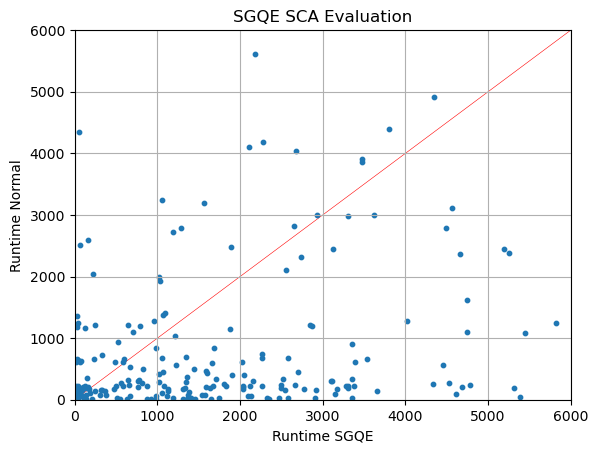

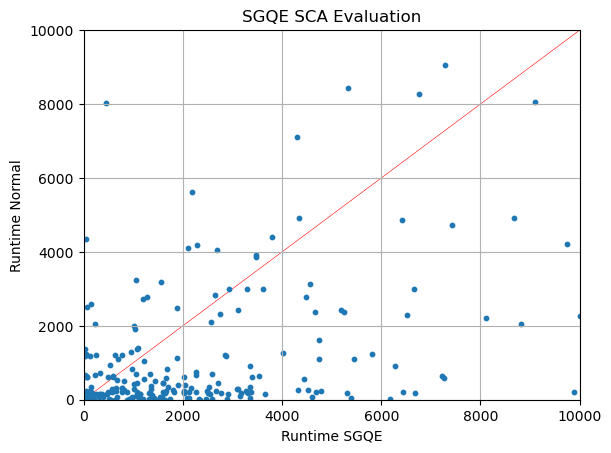

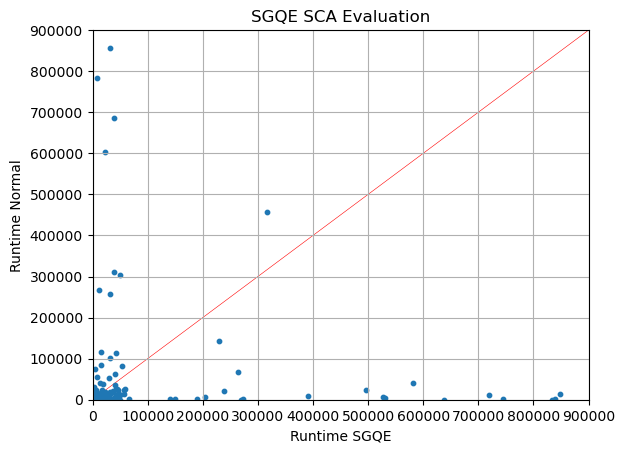

[-1.12610000e+03 -9.78090000e+02 -5.47690000e+02 -3.00955800e+04
 -1.31965100e+04 -2.34605000e+03 -1.40506000e+03 -6.22660000e+02
 -1.44566000e+03 -8.63950000e+02 -1.57300000e+01 -6.44000000e+01
 -1.30965500e+04 -3.32500000e+01 -1.13957600e+04 -1.64417000e+03
  1.21700000e+02 -1.68000000e+03 -6.16130000e+03  8.90000000e+02
  3.40000000e+00  3.58000000e+01 -2.08000000e+01 -1.29850000e+03
 -9.14220000e+02  8.75000000e+01 -9.19800000e+02 -2.12124000e+04
 -1.99240000e+02  1.51000000e+03 -1.36950000e+05  1.31400000e+02
 -5.42000000e+02  1.90000000e+03 -3.31470000e+03  1.14820000e+03
 -5.53000000e+03  2.01600000e+02  3.20000000e+02 -1.48590000e+03
  1.99000000e+03  3.22300000e+02 -5.34960000e+03 -3.31400000e+02
  1.14000000e+01 -9.39700000e+02 -2.17600000e+02 -2.18370000e+04
  1.10200000e+02 -6.10000000e+02 -3.00130000e+03 -3.67000000e+03
 -1.06180000e+03  1.99700000e+02 -1.16930000e+03  5.55400000e+02
 -1.37580000e+03 -2.17870000e+03 -1.35349000e+03 -8.47100000e+02
  4.16800000e+02  6.01500

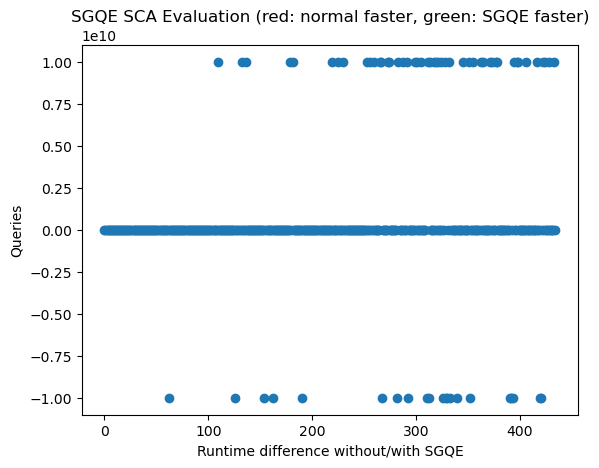

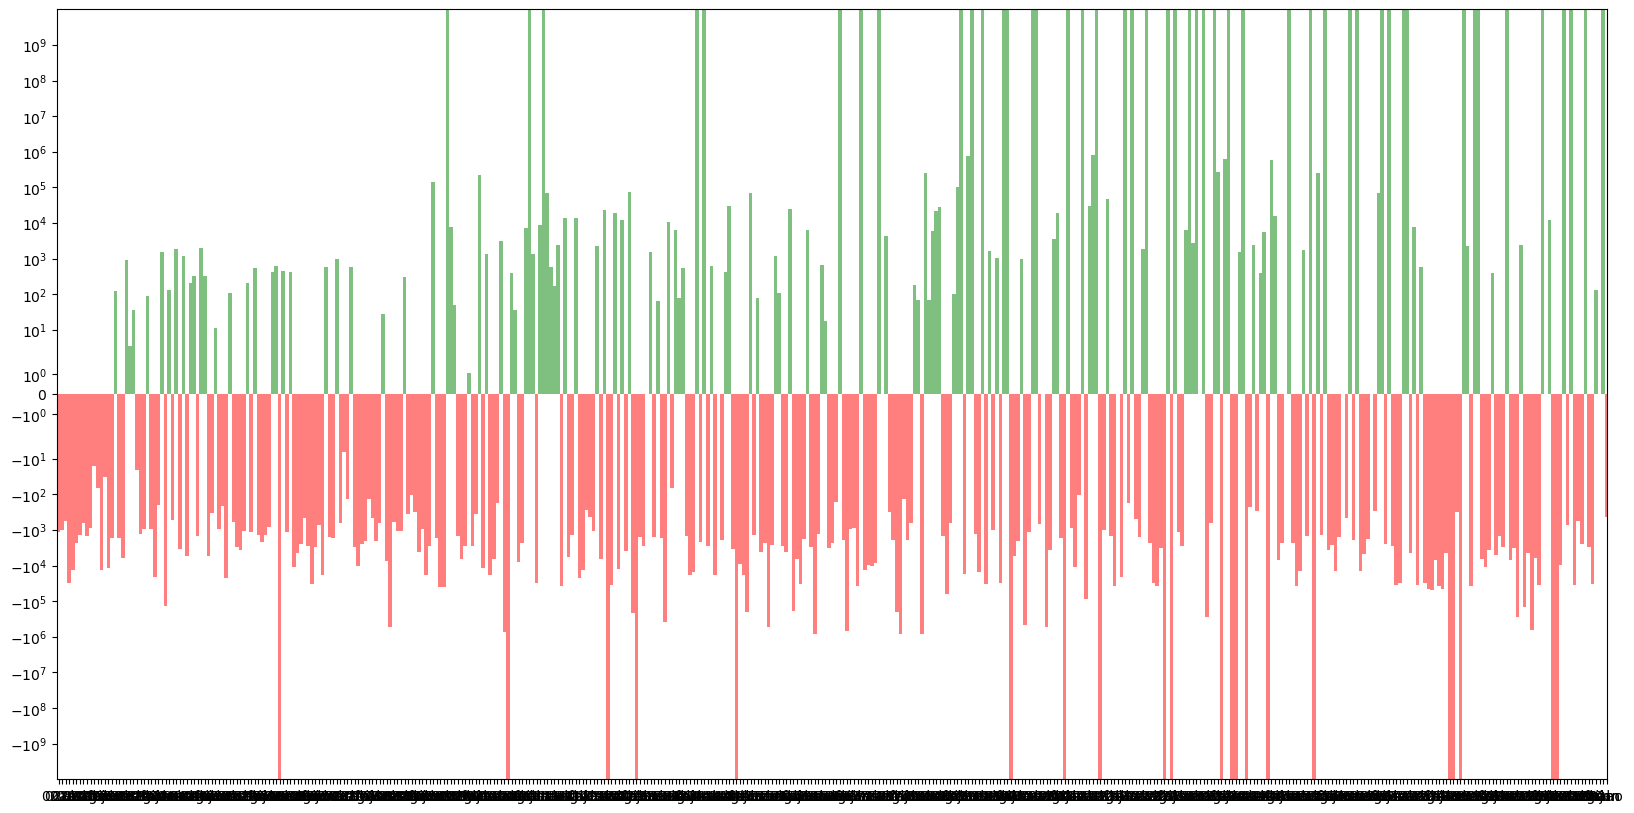

In [53]:
l_a = openFileByWildcard(os.path.join("./aggout/complete/", "times_results*")).readlines()
l_b = openFileByWildcard(os.path.join("./mergeout/basic/1/", "times_results*")).readlines()

l_a = fillMissingValues(l_a)
l_b = fillMissingValues(l_b)

val_a = [parseTimeToMS(r.split(";")[1]) for r in l_a]
val_b = [parseTimeToMS(r.split(";")[1]) for r in l_b]

scatterplot2(val_a, val_b, "Runtime SGQE", "Runtime Normal", "SGQE SCA Evaluation", "./SGQESCAEvalScatterPlot.png")
scatterplotWithLim(val_a, val_b, "Runtime SGQE", "Runtime Normal", "SGQE SCA Evaluation", "./SGQESCAEval10kScatterPlot.png", 10000, 10000)
scatterplotWithLim(val_a, val_b, "Runtime SGQE", "Runtime Normal", "SGQE SCA Evaluation", "./SGQESCAEval900kScatterPlot.png", 900000, 900000)

diffPlot2(val_a, val_b, "Runtime difference without/with SGQE", "Queries", "SGQE SCA Evaluation (red: normal faster, green: SGQE faster)", "./SGQESCAEvalRTDiffPlot.png", queries)




In [54]:
a = np.array(val_a)
b = np.array(val_b)

# remove not solved
a[a==9999999999.0]=0
b[b==9999999999.0]=0

# both solved --> does not fully describe the situation
ind = []
for j in range(len(a)):
    if a[j] == 0 or b[j] == 0:
        ind.append(j)
    j = j + 1

a = np.delete(a, ind)
b = np.delete(b, ind)


diffs = np.subtract(a, b)
min = np.min(diffs)
max = np.max(diffs)

avg = np.average(diffs)

print("Values in ms (when both versions solved the instance)")
print(f"minimal difference (with sign --> best for SGQE): {min}, maximal difference (with sign --> best for normal): {max}")
print(f"average difference (negative --> SGQE better, positive --> normal better): {avg}")
print(f"median difference (negative --> SGQE better, positive --> normal better): {np.median(diffs)}")

Values in ms (when both versions solved the instance)
minimal difference (with sign --> best for SGQE): -823500.0, maximal difference (with sign --> best for normal): 836640.0
average difference (negative --> SGQE better, positive --> normal better): 16264.198487394959
median difference (negative --> SGQE better, positive --> normal better): 1372.4


In [55]:
a_better_count, b_better_count = countRT(val_a, val_b) # excluding unsolved instances

# a_better: SGQE better
# b_better: Normal better
print(a_better_count, b_better_count )

# --> Normal better


106 250


In [56]:
a_better_count, b_better_count = count(maxmemlist1, maxmemlist2)

# a_better: SGQE better
# b_better: Normal better
print(a_better_count, b_better_count )

# --> Normal better

13 344


In [57]:
a_better_count, b_better_count = count(maxdisklist1, maxdisklist2)

# a_better: SGQE better
# b_better: Normal better
print(a_better_count, b_better_count )

# --> tie

0 0


In [58]:
diffs = [float(0) if e[0] == float(0) or e[1] == float(0) else e[2] for e in l]
#diffs = np.subtract(np.array(maxmemlist1), np.array(maxmemlist2))
min = np.min(diffs)
max = np.max(diffs)

avg = np.average(diffs)

print("Values in MB")
print(f"minimal difference (with sign --> best for SGQE): {min}, maximal difference (with sign --> best for normal): {max}")
print(f"average difference (negative --> SGQE better, positive --> normal better): {avg}")
print(f"median difference (negative --> SGQE better, positive --> normal better): {np.median(diffs)}")



Values in MB
minimal difference (with sign --> best for SGQE): -31698.433103, maximal difference (with sign --> best for normal): 26488.783203
average difference (negative --> SGQE better, positive --> normal better): 2299.765513597701
median difference (negative --> SGQE better, positive --> normal better): 521.725514


In [59]:
def countOccurrence(vals, val):
    c = 0
    for v in vals:
        if v == val:
            c = c + 1
    return c

In [60]:
# count unsolved
val_a_unsolved = countOccurrence(val_a, 9999999999.0)
val_b_unsolved = countOccurrence(val_b, 9999999999.0)

print(f"SGQE unsolved: {val_a_unsolved}, Normal unsolved: {val_b_unsolved}")
if val_a_unsolved < val_b_unsolved:
    print("SGQE better")
elif val_b_unsolved < val_a_unsolved:
    print("Normal better")

SGQE unsolved: 31, Normal unsolved: 57
SGQE better


[-6.36862460e+07 -9.78943510e+07 -8.74622140e+07 -8.98091990e+09
 -5.94590761e+09 -5.79601976e+08 -6.56856240e+07 -2.50437030e+07
 -7.47865720e+07 -3.47823996e+08 -1.97239170e+07 -1.89138240e+07
 -5.94757229e+09 -2.60155700e+07 -7.87210807e+09 -1.81516996e+08
 -2.45819990e+07 -6.14739412e+08 -1.89220483e+08 -8.18786060e+07
 -3.21465550e+07 -1.87825290e+07 -4.22916700e+06 -1.40658726e+08
 -1.98253004e+08 -1.24541680e+07 -7.64936220e+07 -1.66224814e+09
 -1.37765730e+07 -5.04850540e+07 -1.25754306e+10 -1.98028470e+07
 -6.27908300e+07 -4.78308533e+08 -6.43003751e+08  4.60833400e+06
 -2.77110410e+09 -1.00090360e+07 -5.00521880e+07 -9.74940280e+07
 -3.19382186e+08 -2.49257026e+08 -1.57508885e+09 -6.36264010e+07
 -1.29502900e+07 -3.28306580e+08 -4.50128410e+07 -8.75968660e+09
 -3.79141270e+07 -2.87410766e+08 -1.18214702e+09 -2.34560233e+09
 -4.97700335e+08 -1.50569000e+05 -7.50992550e+07 -4.33359040e+07
 -1.49990189e+08 -1.18597215e+09 -1.94086195e+08 -4.07655990e+07
 -3.26217907e+08  1.27316

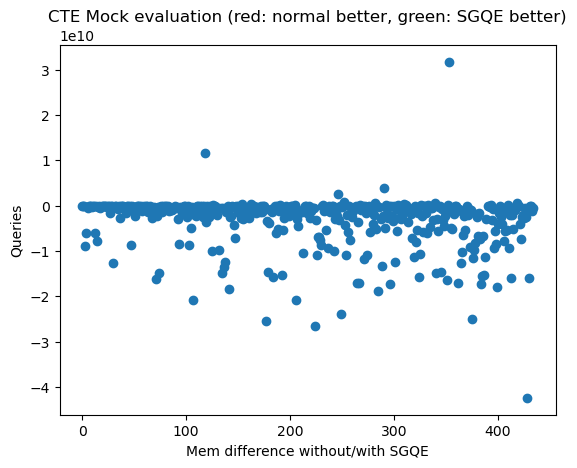

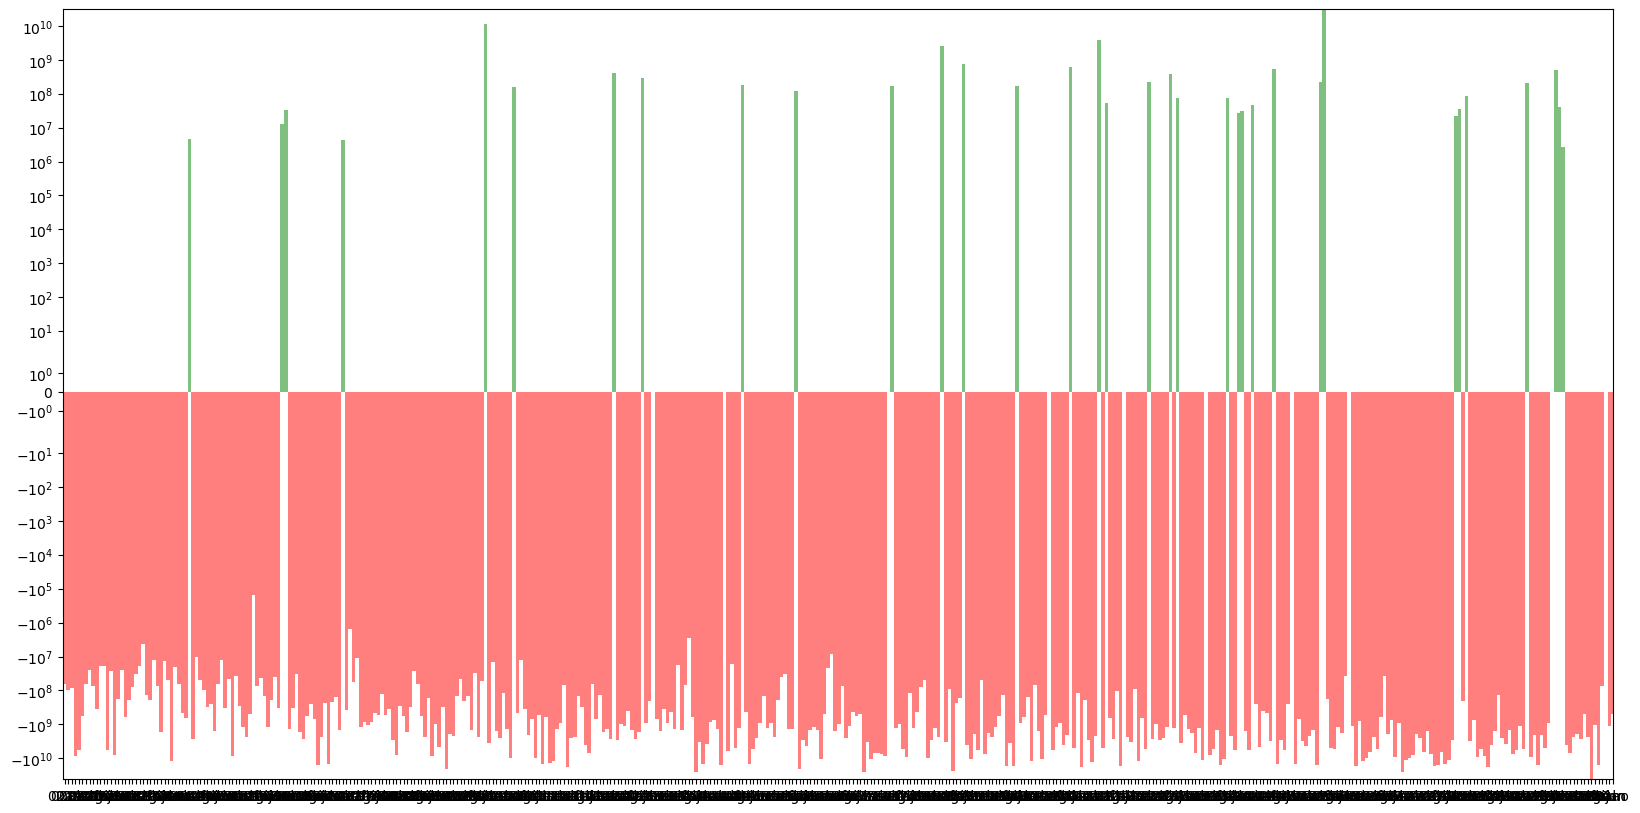

In [61]:
diffPlot2(maxmemlist1, maxmemlist2, "Mem difference without/with SGQE", "Queries", "CTE Mock evaluation (red: normal better, green: SGQE better)", "./SGQEEvalMemRGPlot.png", queries)


In [62]:
def diffPlot(normal, yan, xlabel, ylabel, title, pathToSave, xticks):
  diffs = np.subtract(np.array(yan), np.array(normal))
  x = [x for x in range(0,len(normal))]
  plt.scatter(x, diffs)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  #plt.grid()
  fig, ax = plt.subplots()
  fig.set_size_inches(180.5, 10.5)
  print(np.min(diffs))
  plt.yscale('symlog')
  plt.ylim(np.min(diffs)-5,np.max(diffs)+5)
  plt.xlim(-0.5,len(normal)+0.5)

  plt.xticks(x, labels=xticks)

  for i in range(0,len(normal)):
    if diffs[i]>0:
      #plt.fill_between(i, diffs[i], facecolor='green', alpha=.5)
      plt.fill([i-0.5,i+0.5,i+0.5,i-0.5],[diffs[i],diffs[i],0,0], 'g', alpha=.5)
    elif diffs[i]<0:
      #plt.fill_between(i, diffs[i], facecolor='red', alpha=.5)
      plt.fill([i-0.5,i+0.5,i+0.5,i-0.5],[diffs[i],diffs[i],0,0], 'r', alpha=.5)

  plt.savefig(pathToSave)
  plt.show()





In [63]:
def diffPlotPercent(diffs, xlabel, ylabel, title, pathToSave, xticks):
  x = [x for x in range(0,len(diffs))]
  plt.scatter(x, diffs)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.grid()
  print(np.min(diffs))
  plt.yscale('symlog')
  plt.ylim(np.min(diffs)-5,np.max(diffs)+5)
  plt.xlim(-0.5,len(diffs)+0.5)

  plt.xticks(x, labels=xticks)

  for i in range(0,len(diffs)):
    if diffs[i]>0:
      #plt.fill_between(i, diffs[i], facecolor='green', alpha=.5)
      plt.fill([i-0.5,i+0.5,i+0.5,i-0.5],[diffs[i],diffs[i],0,0], 'g', alpha=.5)
    elif diffs[i]<0:
      #plt.fill_between(i, diffs[i], facecolor='red', alpha=.5)
      plt.fill([i-0.5,i+0.5,i+0.5,i-0.5],[diffs[i],diffs[i],0,0], 'r', alpha=.5)

  plt.savefig(pathToSave)
  plt.show()

In [64]:
def diffPlotPercent2(diffs, xlabel, ylabel, title, pathToSave, xticks):
  x = [x for x in range(0,len(diffs))]
  plt.scatter(x, diffs)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  #plt.grid()
  fig, ax = plt.subplots()
  fig.set_size_inches(20, 10)
  print(np.min(diffs))
  plt.yscale('symlog')
  plt.ylim(np.min(diffs)-5,np.max(diffs)+5)
  plt.xlim(-0.5,len(normal)+0.5-100)
  plt.xticks(x, labels=xticks)

  for i in range(0,len(diffs)):
    if diffs[i]>0:
      #plt.fill_between(i, diffs[i], facecolor='green', alpha=.5)
      plt.fill([i-0.5,i+0.5,i+0.5,i-0.5],[diffs[i],diffs[i],0,0], 'g', alpha=.5)
    elif diffs[i]<0:
      #plt.fill_between(i, diffs[i], facecolor='red', alpha=.5)
      plt.fill([i-0.5,i+0.5,i+0.5,i-0.5],[diffs[i],diffs[i],0,0], 'r', alpha=.5)

  plt.savefig(pathToSave)
  plt.show()

In [65]:
def groupedBarChart(groupnames, valuedict, ylabel, title, widthfactor, pathToSave): # widthfactor is for moving the x labels
  x = np.arange(len(groupnames))  # the label locations
  width = 1/(len(valuedict)+1)#0.25  # the width of the bars
  multiplier = 0

  fig, ax = plt.subplots(layout='constrained')

  for attribute, measurement in valuedict.items():
      offset = width * multiplier
      rects = ax.bar(x + offset, measurement, width, label=attribute)
      ax.bar_label(rects, padding=len(valuedict))
      multiplier += 1

  # Add some text for labels, title and custom x-axis tick labels, etc.
  ax.set_ylabel(ylabel)
  ax.set_title(title)
  ax.set_xticks(x + width*widthfactor, groupnames)
  ax.legend(loc='upper left', ncols=len(valuedict))
  ax.set_ylim(0, 250)

  plt.savefig(pathToSave)
  plt.show()

CyclicQueries

In [66]:
cyc = ['09ac', '11ag', '11al', '12am', '13aa', '13an', '14ai', '14am', '15an', '16al', '16am', '16ao', '17ab', '17ag', '18aj', '18an', '19ad', '19ak', '20ag', '21aa', '21ab', '21ad', '21ah', '21am', '22ak', '22am', '23ae', '23af', '23ag', '23aj', '23al', '23an', '23ao', '24ac', '24ad', '24ae', '24ah', '24ak', '24an', '25aa', '25ai', '25ao', '26ae', '26ag', '26aj', '26ak', '26an', '26ao', '27aa', '27ab', '27ac', '27ad', '27ag', '27ai', '27aj', '27ak', '27an', '27ao', '28aa', '28ab', '28ac', '28ad', '28af', '28ag', '28ah', '28an', '28ao', '29ab', '29ac', '29af', '29ag', '29ai', '29al', '29am', '29an', '29ao', '30aa', '30ab', '30ad', '30af', '30ah', '30ai', '30an', '30ao']

In [67]:
cyc

['09ac',
 '11ag',
 '11al',
 '12am',
 '13aa',
 '13an',
 '14ai',
 '14am',
 '15an',
 '16al',
 '16am',
 '16ao',
 '17ab',
 '17ag',
 '18aj',
 '18an',
 '19ad',
 '19ak',
 '20ag',
 '21aa',
 '21ab',
 '21ad',
 '21ah',
 '21am',
 '22ak',
 '22am',
 '23ae',
 '23af',
 '23ag',
 '23aj',
 '23al',
 '23an',
 '23ao',
 '24ac',
 '24ad',
 '24ae',
 '24ah',
 '24ak',
 '24an',
 '25aa',
 '25ai',
 '25ao',
 '26ae',
 '26ag',
 '26aj',
 '26ak',
 '26an',
 '26ao',
 '27aa',
 '27ab',
 '27ac',
 '27ad',
 '27ag',
 '27ai',
 '27aj',
 '27ak',
 '27an',
 '27ao',
 '28aa',
 '28ab',
 '28ac',
 '28ad',
 '28af',
 '28ag',
 '28ah',
 '28an',
 '28ao',
 '29ab',
 '29ac',
 '29af',
 '29ag',
 '29ai',
 '29al',
 '29am',
 '29an',
 '29ao',
 '30aa',
 '30ab',
 '30ad',
 '30af',
 '30ah',
 '30ai',
 '30an',
 '30ao']

In [68]:
_, val_a_cyc, maxmemlist1_cyc = getMatchingQueries(queries, val_a, maxmemlist1, cyc)
_, val_b_cyc, maxmemlist2_cyc = getMatchingQueries(queries, val_b, maxmemlist2, cyc)

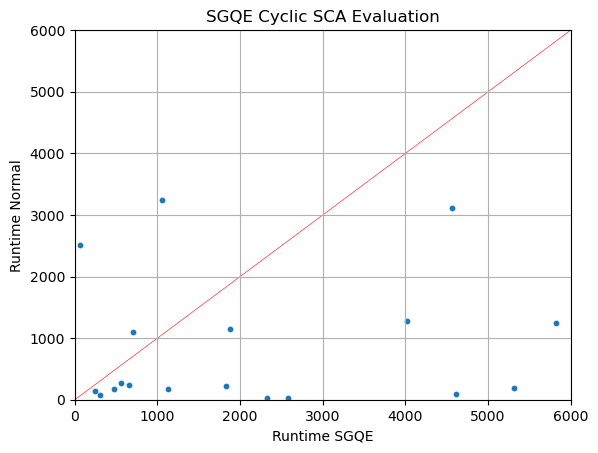

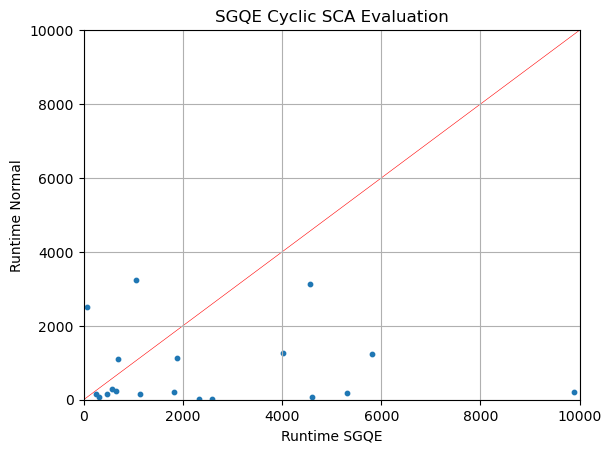

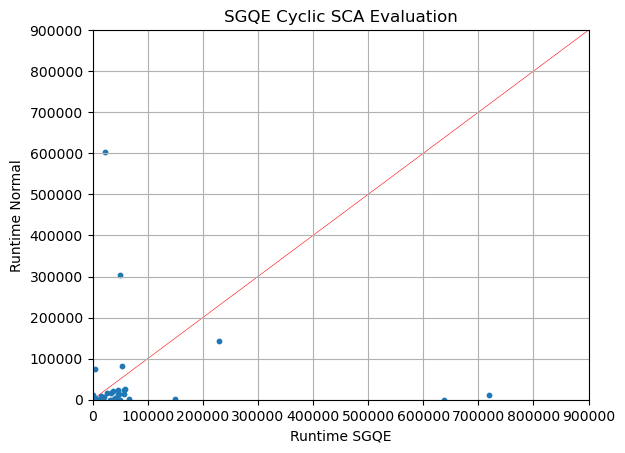

[-4.00226000e+04 -3.81100000e+04 -2.30000000e+04 -9.99998490e+09
  0.00000000e+00 -1.49400000e+04  2.93000000e+04 -1.84000000e+04
 -3.36000000e+04 -7.08200000e+05 -9.63700000e+02 -3.68500000e+04
 -1.33700000e+04  0.00000000e+00 -6.43400000e+04  9.99997910e+09
 -1.51000000e+04  9.99996900e+09  0.00000000e+00 -1.11000000e+04
 -1.02300000e+02 -8.85000000e+04 -9.99999980e+09  0.00000000e+00
 -9.99999704e+09 -9.99999988e+09  9.99996950e+09  0.00000000e+00
  9.99991230e+09  9.99995270e+09 -9.99999436e+09  9.99999270e+09
 -9.99999977e+09  9.99963840e+09 -9.99999924e+09 -2.26200000e+02
  3.97900000e+02  5.79900000e+05 -2.29660000e+03  9.99986700e+09
  2.54300000e+05 -1.61190000e+03  9.99994790e+09 -4.58000000e+03
 -2.86200000e+02  7.13800000e+04  9.99996150e+09 -2.75000000e+03
 -3.41000000e+04 -3.14194000e+04  9.99996590e+09  9.99986370e+09
 -3.47000000e+04 -3.12000000e+04 -4.51000000e+04 -4.91506000e+04
 -4.46500000e+04 -4.52360000e+03 -9.99999985e+09 -9.99999995e+09
 -3.07500000e+02 -9.99999

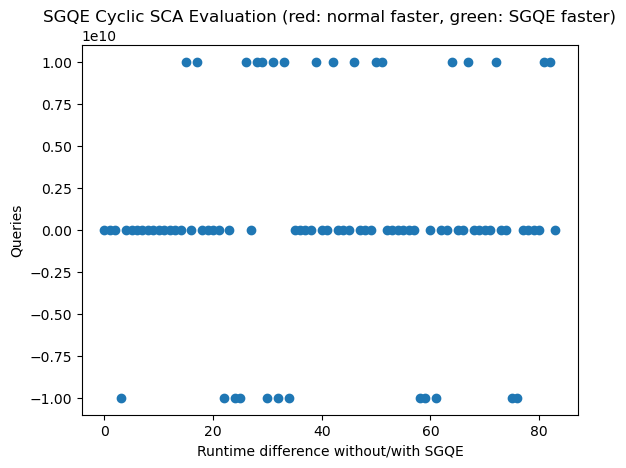

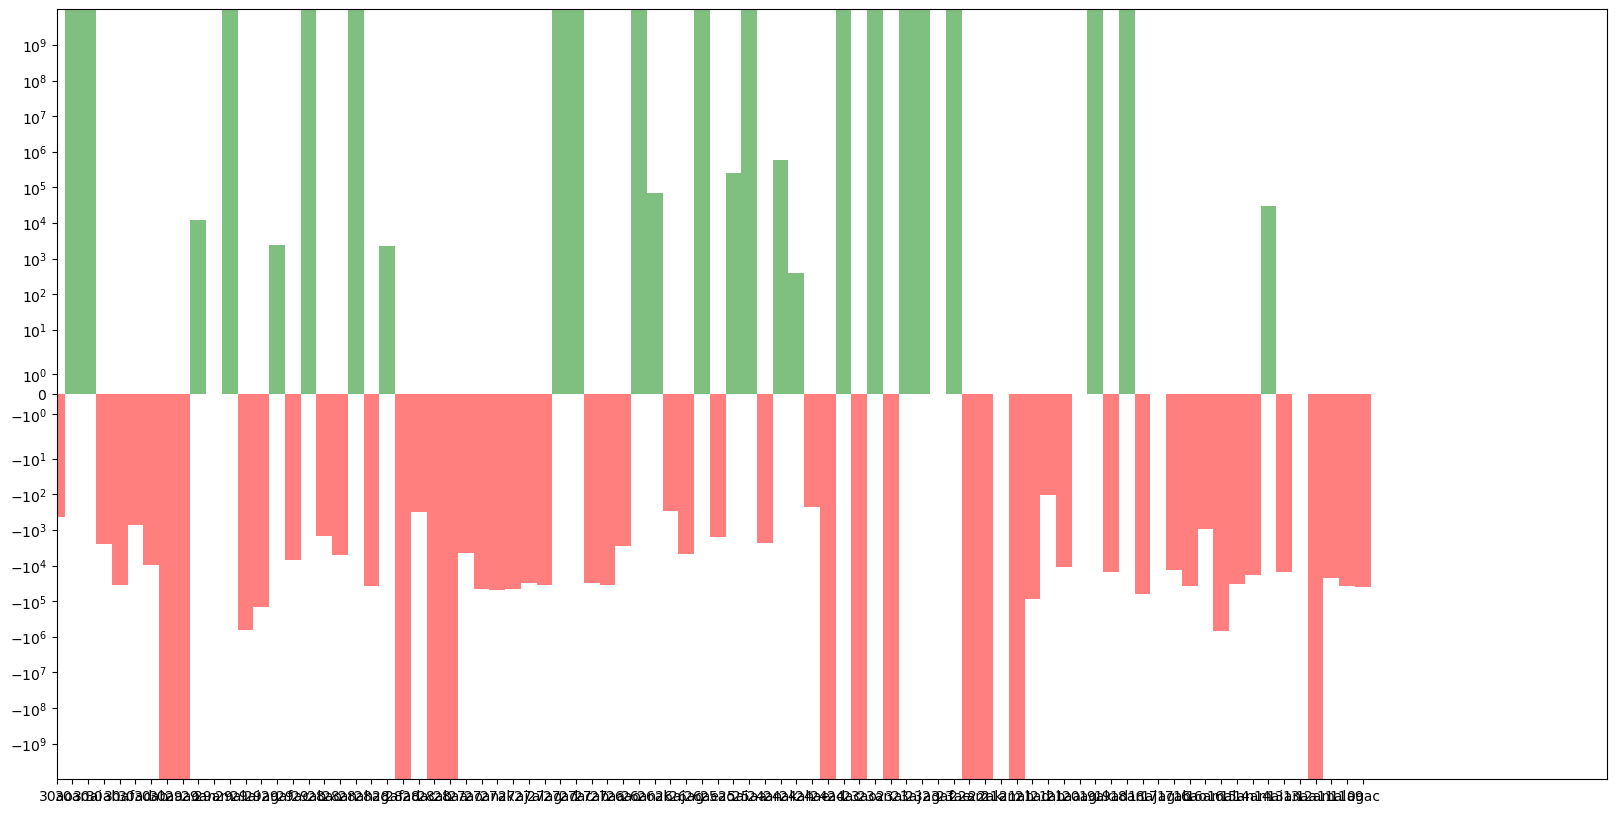

In [69]:
scatterplot2(val_a_cyc, val_b_cyc, "Runtime SGQE", "Runtime Normal", "SGQE Cyclic SCA Evaluation", "./SGQECyclicSCAEvalScatterPlot.png")

scatterplotWithLim(val_a_cyc, val_b_cyc, "Runtime SGQE", "Runtime Normal", "SGQE Cyclic SCA Evaluation", "./SGQECyclicSCA10kEvalScatterPlot.png", 10000, 10000)
scatterplotWithLim(val_a_cyc, val_b_cyc, "Runtime SGQE", "Runtime Normal", "SGQE Cyclic SCA Evaluation", "./SGQECyclicSCA900kEvalScatterPlot.png", 900000, 900000)

diffPlot2(val_a_cyc, val_b_cyc, "Runtime difference without/with SGQE", "Queries", "SGQE Cyclic SCA Evaluation (red: normal faster, green: SGQE faster)", "./SGQECyclicSCAEvalRTDiffPlot.png", cyc)


In [70]:
a = np.array(val_a_cyc)
b = np.array(val_b_cyc)

# remove not solved
a[a==9999999999.0]=0
b[b==9999999999.0]=0

# both solved --> does not fully describe the situation
ind = []
for j in range(len(a)):
    if a[j] == 0 or b[j] == 0:
        ind.append(j)
    j = j + 1

a = np.delete(a, ind)
b = np.delete(b, ind)


diffs = np.subtract(a, b)
min = np.min(diffs)
max = np.max(diffs)

avg = np.average(diffs)

print("Values in ms (when both versions solved the instance; cyclic queries)")
print(f"minimal difference (with sign --> best for SGQE): {min}, maximal difference (with sign --> best for normal): {max}")
print(f"average difference (negative --> SGQE better, positive --> normal better): {avg}")
print(f"median difference (negative --> SGQE better, positive --> normal better): {np.median(diffs)}")

Values in ms (when both versions solved the instance; cyclic queries)
minimal difference (with sign --> best for SGQE): -579900.0, maximal difference (with sign --> best for normal): 708200.0
average difference (negative --> SGQE better, positive --> normal better): 27070.365306122447
median difference (negative --> SGQE better, positive --> normal better): 9686.7


In [71]:
a_better_count, b_better_count = countRT(val_a_cyc, val_b_cyc) # excluding unsolved instances

# a_better: SGQE better
# b_better: Normal better
print(a_better_count, b_better_count )

# --> Normal better


8 41


In [72]:
a_better_count, b_better_count = count(maxmemlist1_cyc, maxmemlist2_cyc)

# a_better: SGQE better
# b_better: Normal better
print(a_better_count, b_better_count )

# --> Normal better

3 46


In [73]:

diffs = [float(0) if e[0] == float(0) or e[1] == float(0) else ((e[0]- e[1])/1000000) for e in zip(maxmemlist1_cyc, maxmemlist2_cyc)]
min = np.min(diffs)
max = np.max(diffs)

avg = np.average(diffs)

print("Values in MB")
print(f"minimal difference (with sign --> best for SGQE): {min}, maximal difference (with sign --> best for normal): {max}")
print(f"average difference (negative --> SGQE better, positive --> normal better): {avg}")
print(f"median difference (negative --> SGQE better, positive --> normal better): {np.median(diffs)}")



Values in MB
minimal difference (with sign --> best for SGQE): -31698.433103, maximal difference (with sign --> best for normal): 26488.783203
average difference (negative --> SGQE better, positive --> normal better): 3842.0393947380953
median difference (negative --> SGQE better, positive --> normal better): 227.610834


In [74]:
# count unsolved
val_a_cyc_unsolved = countOccurrence(val_a_cyc, 9999999999.0)
val_b_cyc_unsolved = countOccurrence(val_b_cyc, 9999999999.0)

print(f"SGQE unsolved: {val_a_cyc_unsolved}, Normal unsolved: {val_b_cyc_unsolved}")
if val_a_cyc_unsolved < val_b_cyc_unsolved:
    print("SGQE better")
elif val_b_cyc_unsolved < val_a_cyc_unsolved:
    print("Normal better")

SGQE unsolved: 18, Normal unsolved: 23
SGQE better


In [75]:
# unsolved by normal:
[cyc[i] for i in range(len(val_b_cyc)) if val_b_cyc[i] >= 9999999999 ]


['13aa',
 '17ag',
 '18an',
 '19ak',
 '20ag',
 '21am',
 '23ae',
 '23af',
 '23ag',
 '23aj',
 '23an',
 '24ac',
 '25aa',
 '26ae',
 '26an',
 '27ac',
 '27ad',
 '28ah',
 '29ab',
 '29al',
 '29am',
 '30ai',
 '30an']

In [76]:
# unsolved by SGQE:
[cyc[i] for i in range(len(val_a_cyc)) if val_a_cyc[i] >= 9999999999 ]

['12am',
 '13aa',
 '17ag',
 '20ag',
 '21ah',
 '21am',
 '22ak',
 '22am',
 '23af',
 '23al',
 '23ao',
 '24ad',
 '28aa',
 '28ab',
 '28ad',
 '29am',
 '29ao',
 '30aa']

AcyclicQueries

In [77]:
acyc = [q for q in queries if q not in cyc]

In [78]:
acyc

['02aa',
 '02ab',
 '02ac',
 '02ad',
 '02ae',
 '02af',
 '02ag',
 '02ah',
 '02ai',
 '02aj',
 '02ak',
 '02al',
 '02am',
 '02an',
 '02ao',
 '03aa',
 '03ab',
 '03ac',
 '03ad',
 '03ae',
 '03af',
 '03ag',
 '03ah',
 '03ai',
 '03aj',
 '03ak',
 '03al',
 '03am',
 '03an',
 '03ao',
 '04aa',
 '04ab',
 '04ac',
 '04ad',
 '04ae',
 '04af',
 '04ag',
 '04ah',
 '04ai',
 '04aj',
 '04ak',
 '04al',
 '04am',
 '04an',
 '04ao',
 '05aa',
 '05ab',
 '05ac',
 '05ad',
 '05ae',
 '05af',
 '05ag',
 '05ah',
 '05ai',
 '05aj',
 '05ak',
 '05al',
 '05am',
 '05an',
 '05ao',
 '06aa',
 '06ab',
 '06ac',
 '06ad',
 '06ae',
 '06af',
 '06ag',
 '06ah',
 '06ai',
 '06aj',
 '06ak',
 '06al',
 '06am',
 '06an',
 '06ao',
 '07aa',
 '07ab',
 '07ac',
 '07ad',
 '07ae',
 '07af',
 '07ag',
 '07ah',
 '07ai',
 '07aj',
 '07ak',
 '07al',
 '07am',
 '07an',
 '07ao',
 '08aa',
 '08ab',
 '08ac',
 '08ad',
 '08ae',
 '08af',
 '08ag',
 '08ah',
 '08ai',
 '08aj',
 '08ak',
 '08al',
 '08am',
 '08an',
 '08ao',
 '09aa',
 '09ab',
 '09ad',
 '09ae',
 '09af',
 '09ag',
 

In [79]:
_, val_a_acyc, maxmemlist1_acyc = getMatchingQueries(queries, val_a, maxmemlist1, acyc)
_, val_b_acyc, maxmemlist2_acyc = getMatchingQueries(queries, val_b, maxmemlist2, acyc)

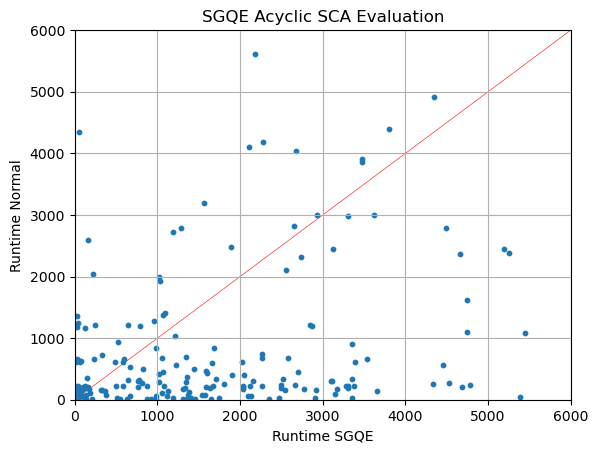

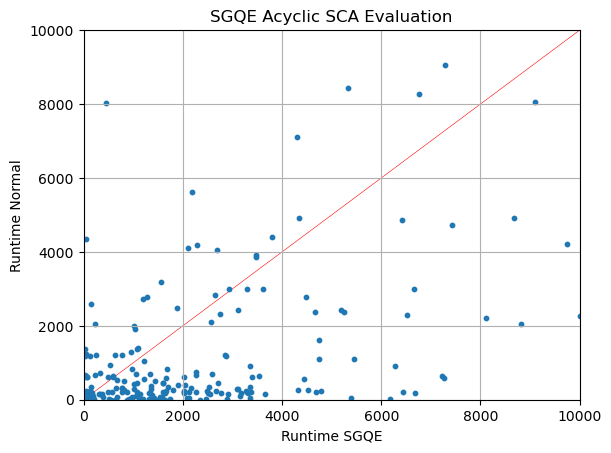

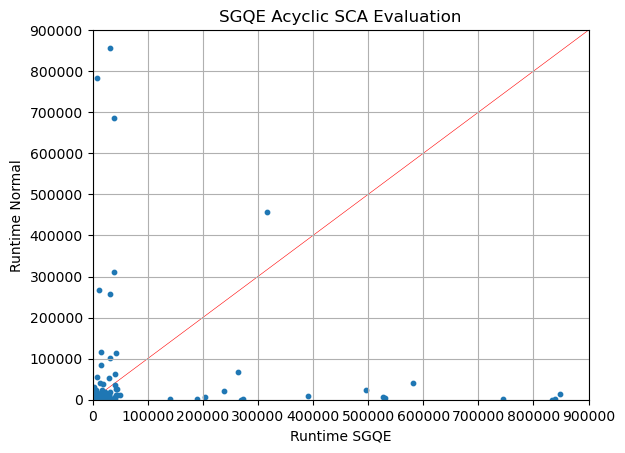

[-1.12610000e+03 -9.78090000e+02 -5.47690000e+02 -3.00955800e+04
 -1.31965100e+04 -2.34605000e+03 -1.40506000e+03 -6.22660000e+02
 -1.44566000e+03 -8.63950000e+02 -1.57300000e+01 -6.44000000e+01
 -1.30965500e+04 -3.32500000e+01 -1.13957600e+04 -1.64417000e+03
  1.21700000e+02 -1.68000000e+03 -6.16130000e+03  8.90000000e+02
  3.40000000e+00  3.58000000e+01 -2.08000000e+01 -1.29850000e+03
 -9.14220000e+02  8.75000000e+01 -9.19800000e+02 -2.12124000e+04
 -1.99240000e+02  1.51000000e+03 -1.36950000e+05  1.31400000e+02
 -5.42000000e+02  1.90000000e+03 -3.31470000e+03  1.14820000e+03
 -5.53000000e+03  2.01600000e+02  3.20000000e+02 -1.48590000e+03
  1.99000000e+03  3.22300000e+02 -5.34960000e+03 -3.31400000e+02
  1.14000000e+01 -9.39700000e+02 -2.17600000e+02 -2.18370000e+04
  1.10200000e+02 -6.10000000e+02 -3.00130000e+03 -3.67000000e+03
 -1.06180000e+03  1.99700000e+02 -1.16930000e+03  5.55400000e+02
 -1.37580000e+03 -2.17870000e+03 -1.35349000e+03 -8.47100000e+02
  4.16800000e+02  6.01500

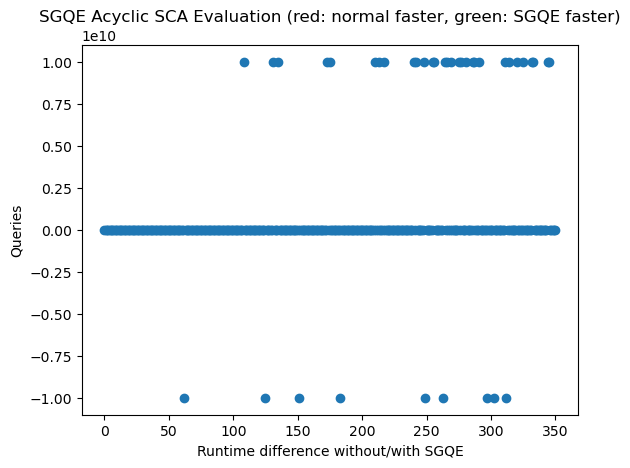

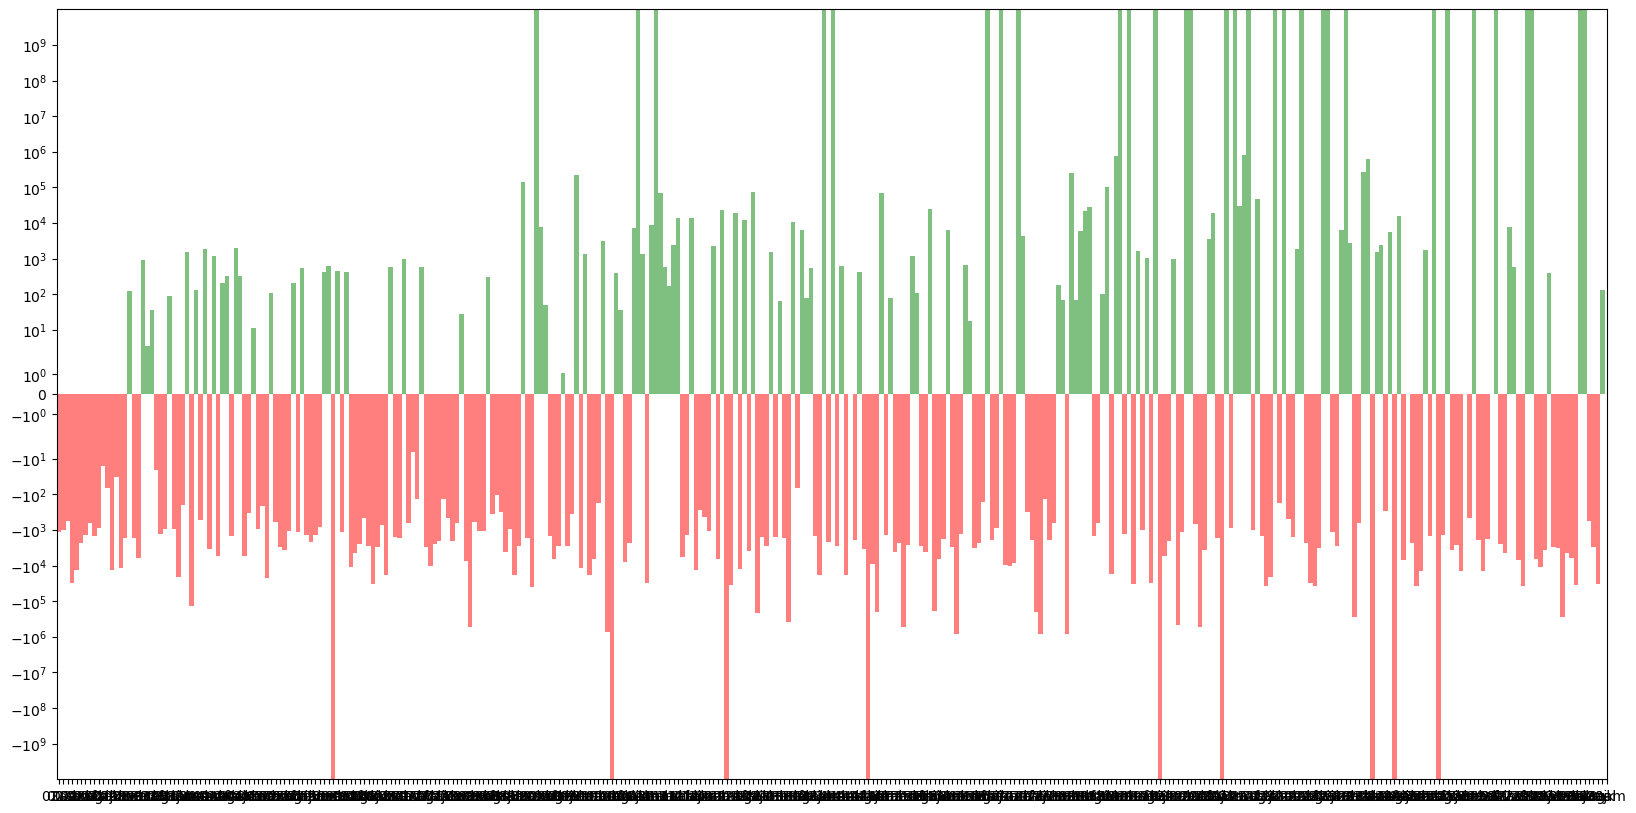

In [80]:
scatterplot2(val_a_acyc, val_b_acyc, "Runtime SGQE", "Runtime Normal", "SGQE Acyclic SCA Evaluation", "./SGQEAcyclicSCAEvalScatterPlot.png")
scatterplotWithLim(val_a_acyc, val_b_acyc, "Runtime SGQE", "Runtime Normal", "SGQE Acyclic SCA Evaluation", "./SGQEAcyclicSCA10kEvalScatterPlot.png", 10000, 10000)
scatterplotWithLim(val_a_acyc, val_b_acyc, "Runtime SGQE", "Runtime Normal", "SGQE Acyclic SCA Evaluation", "./SGQEAcyclicSCA900kEvalScatterPlot.png", 900000, 900000)

diffPlot2(val_a_acyc, val_b_acyc, "Runtime difference without/with SGQE", "Queries", "SGQE Acyclic SCA Evaluation (red: normal faster, green: SGQE faster)", "./SGQEAcyclicSCAEvalRTDiffPlot.png", acyc)


In [81]:
a = np.array(val_a_acyc)
b = np.array(val_b_acyc)

# remove not solved
a[a==9999999999.0]=0
b[b==9999999999.0]=0

# both solved --> does not fully describe the situation
ind = []
for j in range(len(a)):
    if a[j] == 0 or b[j] == 0:
        ind.append(j)
    j = j + 1

a = np.delete(a, ind)
b = np.delete(b, ind)


diffs = np.subtract(a, b)
min = np.min(diffs)
max = np.max(diffs)

avg = np.average(diffs)

print("Values in ms (when both versions solved the instance; acyclic queries)")
print(f"minimal difference (with sign --> best for SGQE): {min}, maximal difference (with sign --> best for normal): {max}")
print(f"average difference (negative --> SGQE better, positive --> normal better): {avg}")
print(f"median difference (negative --> SGQE better, positive --> normal better): {np.median(diffs)}")

Values in ms (when both versions solved the instance; acyclic queries)
minimal difference (with sign --> best for SGQE): -823500.0, maximal difference (with sign --> best for normal): 836640.0
average difference (negative --> SGQE better, positive --> normal better): 14545.035584415587
median difference (negative --> SGQE better, positive --> normal better): 1094.6999999999998


In [82]:
a_better_count, b_better_count = countRT(val_a_acyc, val_b_acyc) # excluding unsolved instances

# a_better: SGQE better
# b_better: Normal better
print(a_better_count, b_better_count )

# --> Normal better


98 209


In [83]:
a_better_count, b_better_count = count(maxmemlist1_acyc, maxmemlist2_acyc)

# a_better: SGQE better
# b_better: Normal better
print(a_better_count, b_better_count )

# --> Normal better

10 298


In [84]:

diffs = [float(0) if e[0] == float(0) or e[1] == float(0) else ((e[0]- e[1])/1000000) for e in zip(maxmemlist1_acyc, maxmemlist2_acyc)]
min = np.min(diffs)
max = np.max(diffs)

avg = np.average(diffs)

print("Values in MB")
print(f"minimal difference (with sign --> best for SGQE): {min}, maximal difference (with sign --> best for normal): {max}")
print(f"average difference (negative --> SGQE better, positive --> normal better): {avg}")
print(f"median difference (negative --> SGQE better, positive --> normal better): {np.median(diffs)}")



Values in MB
minimal difference (with sign --> best for SGQE): -11608.702004, maximal difference (with sign --> best for normal): 25338.507755
average difference (negative --> SGQE better, positive --> normal better): 1930.6743283675214
median difference (negative --> SGQE better, positive --> normal better): 556.006624


In [85]:
# count unsolved
val_a_acyc_unsolved = countOccurrence(val_a_acyc, 9999999999.0)
val_b_acyc_unsolved = countOccurrence(val_b_acyc, 9999999999.0)

print(f"SGQE unsolved: {val_a_acyc_unsolved}, Normal unsolved: {val_b_acyc_unsolved}")
if val_a_acyc_unsolved < val_b_acyc_unsolved:
    print("SGQE better")
elif val_b_acyc_unsolved < val_a_acyc_unsolved:
    print("Normal better")

SGQE unsolved: 13, Normal unsolved: 34
SGQE better


In [86]:
# unsolved by normal:
[acyc[i] for i in range(len(val_b_acyc)) if val_b_acyc[i] >= 9999999999 ]


['09ae',
 '10am',
 '11ab',
 '13ao',
 '14ab',
 '14af',
 '16aj',
 '17aa',
 '17af',
 '19ab',
 '19ae',
 '19al',
 '20ad',
 '20ae',
 '20an',
 '21ac',
 '21ag',
 '21ao',
 '22ab',
 '22af',
 '22al',
 '22an',
 '23ac',
 '24ao',
 '25ag',
 '25ak',
 '26aa',
 '26ac',
 '26al',
 '28ae',
 '28ai',
 '30ac',
 '30ae',
 '30am']

In [87]:
# unsolved by SGQE:
[acyc[i] for i in range(len(val_a_acyc)) if val_a_acyc[i] >= 9999999999 ]

['06ac',
 '10ag',
 '12ae',
 '14af',
 '14ak',
 '19am',
 '20am',
 '24aa',
 '24aj',
 '24ao',
 '25ah',
 '26aa',
 '30am']

Split data into 10 groups

In [88]:
def split(a, n):
    k, m = divmod(len(a), n)
    return (a[i*k+np.min([i, m]):(i+1)*k+np.min([i+1, m])] for i in range(n))

Group 0
Queries: 02aa, 02ab, 02ac, 02ad, 02ae, 02af, 02ag, 02ah, 02ai, 02aj, 02ak, 02al, 02am, 02an, 02ao, 03aa, 03ab, 03ac, 03ad, 03ae, 03af, 03ag, 03ah, 03ai, 03aj, 03ak, 03al, 03am, 03an, 03ao, 04aa, 04ab, 04ac, 04ad, 04ae, 04af, 04ag, 04ah, 04ai, 04aj, 04ak, 04al, 04am, 04an


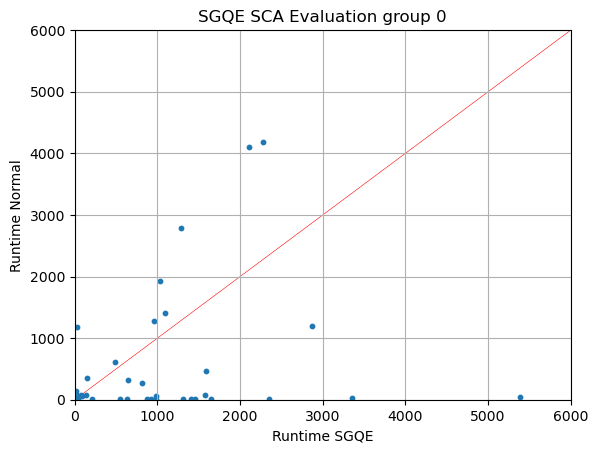

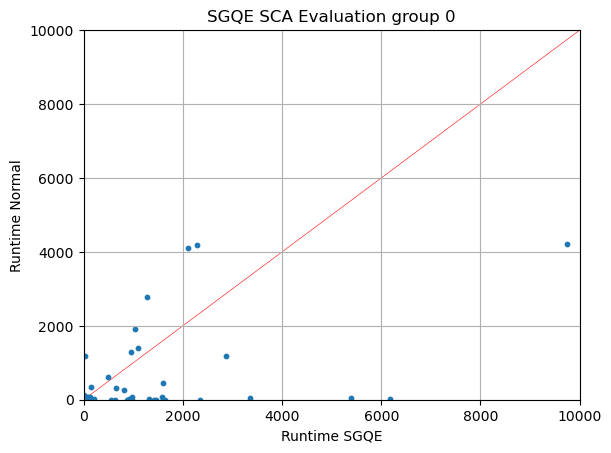

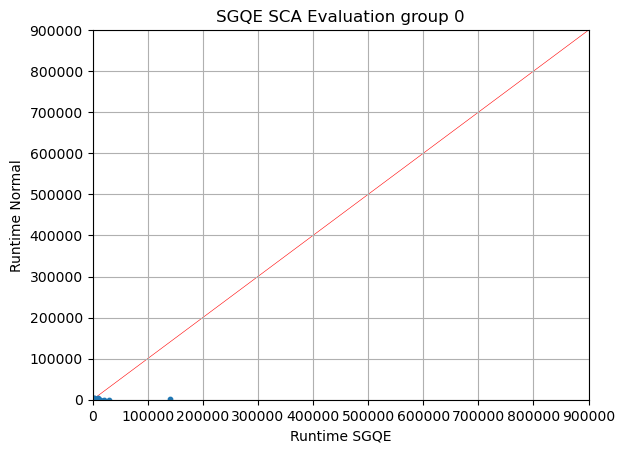

[-1.126100e+03 -9.780900e+02 -5.476900e+02 -3.009558e+04 -1.319651e+04
 -2.346050e+03 -1.405060e+03 -6.226600e+02 -1.445660e+03 -8.639500e+02
 -1.573000e+01 -6.440000e+01 -1.309655e+04 -3.325000e+01 -1.139576e+04
 -1.644170e+03  1.217000e+02 -1.680000e+03 -6.161300e+03  8.900000e+02
  3.400000e+00  3.580000e+01 -2.080000e+01 -1.298500e+03 -9.142200e+02
  8.750000e+01 -9.198000e+02 -2.121240e+04 -1.992400e+02  1.510000e+03
 -1.369500e+05  1.314000e+02 -5.420000e+02  1.900000e+03 -3.314700e+03
  1.148200e+03 -5.530000e+03  2.016000e+02  3.200000e+02 -1.485900e+03
  1.990000e+03  3.223000e+02 -5.349600e+03 -3.314000e+02]
-136950.0


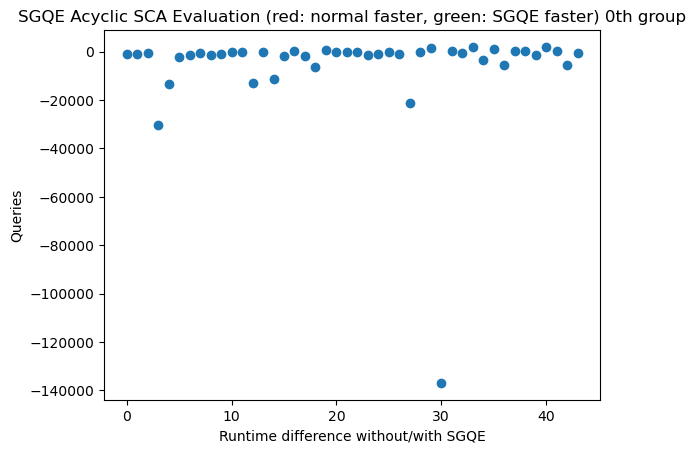

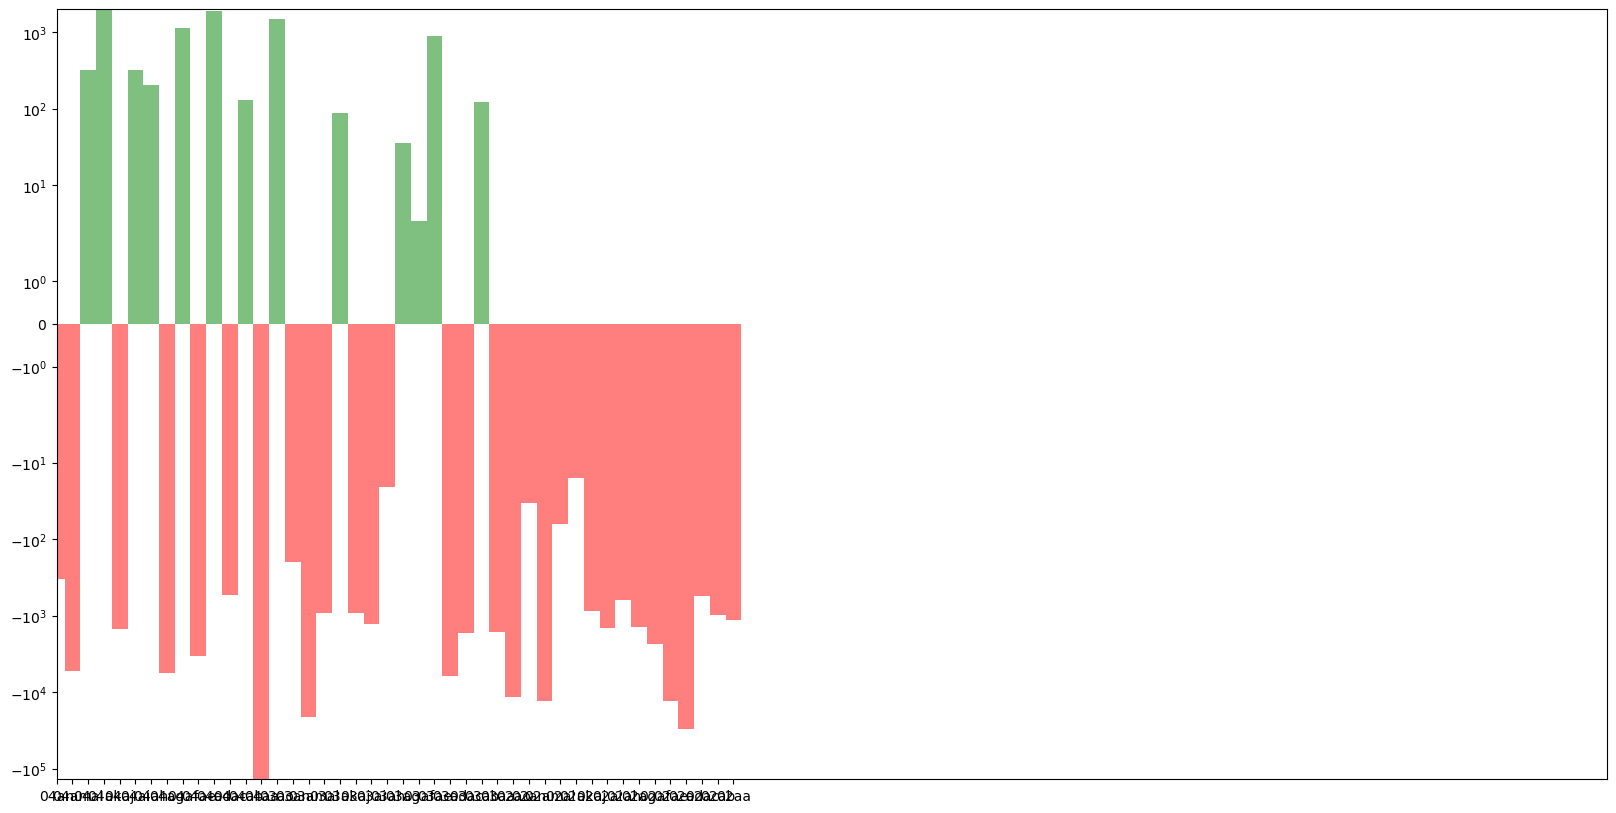

--------
Runtime differences
Values in ms (when both versions solved the instance)
minimal difference (with sign --> best for SGQE): -1990.0, maximal difference (with sign --> best for normal): 136950.0
average difference (negative --> SGQE better, positive --> normal better): 5821.02659090909
median difference (negative --> SGQE better, positive --> normal better): 743.3050000000001
--------
Runtime count: left: SGQE better, right: Normal better
13 31
--------
Memory count: left: SGQE better, right: Normal better
1 43
--------
Memory differences
Values in MB
minimal difference (with sign --> best for SGQE): -4.608334, maximal difference (with sign --> best for normal): 12575.430557
average difference (negative --> SGQE better, positive --> normal better): 1190.1216566136363
median difference (negative --> SGQE better, positive --> normal better): 84.67041
--------
SGQE unsolved: 0, Normal unsolved: 0
--------
Unsolved by normal
[]
--------
unsolved by SGQE
[]
--------
Group 0 end



G

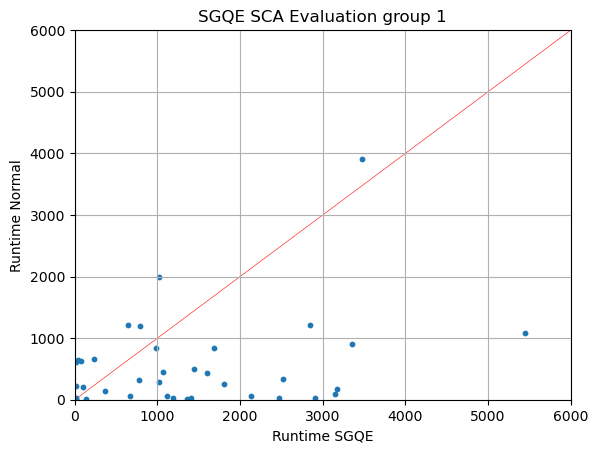

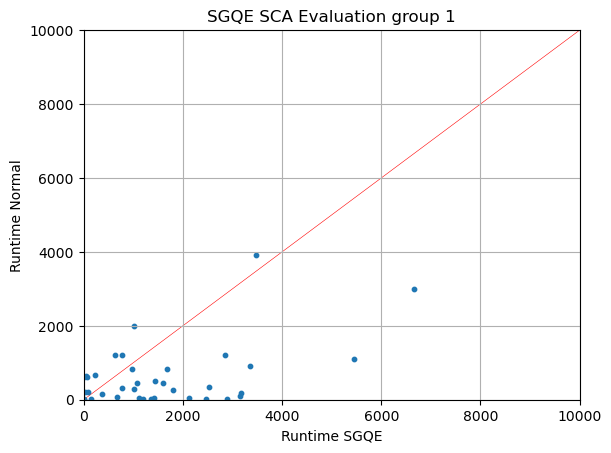

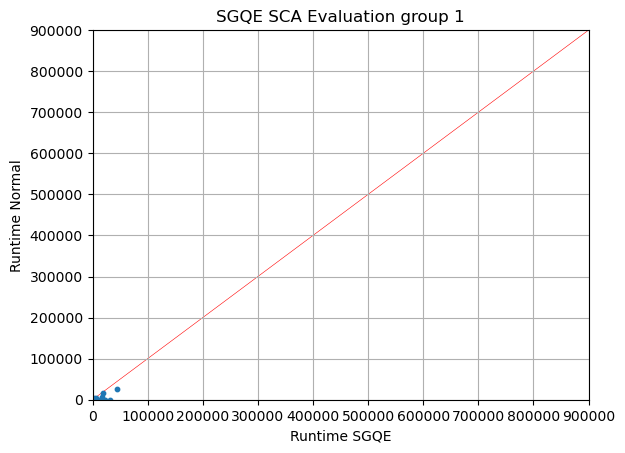

[ 1.14000000e+01 -9.39700000e+02 -2.17600000e+02 -2.18370000e+04
  1.10200000e+02 -6.10000000e+02 -3.00130000e+03 -3.67000000e+03
 -1.06180000e+03  1.99700000e+02 -1.16930000e+03  5.55400000e+02
 -1.37580000e+03 -2.17870000e+03 -1.35349000e+03 -8.47100000e+02
  4.16800000e+02  6.01500000e+02 -9.99999977e+09  4.40000000e+02
 -1.15810000e+03  4.22700000e+02 -1.07500000e+04 -4.36000000e+03
 -2.43840000e+03 -4.53000000e+02 -2.87390000e+03 -3.22350000e+04
 -3.00000000e+03 -7.34400000e+02 -1.80000000e+04  5.71700000e+02
 -1.55770000e+03 -1.63000000e+03  9.70000000e+02 -6.19600000e+02
 -6.65000000e+00 -1.31550000e+02  5.98400000e+02 -3.05250000e+03
 -1.02024000e+04 -2.43750000e+03 -2.07740000e+03 -1.38600000e+02]
-9999999766.7


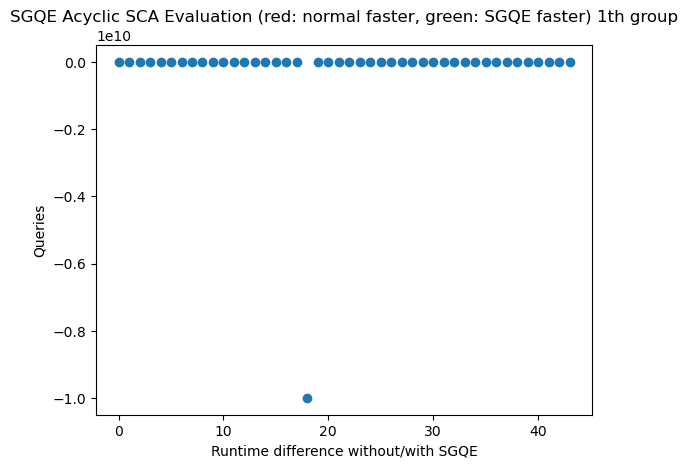

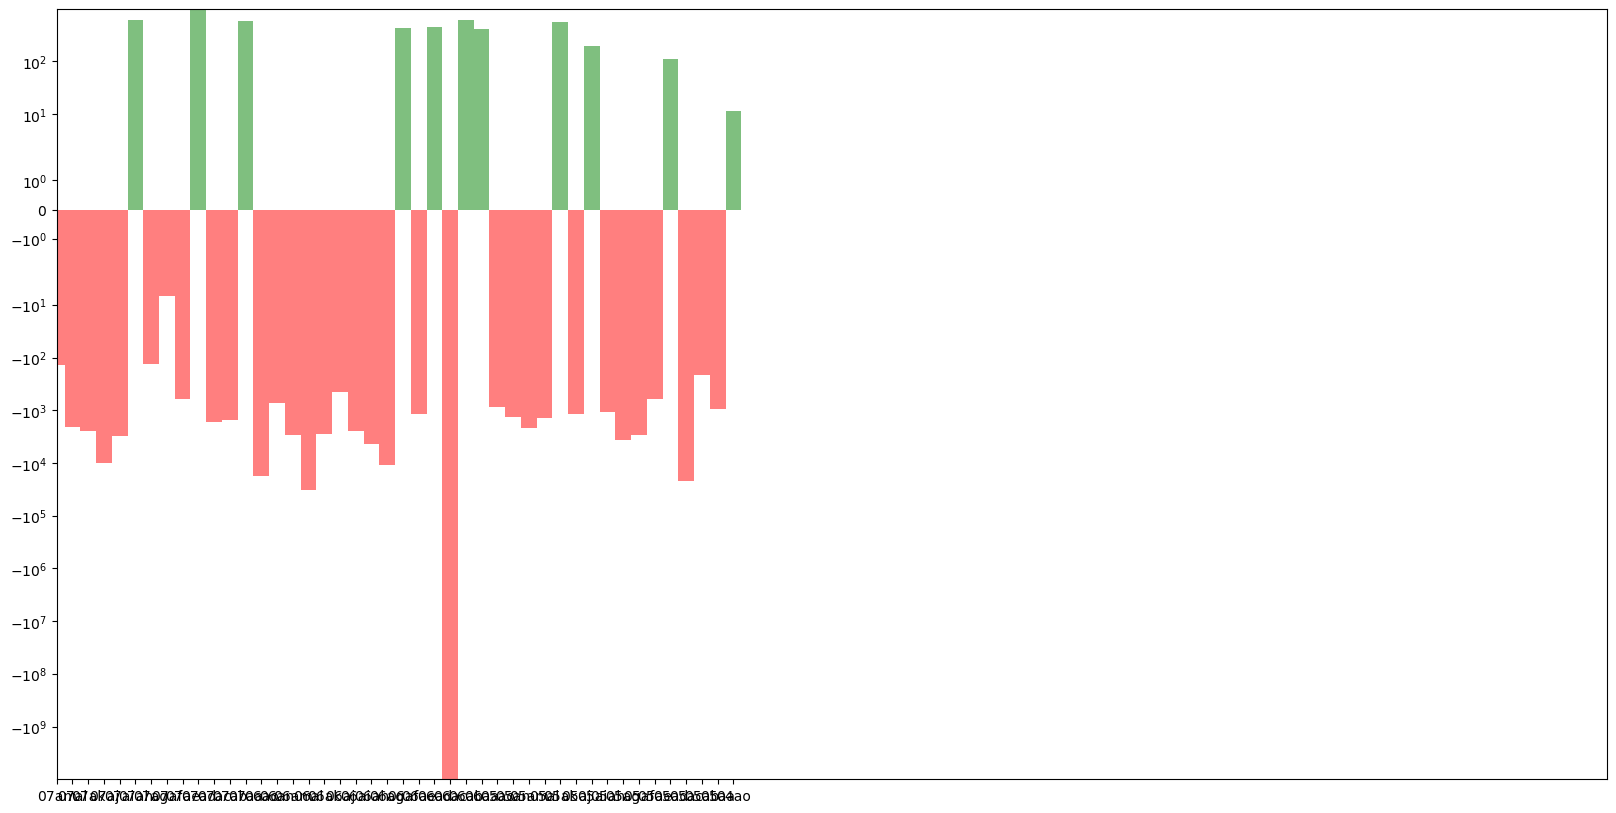

--------
Runtime differences
Values in ms (when both versions solved the instance)
minimal difference (with sign --> best for SGQE): -970.0, maximal difference (with sign --> best for normal): 32235.0
average difference (negative --> SGQE better, positive --> normal better): 3051.643953488372
median difference (negative --> SGQE better, positive --> normal better): 1061.8
--------
Runtime count: left: SGQE better, right: Normal better
11 32
--------
Memory count: left: SGQE better, right: Normal better
2 41
--------
Memory differences
Values in MB
minimal difference (with sign --> best for SGQE): -12.7316, maximal difference (with sign --> best for normal): 16204.012629
average difference (negative --> SGQE better, positive --> normal better): 1444.2412187272728
median difference (negative --> SGQE better, positive --> normal better): 324.4685455
--------
SGQE unsolved: 1, Normal unsolved: 0
--------
Unsolved by normal
[]
--------
unsolved by SGQE
['06ac']
--------
Group 1 end



Group

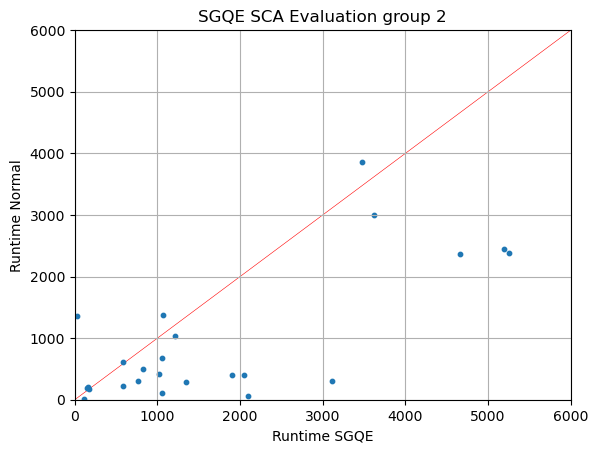

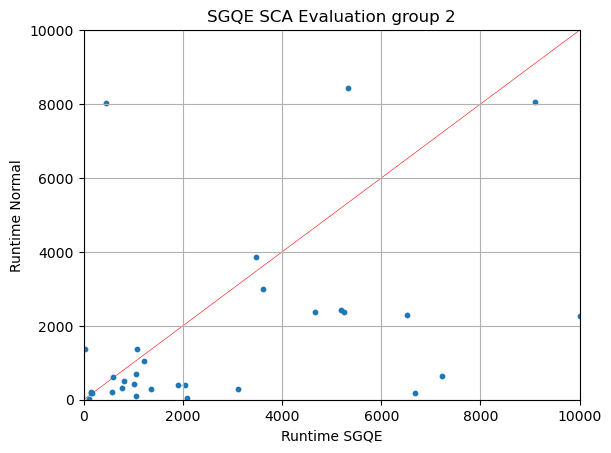

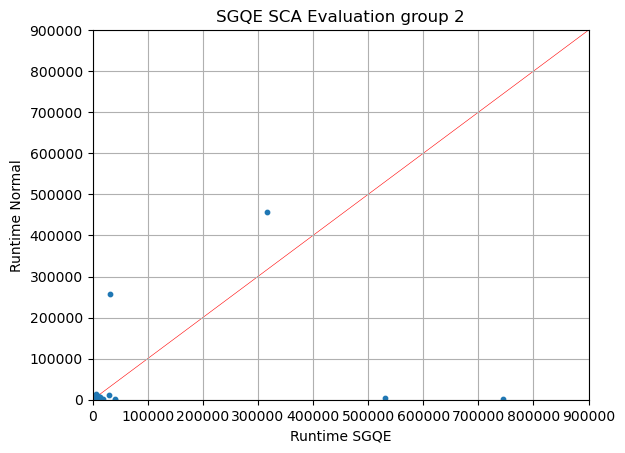

[-4.5690000e+02 -2.0356000e+03 -6.2000000e+02  2.7400000e+01
 -7.6500000e+03 -5.2711000e+05 -6.0180000e+02 -1.0569000e+03
 -1.0400000e+03  3.0000000e+02 -3.5880000e+02 -1.0220000e+02
 -3.2290000e+02 -4.2400000e+03 -9.4120000e+02 -1.8600000e+04
 -2.8700000e+03  1.3940000e+05 -1.6410000e+03 -4.0022600e+04
 -3.8840000e+04  9.9991616e+09  7.5995000e+03  4.8400000e+01
 -1.5012000e+03 -6.6007000e+03 -2.8119000e+03  1.1000000e+00
 -2.7500000e+03 -3.6510000e+02  2.2640000e+05 -1.2007900e+04
  1.3313000e+03 -1.8040000e+04 -6.5074000e+03 -1.7000000e+02
  3.1200000e+03 -7.4468360e+05 -9.9999840e+09  3.9000000e+02
  3.5600000e+01 -7.7300000e+03 -2.2900000e+03  7.4500000e+03]
-9999983999.0


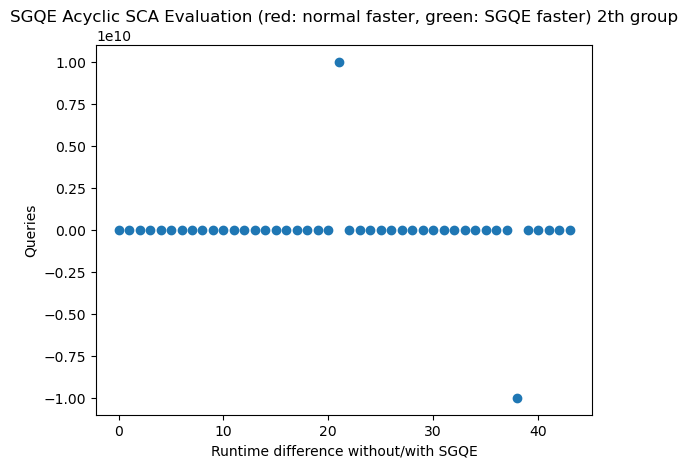

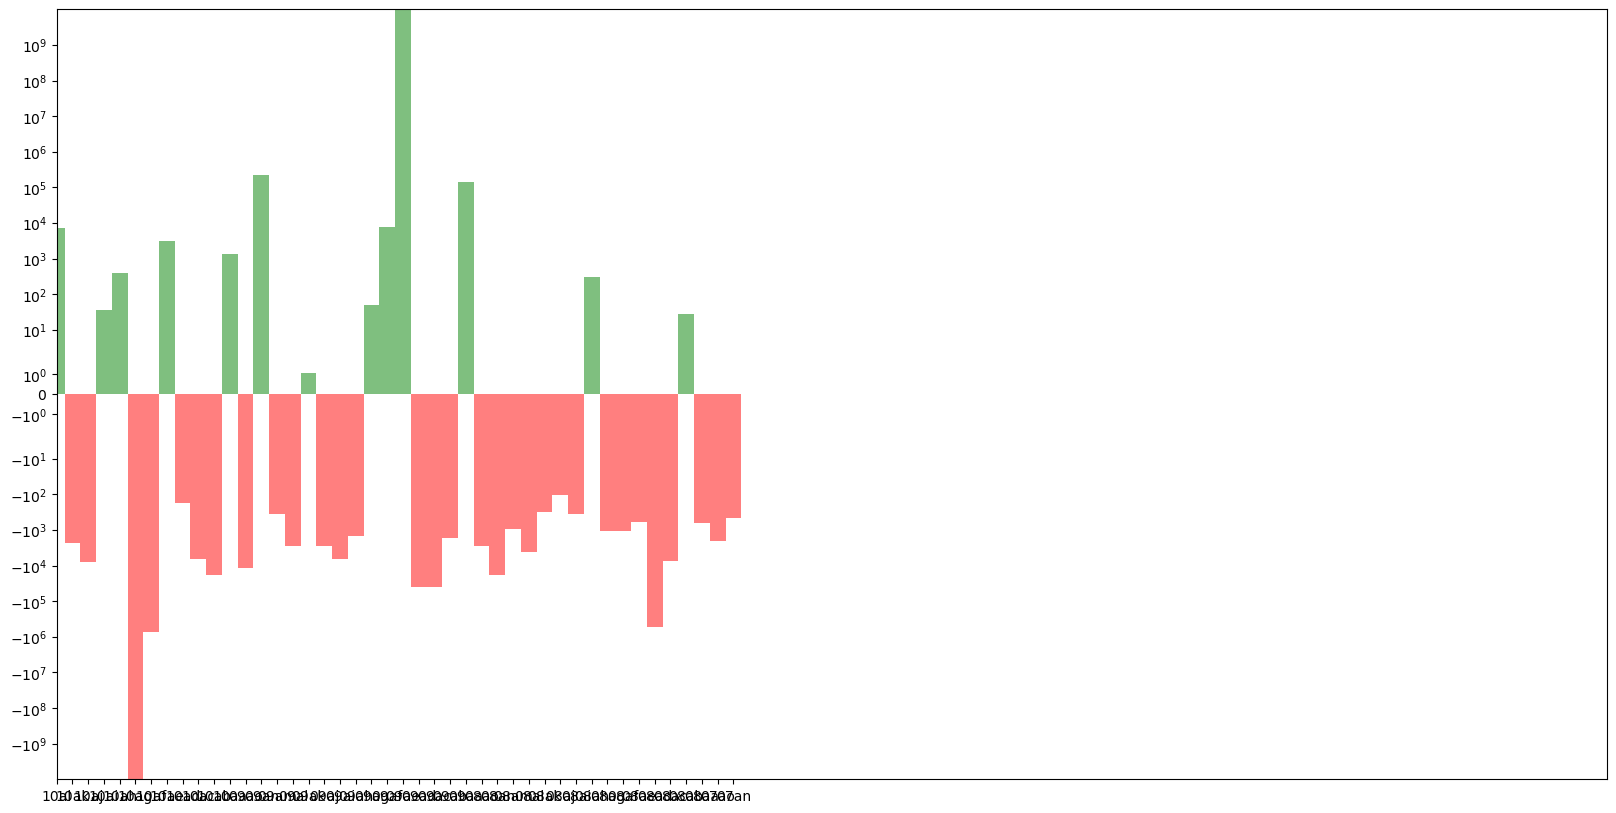

--------
Runtime differences
Values in ms (when both versions solved the instance)
minimal difference (with sign --> best for SGQE): -226399.99999999997, maximal difference (with sign --> best for normal): 744683.6
average difference (negative --> SGQE better, positive --> normal better): 25425.34285714286
median difference (negative --> SGQE better, positive --> normal better): 990.5999999999996
--------
Runtime count: left: SGQE better, right: Normal better
12 30
--------
Memory count: left: SGQE better, right: Normal better
1 41
--------
Memory differences
Values in MB
minimal difference (with sign --> best for SGQE): -11608.702004, maximal difference (with sign --> best for normal): 20737.362789
average difference (negative --> SGQE better, positive --> normal better): 1642.4387706363634
median difference (negative --> SGQE better, positive --> normal better): 493.38344099999995
--------
SGQE unsolved: 1, Normal unsolved: 1
--------
Unsolved by normal
['09ae']
--------
unsolved by 

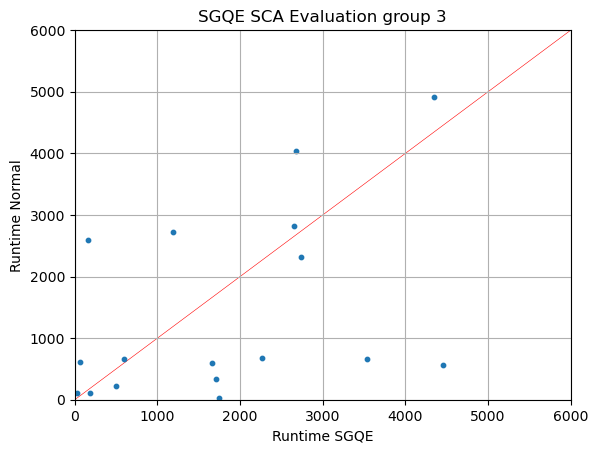

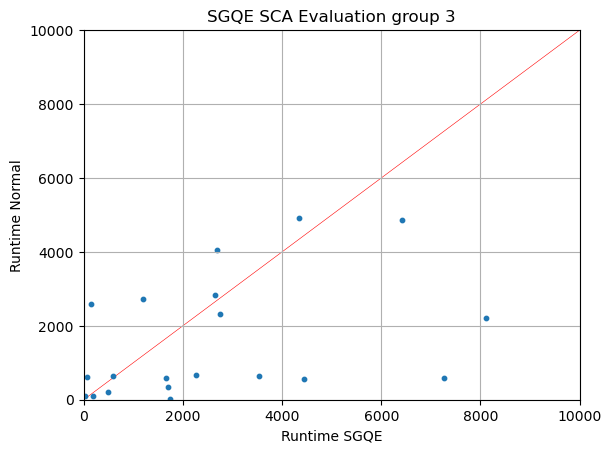

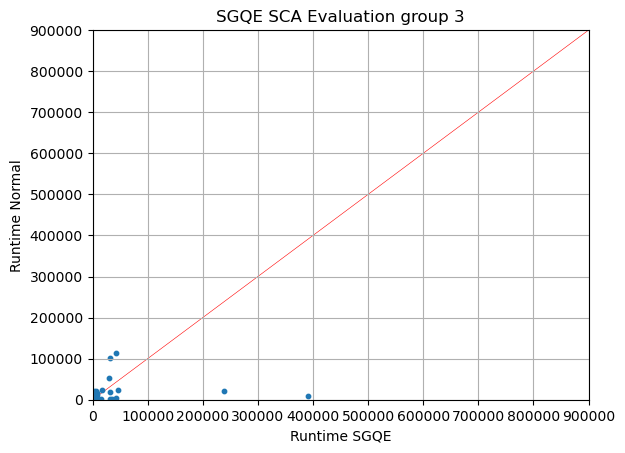

[ 9.9992592e+09  1.3600000e+03 -3.1461700e+04  8.8800000e+03
  9.9999386e+09  7.0900000e+04  5.7000000e+02  1.7000000e+02
  2.4324000e+03 -3.8110000e+04  1.4210000e+04 -5.9100000e+03
 -1.3724000e+03  1.4220000e+04 -2.3000000e+04 -1.3000000e+04
 -2.8140000e+02 -4.3000000e+02 -1.0633000e+03  2.2900000e+03
 -6.6846000e+03  2.3400000e+04 -9.9999912e+09 -3.5430800e+04
  1.8730000e+04 -1.2150000e+04  1.1990000e+04 -3.8876000e+03
  7.2600000e+04 -2.1680000e+05 -9.9999849e+09 -1.5831000e+03
 -2.8860000e+03  0.0000000e+00  1.5400000e+03 -1.5700000e+03
  6.2800000e+01 -1.7233000e+03 -3.8090000e+05  1.0560000e+04
 -6.7500000e+01  6.2000000e+03  7.7300000e+01  5.4330000e+02]
-9999991199.0


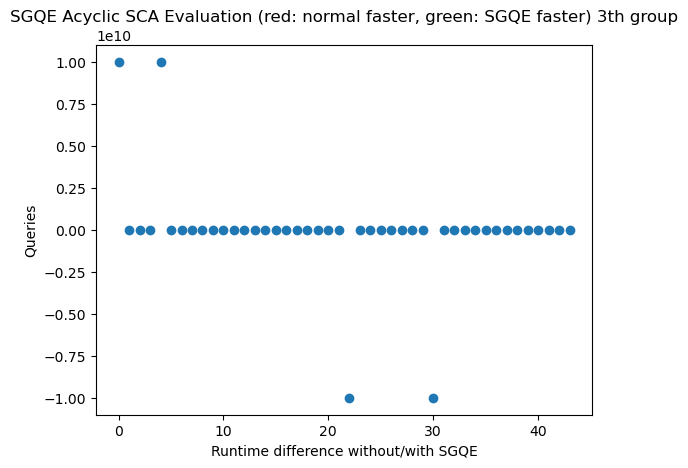

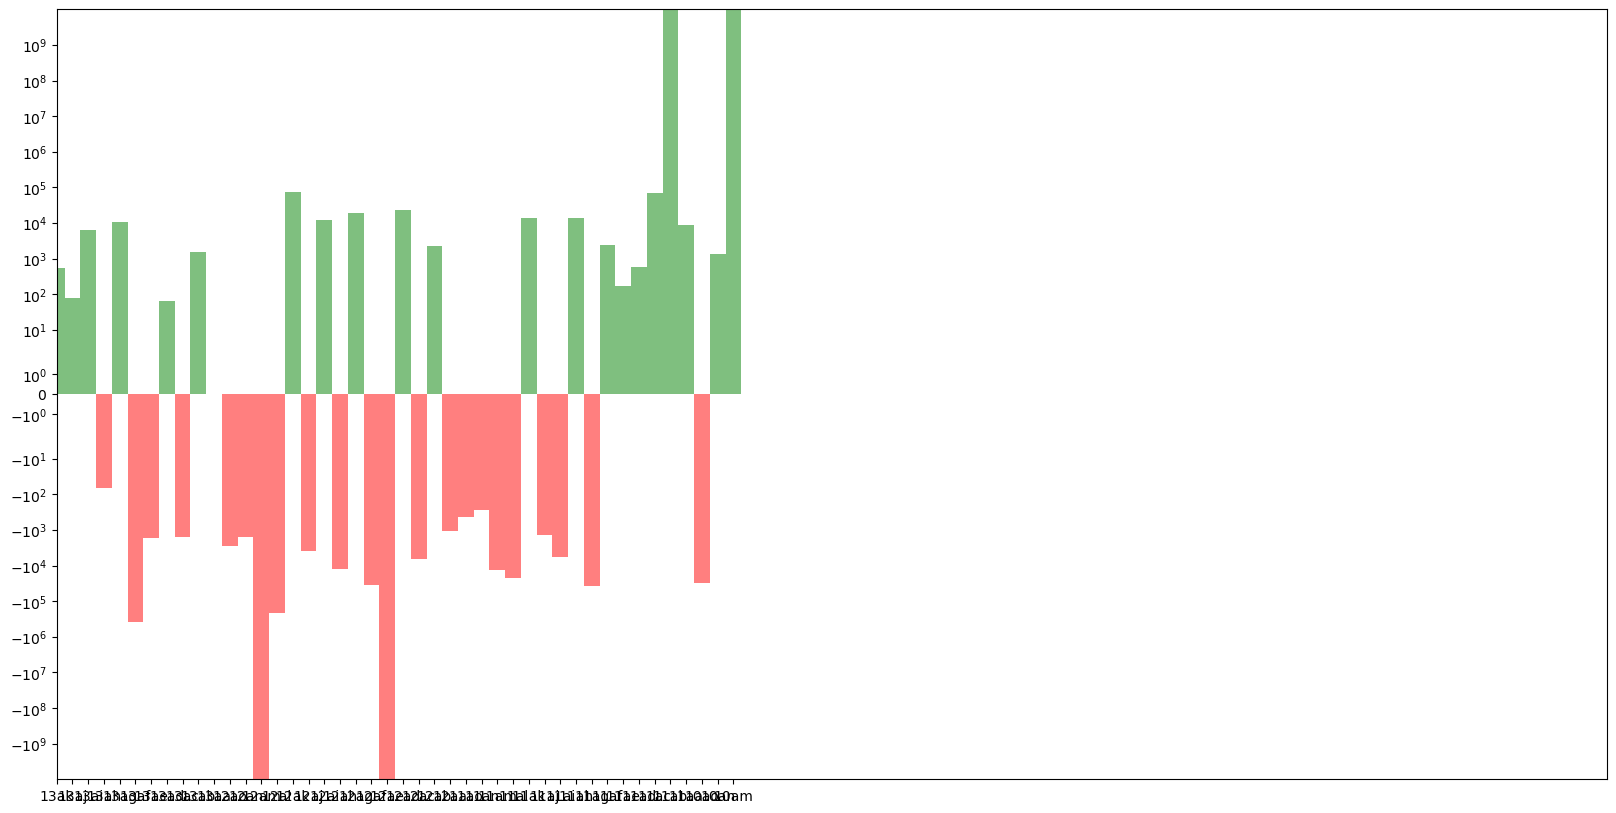

--------
Runtime differences
Values in ms (when both versions solved the instance)
minimal difference (with sign --> best for SGQE): -72600.0, maximal difference (with sign --> best for normal): 380900.0
average difference (negative --> SGQE better, positive --> normal better): 13271.176923076924
median difference (negative --> SGQE better, positive --> normal better): 67.5
--------
Runtime count: left: SGQE better, right: Normal better
19 20
--------
Memory count: left: SGQE better, right: Normal better
0 39
--------
Memory differences
Values in MB
minimal difference (with sign --> best for SGQE): 0.0, maximal difference (with sign --> best for normal): 18436.678693
average difference (negative --> SGQE better, positive --> normal better): 2092.6279977272725
median difference (negative --> SGQE better, positive --> normal better): 905.254358
--------
SGQE unsolved: 3, Normal unsolved: 3
--------
Unsolved by normal
['10am', '11ab', '13aa']
--------
unsolved by SGQE
['12ae', '12am', '13

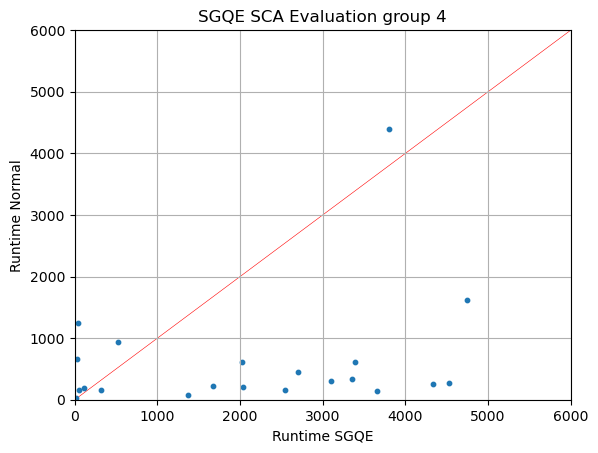

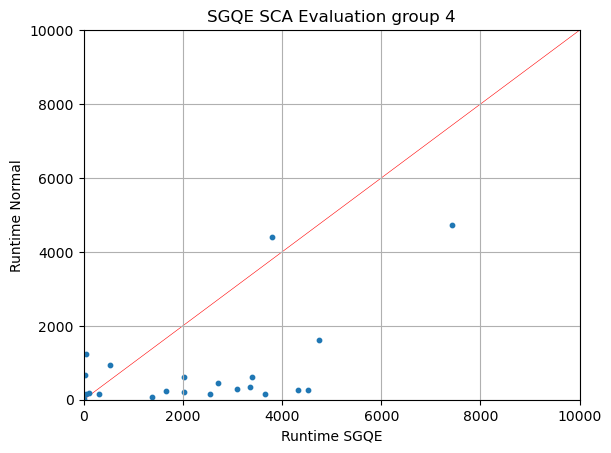

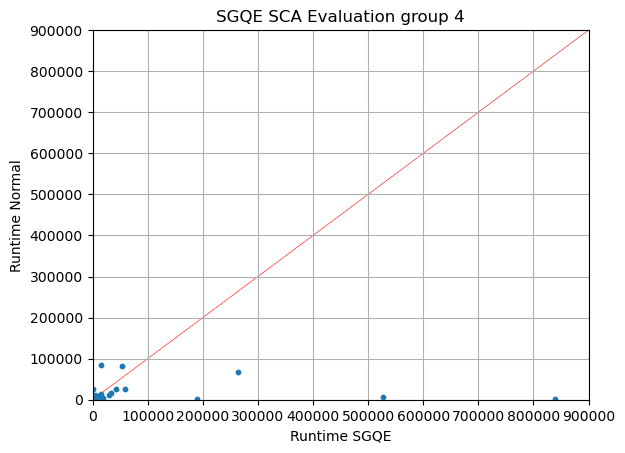

[-1.44700000e+03 -1.80000000e+04 -1.49400000e+04  9.99980000e+09
 -2.20000000e+03  9.99999741e+09 -2.80040000e+03  6.00000000e+02
 -1.80000000e+04  0.00000000e+00 -1.90000000e+03  4.09300000e+02
  2.93000000e+04 -3.50120000e+03 -9.99994220e+09 -9.30000000e+03
 -1.84000000e+04 -1.96100000e+05  6.91000000e+04 -1.40380000e+03
  8.02000000e+01 -4.07290000e+03 -2.37800000e+03 -5.19700000e+05
 -2.69000000e+03  1.19730000e+03  1.05700000e+02 -2.76960000e+03
 -4.26600000e+03  2.49889000e+04 -1.87530000e+05 -6.64000000e+03
 -3.36000000e+04 -1.82680000e+03  6.25000000e+03 -3.01780000e+03
 -8.36640000e+05 -1.29270000e+03  6.41200000e+02  1.79000000e+01
 -3.13000000e+03 -2.25670000e+03 -1.59900000e+02  9.99993660e+09]
-9999942199.0


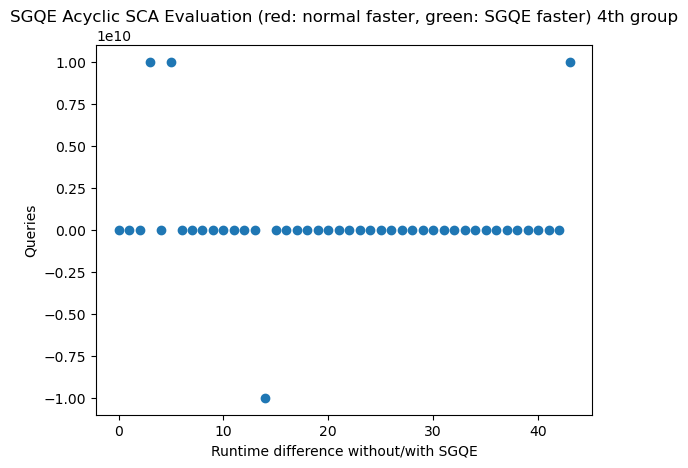

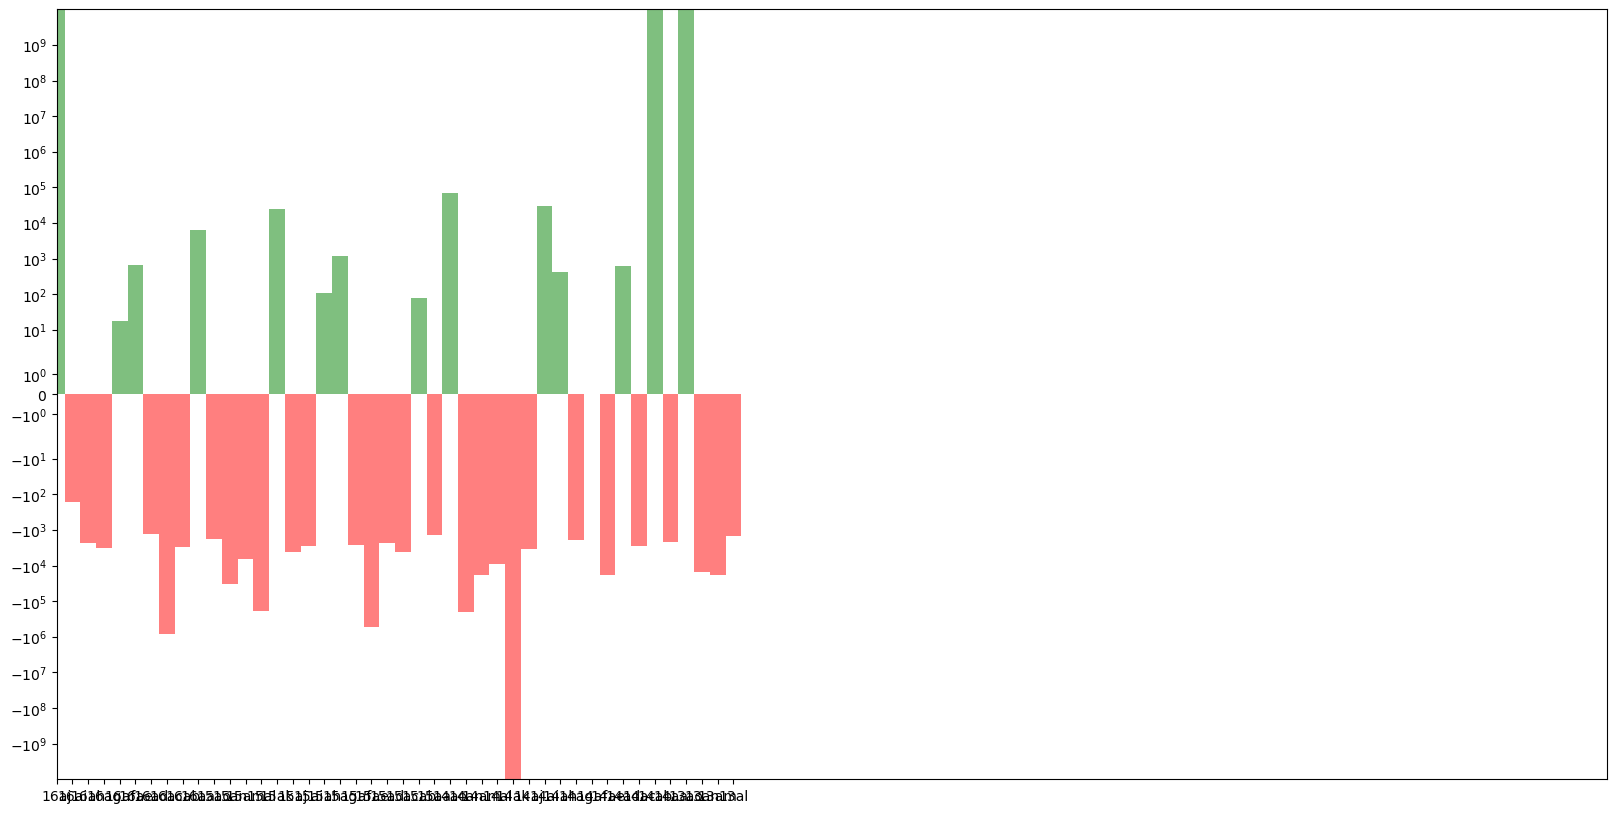

--------
Runtime differences
Values in ms (when both versions solved the instance)
minimal difference (with sign --> best for SGQE): -69100.0, maximal difference (with sign --> best for normal): 836640.0
average difference (negative --> SGQE better, positive --> normal better): 45314.674358974364
median difference (negative --> SGQE better, positive --> normal better): 2378.0
--------
Runtime count: left: SGQE better, right: Normal better
11 28
--------
Memory count: left: SGQE better, right: Normal better
1 38
--------
Memory differences
Values in MB
minimal difference (with sign --> best for SGQE): -124.400633, maximal difference (with sign --> best for normal): 25338.507755
average difference (negative --> SGQE better, positive --> normal better): 3222.4499425227273
median difference (negative --> SGQE better, positive --> normal better): 1230.6787279999999
--------
SGQE unsolved: 2, Normal unsolved: 4
SGQE better
--------
Unsolved by normal
['13ao', '14ab', '14af', '16aj']
--------

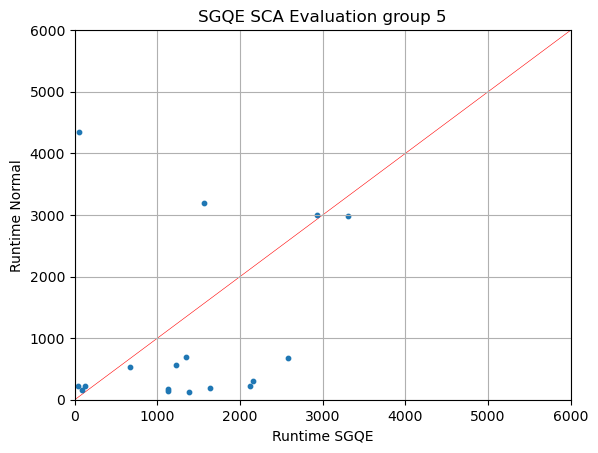

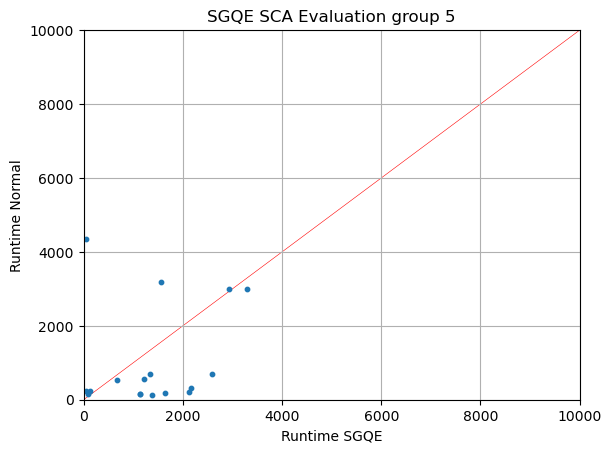

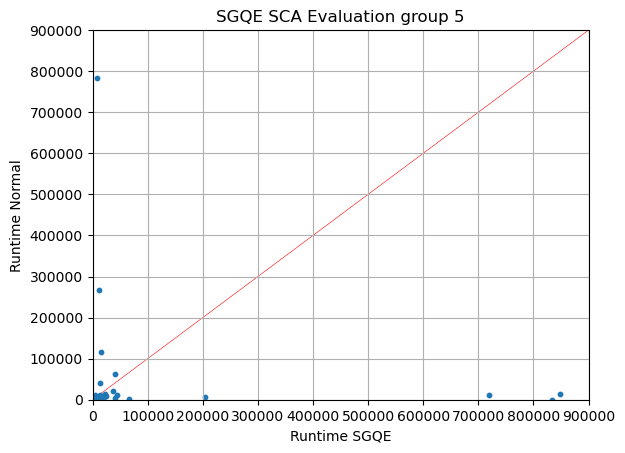

[-1.89460000e+03 -7.08200000e+05 -9.63700000e+02 -9.00000000e+02
 -3.68500000e+04  9.99998860e+09 -1.33700000e+04 -9.60000000e+03
 -9.99560000e+03 -8.40000000e+03  9.99997380e+09  0.00000000e+00
  4.28480000e+03 -3.10000000e+02 -1.89790000e+03 -1.96500000e+05
 -8.35600000e+05 -1.34300000e+02 -1.85230000e+03 -6.51400000e+02
  1.83700000e+02  6.71000000e+01 -8.34221200e+05  2.54500000e+05
  7.00000000e+01  6.12000000e+03  2.13000000e+04  2.85000000e+04
 -1.44290000e+03 -6.43400000e+04 -6.43400000e+02  1.02700000e+02
  1.01800000e+05  9.99997910e+09 -1.71200000e+04  7.74750000e+05
  9.99997590e+09 -1.25890000e+03 -1.51000000e+04  9.99999441e+09
 -3.38000000e+04  1.63000000e+03 -9.82100000e+02]
-835600.0


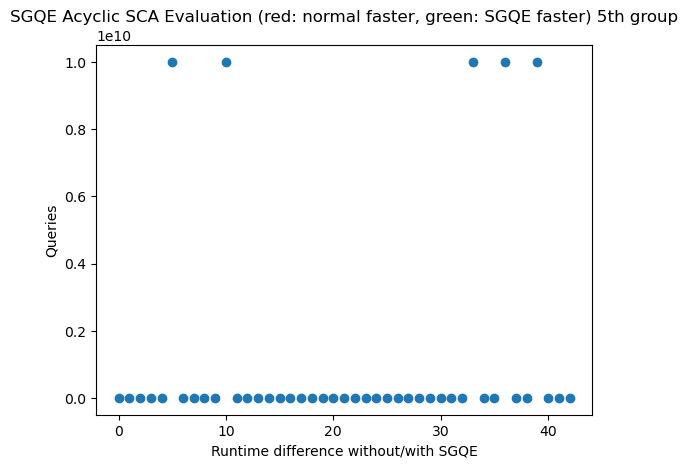

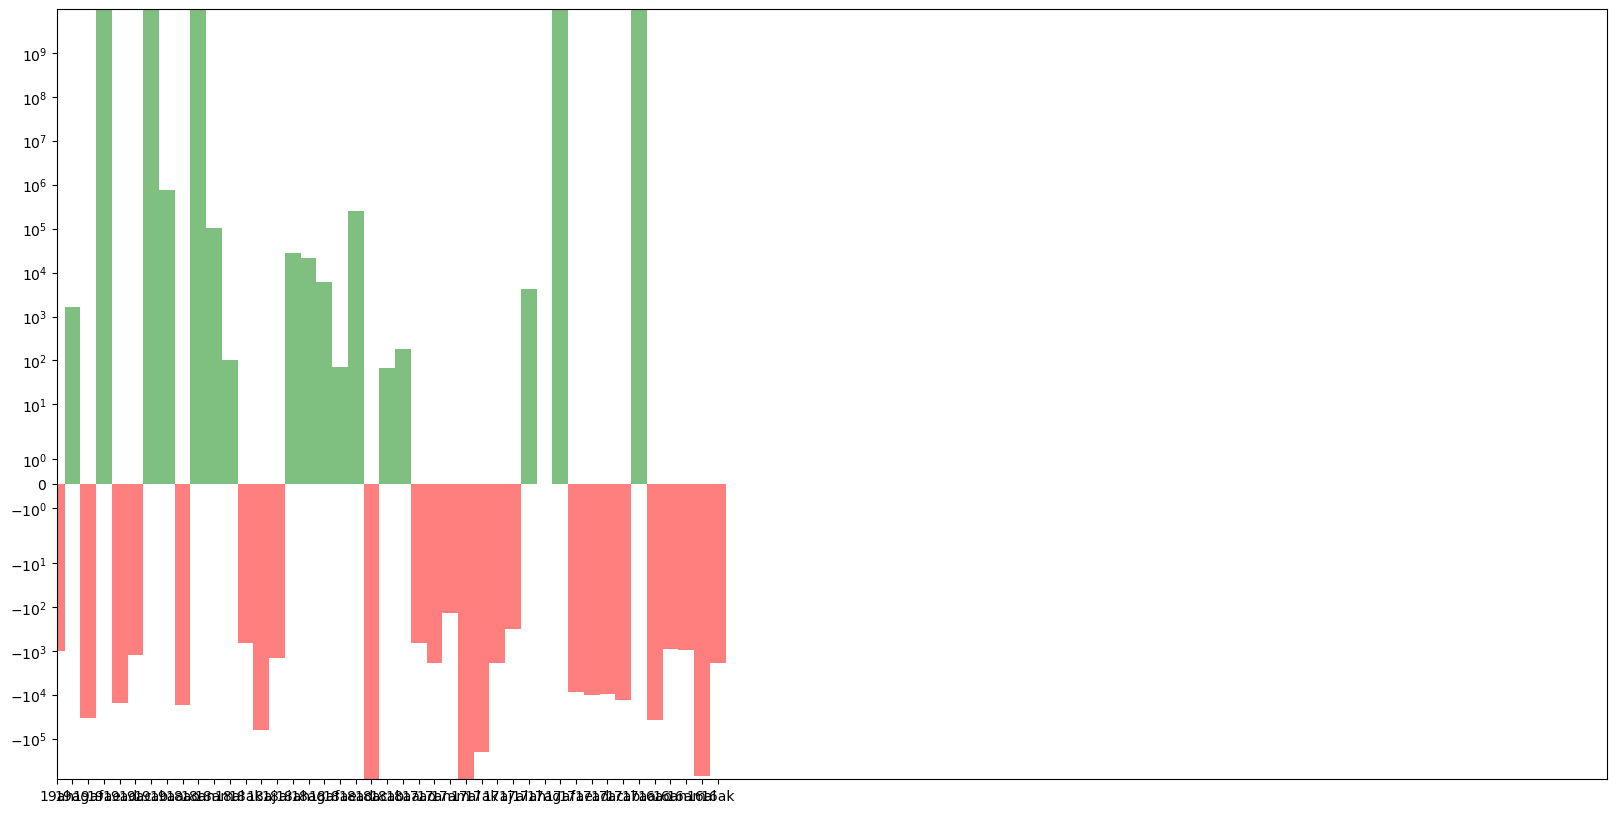

--------
Runtime differences
Values in ms (when both versions solved the instance)
minimal difference (with sign --> best for SGQE): -774750.0, maximal difference (with sign --> best for normal): 835600.0
average difference (negative --> SGQE better, positive --> normal better): 43316.75675675676
median difference (negative --> SGQE better, positive --> normal better): 982.1
--------
Runtime count: left: SGQE better, right: Normal better
12 25
--------
Memory count: left: SGQE better, right: Normal better
3 34
--------
Memory differences
Values in MB
minimal difference (with sign --> best for SGQE): -2651.732826, maximal difference (with sign --> best for normal): 26488.783203
average difference (negative --> SGQE better, positive --> normal better): 3393.464493209302
median difference (negative --> SGQE better, positive --> normal better): 1001.869449
--------
SGQE unsolved: 1, Normal unsolved: 6
SGQE better
--------
Unsolved by normal
['17aa', '17af', '17ag', '18an', '19ab', '19ae']


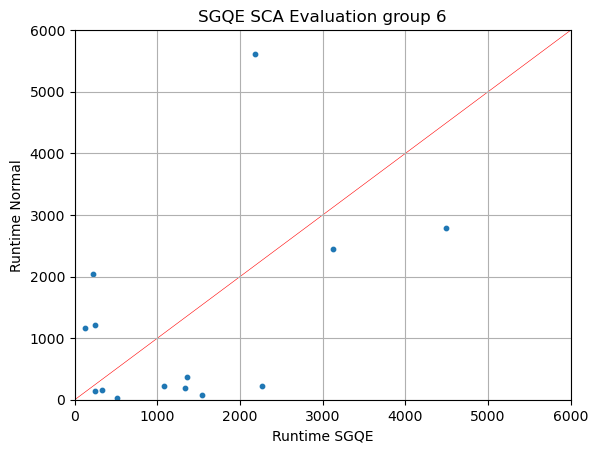

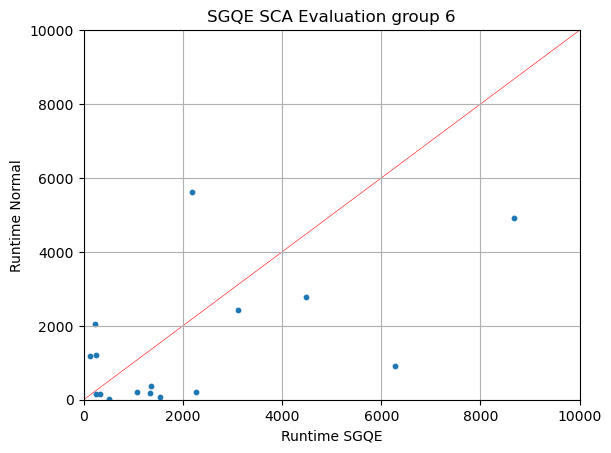

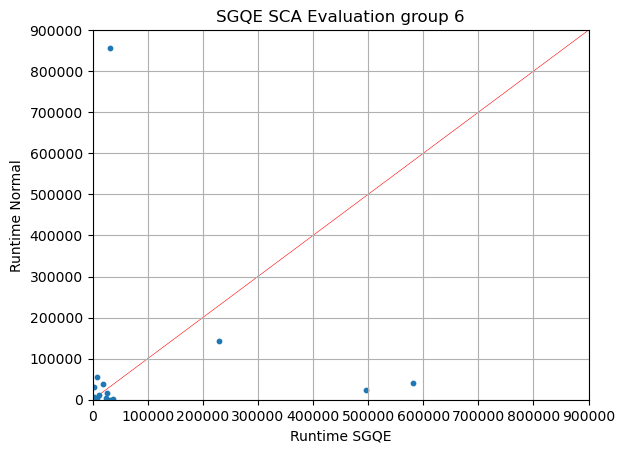

[ 1.05020000e+03 -3.12878000e+04  9.99996900e+09  9.99996670e+09
 -9.99998710e+09 -5.36300000e+03 -2.04190000e+03  9.65400000e+02
 -4.71300000e+05 -1.14440000e+03  9.99959790e+09  9.99958790e+09
 -6.80000000e+02  0.00000000e+00 -5.42500000e+05 -3.76000000e+03
  3.44000000e+03  1.90000000e+04 -1.71000000e+03 -9.99999348e+09
  9.99973030e+09 -8.59900000e+02 -1.11000000e+04 -1.02300000e+02
  9.99999199e+09 -8.85000000e+04  2.93200000e+04  8.23500000e+05
  9.99998830e+09 -9.99999980e+09 -9.97500000e+02  4.76500000e+04
 -1.46790000e+03 -3.67261000e+04  0.00000000e+00 -2.13400000e+04
  9.99998890e+09 -1.74200000e+02  9.99996250e+09 -4.78700000e+02
 -1.60000000e+03  1.82020000e+03  9.99999271e+09]
-9999999805.0


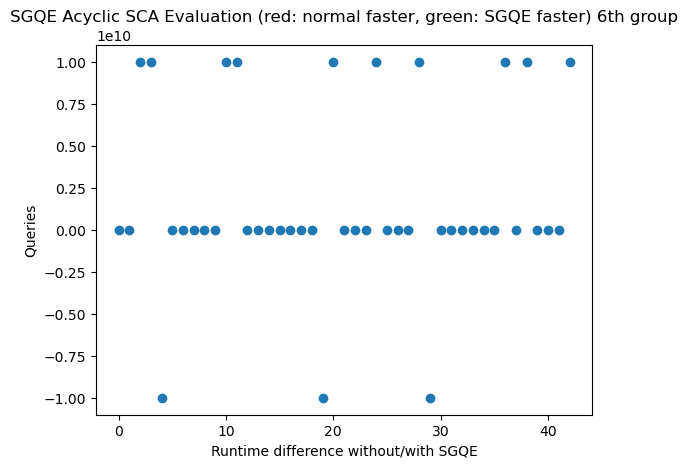

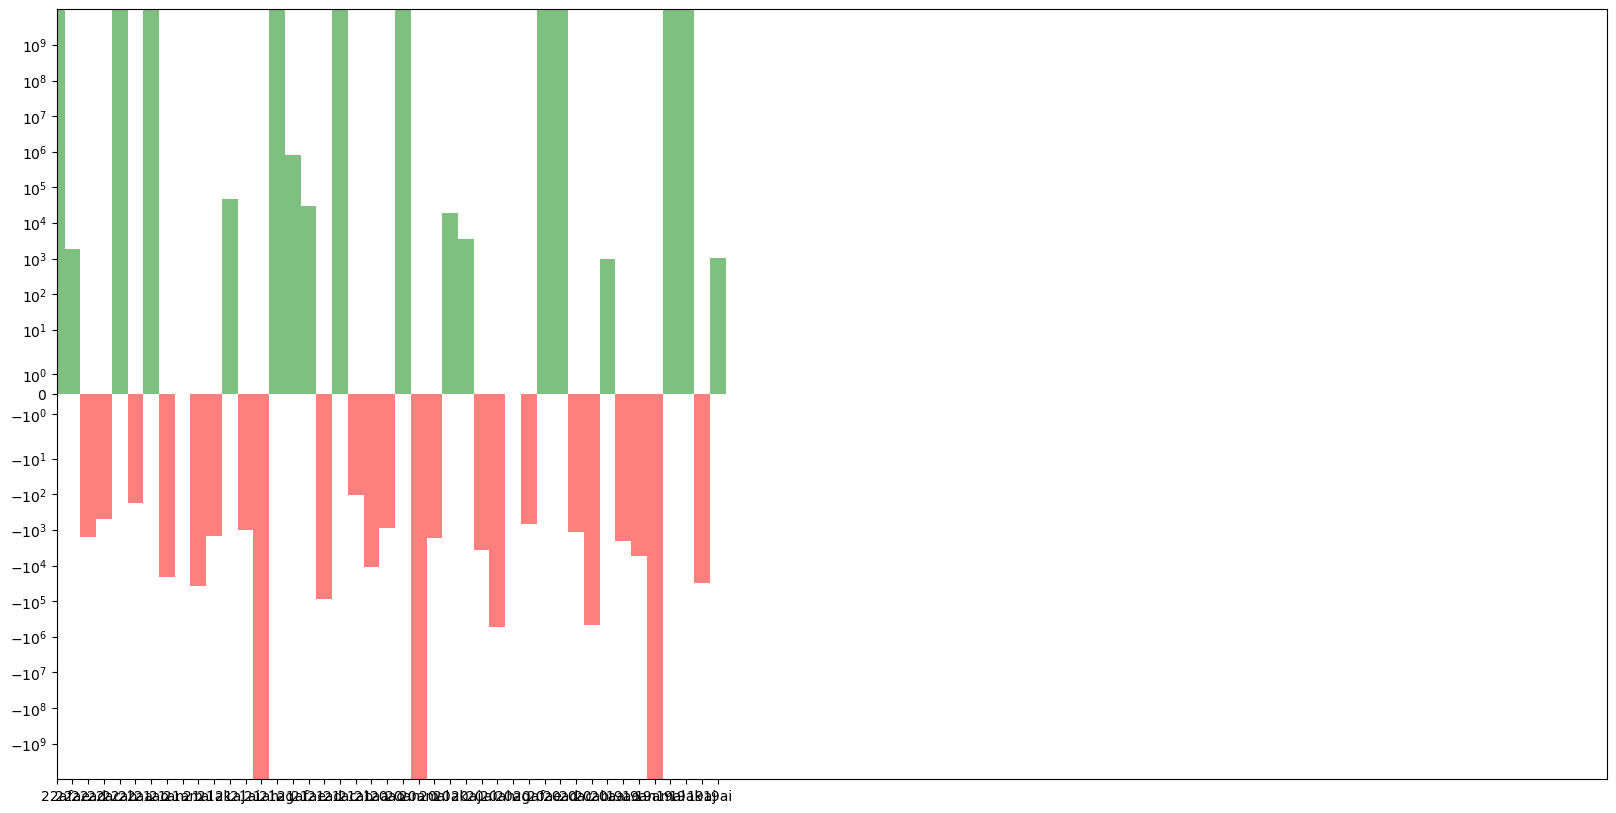

--------
Runtime differences
Values in ms (when both versions solved the instance)
minimal difference (with sign --> best for SGQE): -823500.0, maximal difference (with sign --> best for normal): 542500.0
average difference (negative --> SGQE better, positive --> normal better): 10585.282142857148
median difference (negative --> SGQE better, positive --> normal better): 1070.95
--------
Runtime count: left: SGQE better, right: Normal better
8 20
--------
Memory count: left: SGQE better, right: Normal better
2 26
--------
Memory differences
Values in MB
minimal difference (with sign --> best for SGQE): -3851.637094, maximal difference (with sign --> best for normal): 18776.949504
average difference (negative --> SGQE better, positive --> normal better): 2453.189450465116
median difference (negative --> SGQE better, positive --> normal better): 139.995787
--------
SGQE unsolved: 5, Normal unsolved: 12
SGQE better
--------
Unsolved by normal
['19ak', '19al', '20ad', '20ae', '20ag', '20an'

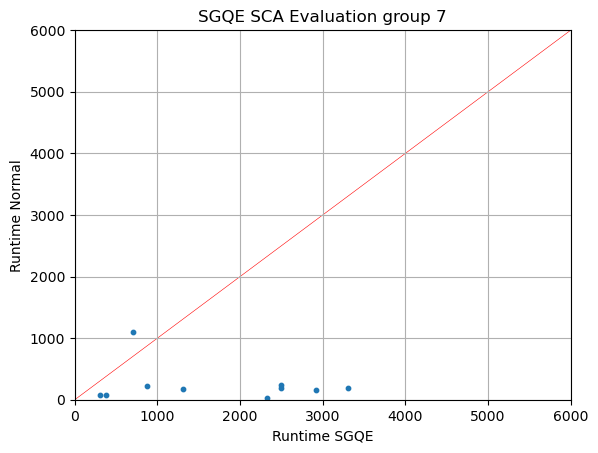

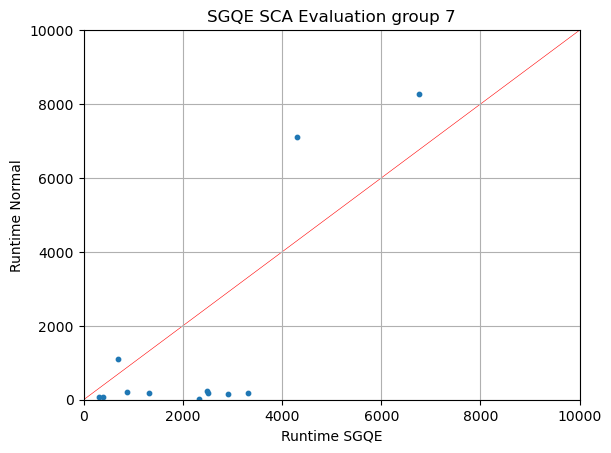

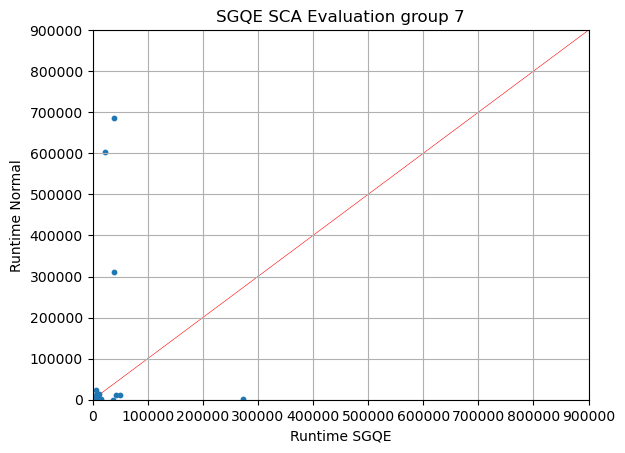

[-2.25450000e+03 -2.99000000e+04 -3.75000000e+04 -3.12260000e+03
 -9.99999704e+09  9.99998530e+09 -9.99999988e+09  9.99997210e+09
 -1.12990000e+03 -2.76520000e+03  6.30000000e+03  9.99955940e+09
  2.80000000e+03  9.99996950e+09  0.00000000e+00  9.99991230e+09
 -2.69890000e+05 -6.51800000e+02  9.99995270e+09  2.71300000e+05
 -9.99999436e+09  6.45500000e+05  9.99999270e+09 -9.99999977e+09
 -9.99999889e+09  1.50000000e+03  9.99963840e+09 -9.99999924e+09
 -2.26200000e+02  2.40000000e+03 -3.02700000e+02  3.97900000e+02
  5.51000000e+03 -9.99999435e+09  5.79900000e+05  1.59800000e+04
 -7.02000000e+03 -2.29660000e+03  0.00000000e+00  9.99986700e+09
 -2.31770000e+03 -3.74799000e+04 -1.45055000e+04]
-9999999878.3


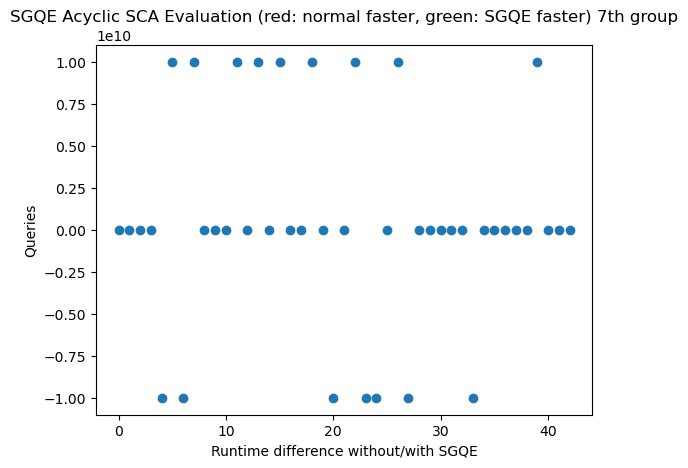

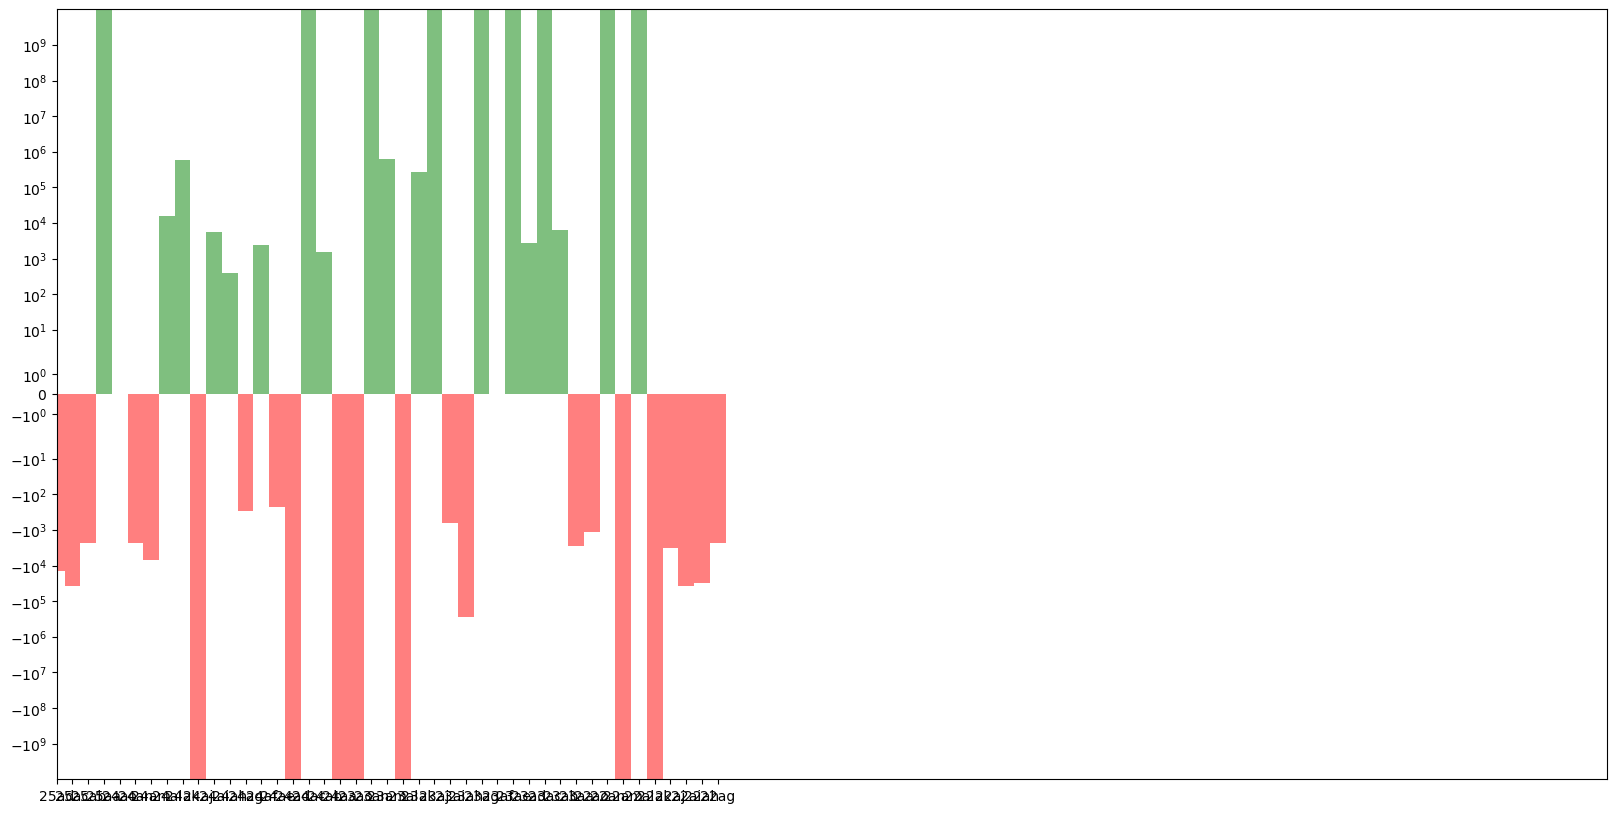

--------
Runtime differences
Values in ms (when both versions solved the instance)
minimal difference (with sign --> best for SGQE): -645500.0, maximal difference (with sign --> best for normal): 269890.0
average difference (negative --> SGQE better, positive --> normal better): -44809.012
median difference (negative --> SGQE better, positive --> normal better): 651.8
--------
Runtime count: left: SGQE better, right: Normal better
10 15
--------
Memory count: left: SGQE better, right: Normal better
0 25
--------
Memory differences
Values in MB
minimal difference (with sign --> best for SGQE): 0.0, maximal difference (with sign --> best for normal): 14775.76969
average difference (negative --> SGQE better, positive --> normal better): 1740.9895461627907
median difference (negative --> SGQE better, positive --> normal better): 474.107118
--------
SGQE unsolved: 9, Normal unsolved: 11
SGQE better
--------
Unsolved by normal
['22al', '22an', '23ac', '23ae', '23af', '23ag', '23aj', '23an', 

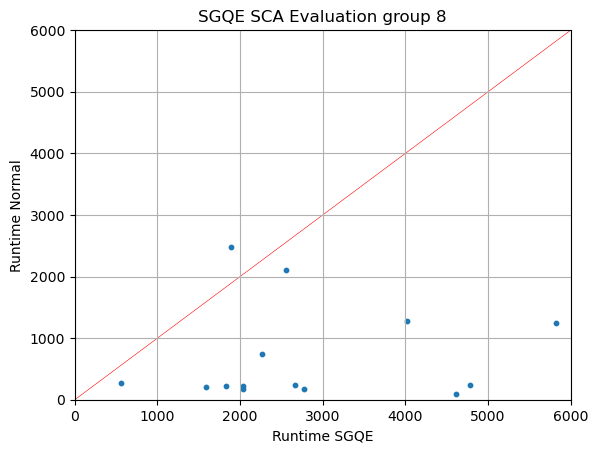

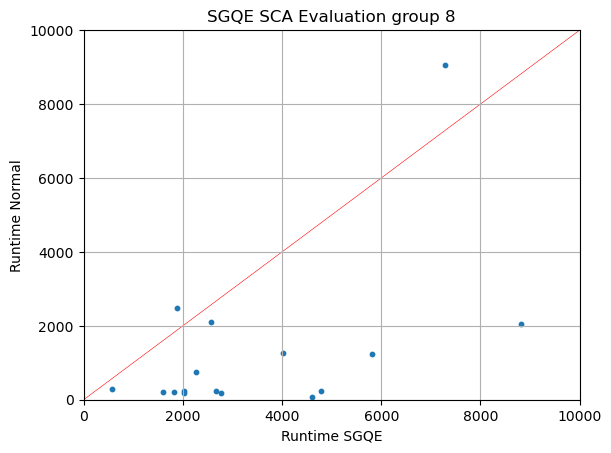

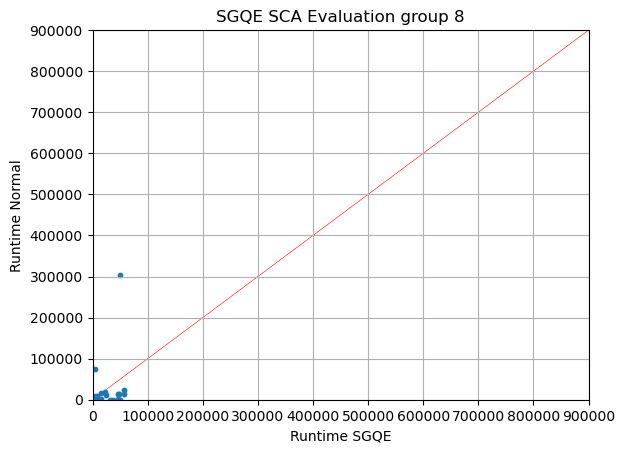

[ 1.76000000e+03 -1.51570000e+03  9.99996860e+09 -9.99999540e+09
  2.54300000e+05 -1.37770000e+03  9.99998280e+09 -3.60000000e+03
 -2.59640000e+03 -1.41100000e+04 -1.61190000e+03  0.00000000e+00
 -4.50000000e+02  9.99996610e+09 -1.86140000e+03  9.99994790e+09
 -1.38000000e+04 -4.58000000e+03 -1.80730000e+03  0.00000000e+00
 -2.86200000e+02  7.13800000e+04  9.99999517e+09 -2.42640000e+03
  9.99996150e+09 -2.75000000e+03 -3.41000000e+04 -3.14194000e+04
  9.99996590e+09  9.99986370e+09 -4.53450000e+03  7.75000000e+03
 -3.47000000e+04  5.90000000e+02 -3.12000000e+04 -4.51000000e+04
 -4.91506000e+04 -6.76000000e+03 -3.63149000e+04 -4.46500000e+04
 -4.52360000e+03 -9.99999985e+09 -9.99999995e+09]
-9999999946.2


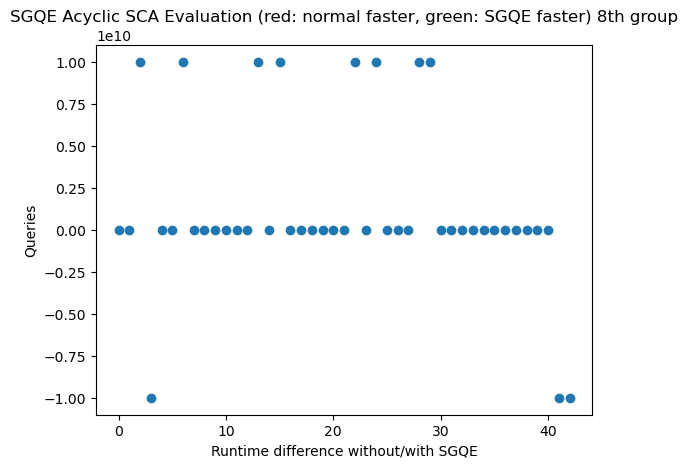

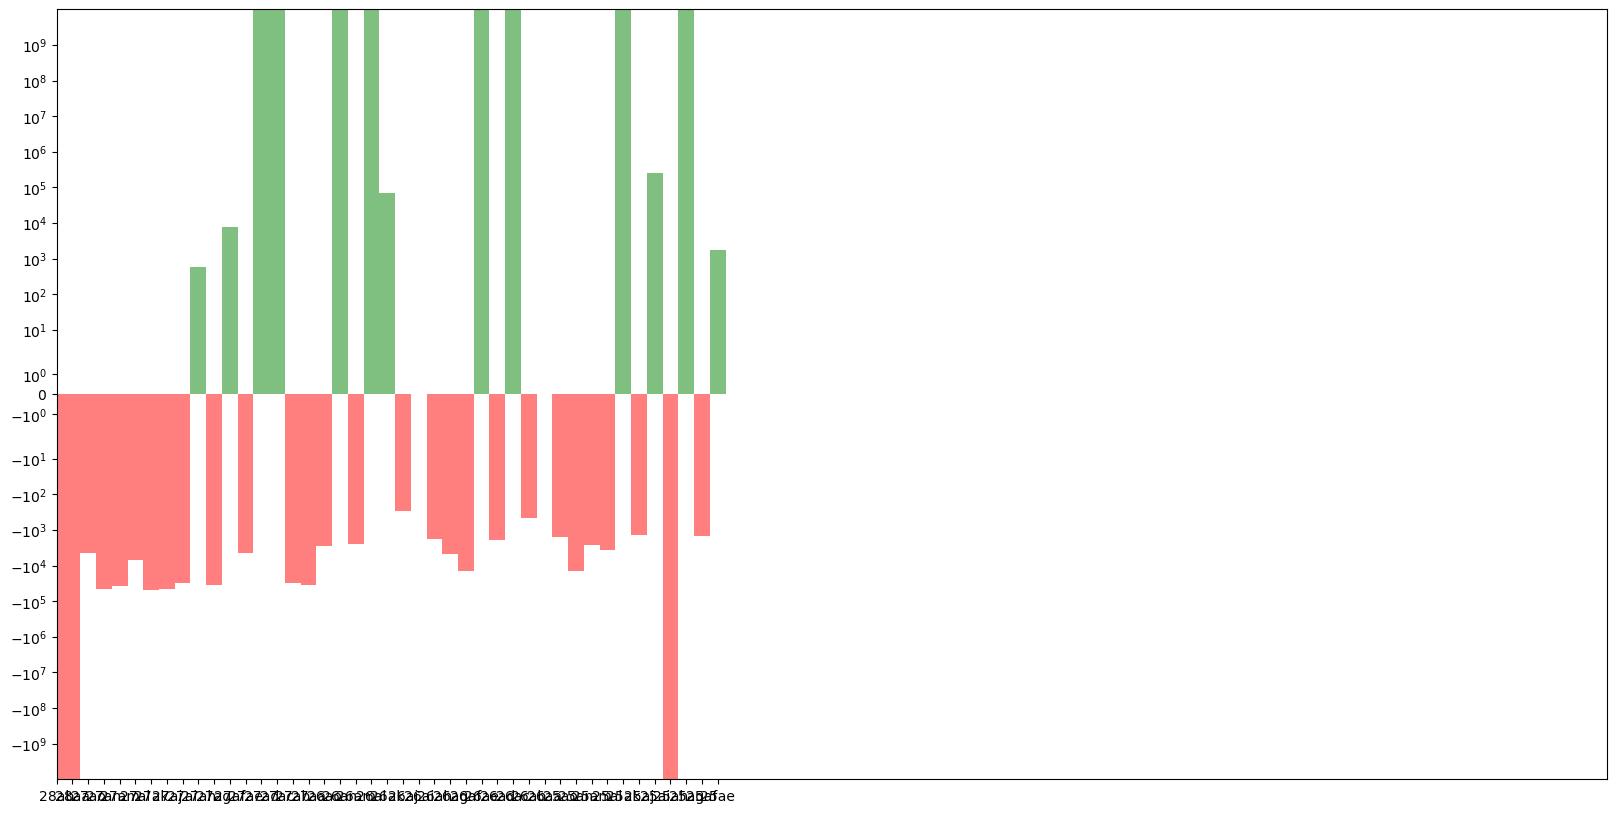

--------
Runtime differences
Values in ms (when both versions solved the instance)
minimal difference (with sign --> best for SGQE): -254300.0, maximal difference (with sign --> best for normal): 49150.6
average difference (negative --> SGQE better, positive --> normal better): 1272.4516129032256
median difference (negative --> SGQE better, positive --> normal better): 2749.9999999999995
--------
Runtime count: left: SGQE better, right: Normal better
5 25
--------
Memory count: left: SGQE better, right: Normal better
1 30
--------
Memory differences
Values in MB
minimal difference (with sign --> best for SGQE): -31698.433103, maximal difference (with sign --> best for normal): 25068.534257
average difference (negative --> SGQE better, positive --> normal better): 3134.9374561627915
median difference (negative --> SGQE better, positive --> normal better): 1227.464986
--------
SGQE unsolved: 4, Normal unsolved: 9
SGQE better
--------
Unsolved by normal
['25ag', '25ak', '26aa', '26ac', '2

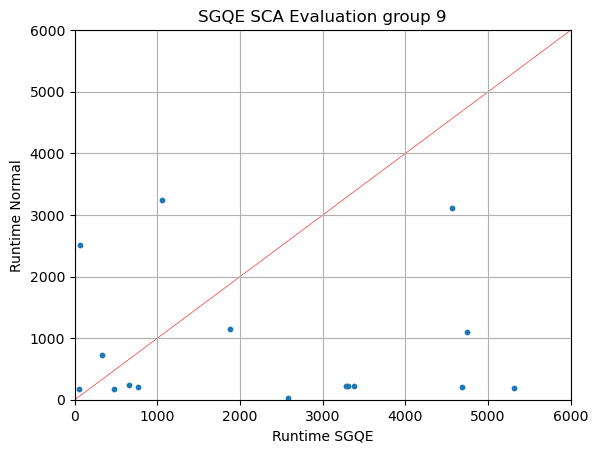

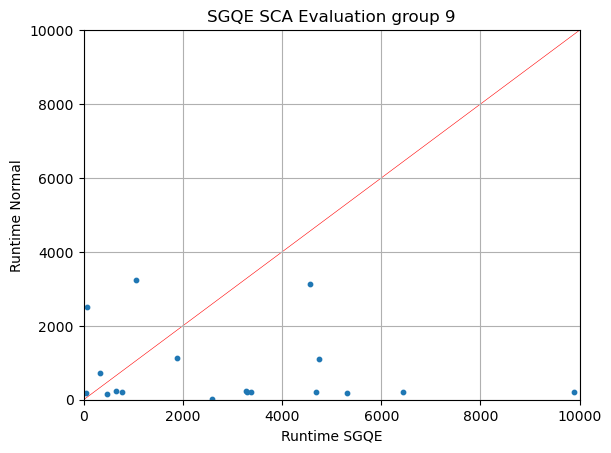

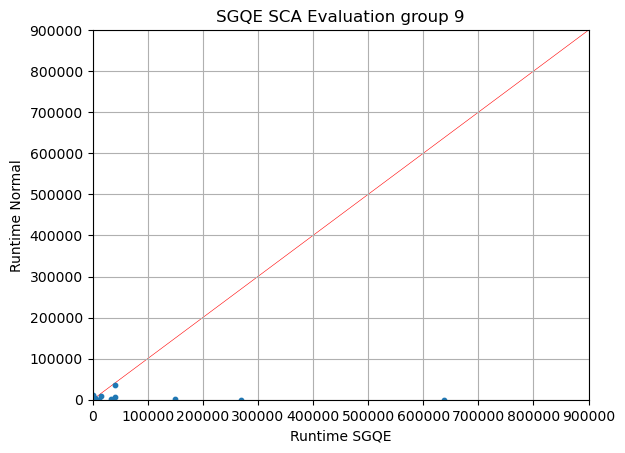

[-3.07500000e+02 -9.99999324e+09  9.99998990e+09  2.20000000e+03
 -3.76204000e+04  9.99977360e+09  9.99996680e+09 -6.70000000e+03
 -1.07760000e+04 -3.64000000e+03  3.99700000e+02 -5.12060000e+03
 -1.44000000e+03 -3.05080000e+03  9.99996690e+09 -6.96000000e+03
 -3.15830000e+03 -2.70019500e+05  2.45010000e+03 -1.47740000e+05
 -4.48070000e+03 -6.37996300e+05 -6.23970000e+03 -3.58400000e+04
  9.99999930e+09  0.00000000e+00  1.24075000e+04 -9.99999931e+09
 -9.99999982e+09 -9.68670000e+03  9.99998120e+09 -7.40000000e+02
  9.99999239e+09 -3.49982000e+04 -5.61800000e+02 -2.55460000e+03
  9.99939280e+09 -3.08380000e+03 -3.23754000e+04  1.27200000e+02
  0.00000000e+00  9.99999830e+09 -4.26000000e+02]
-9999999824.3


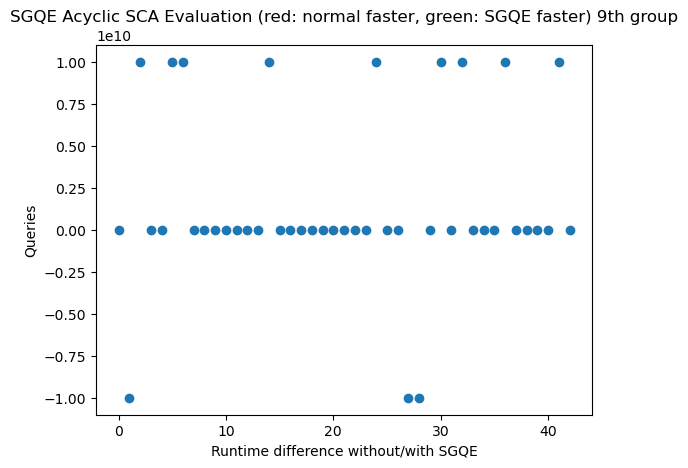

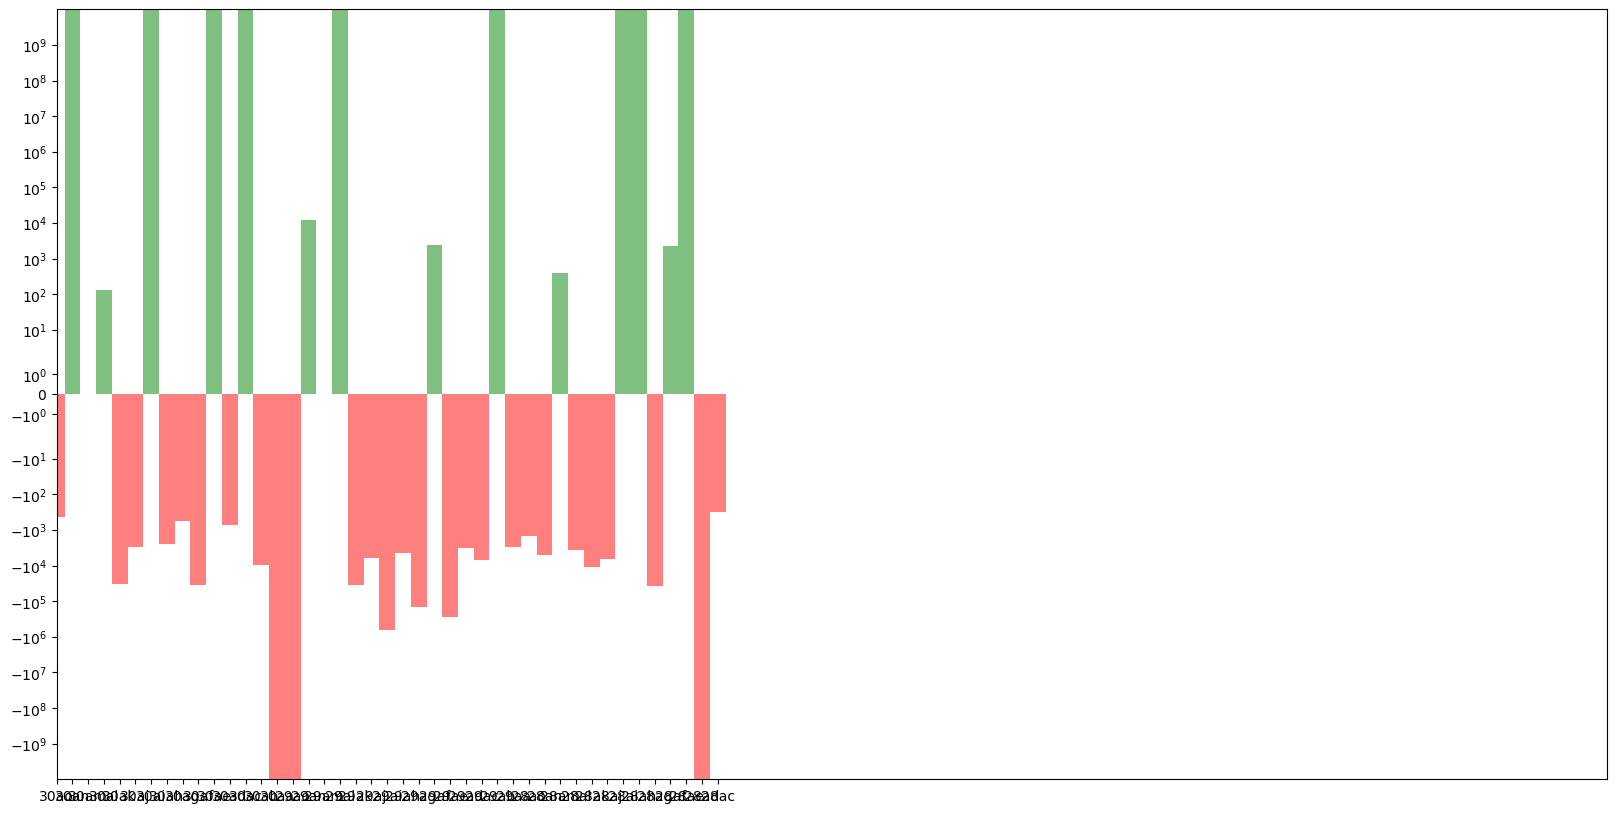

--------
Runtime differences
Values in ms (when both versions solved the instance)
minimal difference (with sign --> best for SGQE): -12407.5, maximal difference (with sign --> best for normal): 637996.3
average difference (negative --> SGQE better, positive --> normal better): 43032.131034482765
median difference (negative --> SGQE better, positive --> normal better): 3640.0
--------
Runtime count: left: SGQE better, right: Normal better
5 24
--------
Memory count: left: SGQE better, right: Normal better
2 27
--------
Memory differences
Values in MB
minimal difference (with sign --> best for SGQE): -504.573694, maximal difference (with sign --> best for normal): 17897.113616
average difference (negative --> SGQE better, positive --> normal better): 2727.542231232558
median difference (negative --> SGQE better, positive --> normal better): 765.8529
--------
SGQE unsolved: 5, Normal unsolved: 11
SGQE better
--------
Unsolved by normal
['28ae', '28ah', '28ai', '29ab', '29al', '29am', '30

In [89]:
i=0
for (q, v_a, v_b, m1, m2) in zip(split(queries, 10), split(val_a, 10), split(val_b, 10), split(maxmemlist1, 10), split(maxmemlist2, 10)):
    
    print("Group " + str(i))
    print("Queries: " + ", ".join(q))
    
    ### Runtime plots
    scatterplot2(v_a, v_b, "Runtime SGQE", "Runtime Normal", "SGQE SCA Evaluation group " +str(i), "./SGQESCA"+str(i)+"EvalScatterPlot.png")

    scatterplotWithLim(v_a, v_b, "Runtime SGQE", "Runtime Normal", "SGQE SCA Evaluation group " +str(i), "./SGQESCA"+str(i)+"10kEvalScatterPlot.png", 10000, 10000)
    scatterplotWithLim(v_a, v_b, "Runtime SGQE", "Runtime Normal", "SGQE SCA Evaluation group " +str(i), "./SGQESCA"+str(i)+"900kEvalScatterPlot.png", 900000, 900000)
    
    diffPlot2(v_a, v_b, "Runtime difference without/with SGQE", "Queries", "SGQE Acyclic SCA Evaluation (red: normal faster, green: SGQE faster) " +str(i)+"th group", "./SGQE"+str(i)+"SCAEvalRTDiffPlot.png", q)

    print("--------")
    
    #### Runtime differences

    a = np.array(v_a)
    b = np.array(v_b)

    # remove not solved
    a[a==9999999999.0]=0
    b[b==9999999999.0]=0

    # both solved --> does not fully describe the situation
    ind = []
    for j in range(len(a)):
        if a[j] == 0 or b[j] == 0:
            ind.append(j)
        j = j + 1

    a = np.delete(a, ind)
    b = np.delete(b, ind)


    diffs = np.subtract(a, b)
    min = np.min(diffs)
    max = np.max(diffs)

    avg = np.average(diffs)

    print("Runtime differences")
    print("Values in ms (when both versions solved the instance)")
    print(f"minimal difference (with sign --> best for SGQE): {min}, maximal difference (with sign --> best for normal): {max}")
    print(f"average difference (negative --> SGQE better, positive --> normal better): {avg}")
    print(f"median difference (negative --> SGQE better, positive --> normal better): {np.median(diffs)}")
    print("--------")


    ### Runtime count
    a_better_count, b_better_count = countRT(v_a, v_b) # excluding unsolved instances

    # a_better: SGQE better
    # b_better: Normal better
    print("Runtime count: left: SGQE better, right: Normal better")
    print(a_better_count, b_better_count )
    print("--------")


    ### Memory count
    a_better_count, b_better_count = count(m1, m2)

    # a_better: SGQE better
    # b_better: Normal better
    print("Memory count: left: SGQE better, right: Normal better")
    print(a_better_count, b_better_count )
    print("--------")


    ### Memory differences

    diffs = [float(0) if e[0] == float(0) or e[1] == float(0) else ((e[0]- e[1])/1000000) for e in zip(m1, m2)]
    min = np.min(diffs)
    max = np.max(diffs)

    avg = np.average(diffs)

    print("Memory differences")
    print("Values in MB")
    print(f"minimal difference (with sign --> best for SGQE): {min}, maximal difference (with sign --> best for normal): {max}")
    print(f"average difference (negative --> SGQE better, positive --> normal better): {avg}")
    print(f"median difference (negative --> SGQE better, positive --> normal better): {np.median(diffs)}")

    print("--------")


    ### count unsolved
    v_a_unsolved = countOccurrence(v_a, 9999999999.0)
    v_b_unsolved = countOccurrence(v_b, 9999999999.0)

    print(f"SGQE unsolved: {v_a_unsolved}, Normal unsolved: {v_b_unsolved}")
    if v_a_unsolved < v_b_unsolved:
        print("SGQE better")
    elif v_a_unsolved < v_b_unsolved:
        print("Normal better")

    print("--------")

    ### unsolved by normal:
    print("Unsolved by normal")
    print([q[i] for i in range(len(v_b)) if v_b[i] >= 9999999999 ])

    print("--------")

    ### unsolved by SGQE:
    print("unsolved by SGQE")
    print([q[i] for i in range(len(v_a)) if v_a[i] >= 9999999999 ])



    print("--------")

    print("Group " + str(i) + " end")
    print()
    print()
    print()

    i+=1

Best queries for SGQE in terms of runtime

In [90]:
queries_bestRT = queries
maxmemlist1_bestRT = maxmemlist1
maxmemlist2_bestRT = maxmemlist2
val_a_bestRT = val_a
val_b_bestRT = val_b
zipped_bestRT = zip(queries_bestRT, maxmemlist1_bestRT, maxmemlist2_bestRT, val_a_bestRT, val_b_bestRT)
zipped_bestRT = [e + tuple([e[3] - e[4]]) for e in zipped_bestRT if e[3] != 9999999999.0 and e[4] != 9999999999.0]
zipped_bestRT = sorted(zipped_bestRT, key = lambda e: e[5])


In [91]:
# Best
for i in range(20):
    print(zipped_bestRT[i])

('21af', 10044730953.0, 13896368047.0, 31900.0, 855400.0, -823500.0)
('19aa', 2975039896.0, 967265168.0, 8850.0, 783600.0, -774750.0)
('23am', 2565090120.0, 337605814.0, 39600.0, 685100.0, -645500.0)
('24ak', 15064387778.0, 288618088.0, 22500.0, 602400.0, -579900.0)
('23ak', 17418769161.0, 6852376081.0, 38900.0, 310200.0, -271300.0)
('18ad', 4735041085.0, 1820387458.0, 12600.0, 267100.0, -254500.0)
('25ai', 28548652347.0, 60247085450.0, 49000.0, 303300.0, -254300.0)
('09an', 15006451786.0, 26615153790.0, 31000.0, 257399.99999999997, -226399.99999999997)
('09aa', 6361879772.0, 1500421170.0, 316600.0, 456000.0, -139400.0)
('18am', 1705424069.0, 2475245430.0, 14600.0, 116400.0, -101800.0)
('12ak', 3030182607.0, 226619379.0, 42200.0, 114800.0, -72600.0)
('26ak', 3291729702.0, 3254827978.0, 4120.0, 75500.0, -71380.0)
('11ac', 13857651200.0, 1393632970.0, 31500.0, 102400.0, -70900.0)
('14ao', 2801308911.0, 176199982.0, 15700.0, 84800.0, -69100.0)
('21aj', 3065677900.0, 257852030.0, 7550.0, 5

In [92]:
# Worst
for i in range(len(zipped_bestRT)-1, len(zipped_bestRT)-20, -1):
    print(zipped_bestRT[i])

('16ac', 10488158108.0, 2173552.0, 838500.0, 1860.0, 836640.0)
('17al', 9575863046.0, 245166205.0, 849100.0, 13500.0, 835600.0)
('18ac', 10082280866.0, 4206824.0, 834300.0, 78.8, 834221.2)
('10af', 9971409119.0, 58829554.0, 745600.0, 916.4, 744683.6)
('16al', 570051143.0, 120356640.0, 718800.0, 10600.0, 708200.0)
('29ai', 16018018004.0, 2656649.0, 638200.0, 203.7, 637996.3)
('20ah', 6101958824.0, 218010156.0, 582300.0, 39800.0, 542500.0)
('08ad', 8556825250.0, 170864718.0, 531600.0, 4490.0, 527110.0)
('15ae', 2520601109.0, 141992009.0, 527100.0, 7400.0, 519700.0)
('20ab', 12330640712.0, 500343567.0, 495500.0, 24200.0, 471300.0)
('13af', 715347676.0, 282828754.0, 390100.0, 9200.0, 380900.0)
('29ae', 5492971675.0, 120039218.0, 270100.0, 80.5, 270019.5)
('23ah', 5543471382.0, 203713415.0, 272500.0, 2610.0, 269890.0)
('12al', 2113689246.0, 366682352.0, 238600.0, 21800.0, 216800.0)
('17ak', 5461594386.0, 53674209.0, 203300.0, 6800.0, 196500.0)
('14an', 5932245954.0, 503798548.0, 264500.0, 6

Best queries for SGQE in terms of memory usage

In [93]:
queries_bestMem = queries
maxmemlist1_bestMem = maxmemlist1
maxmemlist2_bestMem = maxmemlist2
val_a_bestMem = val_a
val_b_bestMem = val_b
zipped_bestMem = zip(queries_bestMem, maxmemlist1_bestMem, maxmemlist2_bestMem, val_a_bestMem, val_b_bestMem)
zipped_bestMem = [e + tuple([e[1] - e[2]]) for e in zipped_bestMem if e[3] != 9999999999.0 and e[4] != 9999999999.0]
zipped_bestMem = sorted(zipped_bestMem, key = lambda e: e[5])


In [94]:
# Best
for i in range(20):
    print(zipped_bestMem[i])

('25ai', 28548652347.0, 60247085450.0, 49000.0, 303300.0, -31698433103.0)
('09an', 15006451786.0, 26615153790.0, 31000.0, 257399.99999999997, -11608702004.0)
('21af', 10044730953.0, 13896368047.0, 31900.0, 855400.0, -3851637094.0)
('18ag', 1097173363.0, 3748906189.0, 40400.0, 61700.0, -2651732826.0)
('18am', 1705424069.0, 2475245430.0, 14600.0, 116400.0, -769821361.0)
('29an', 26623735.0, 531197429.0, 92.5, 12500.0, -504573694.0)
('22ae', 390297637.0, 617543855.0, 219.8, 2040.0, -227246218.0)
('29af', 64166711.0, 276142660.0, 59.9, 2510.0, -211975949.0)
('17ah', 48258945.0, 224689074.0, 55.2, 4340.0, -176430129.0)
('15ak', 9444954.0, 133845587.0, 11.1, 25000.0, -124400633.0)
('06ab', 13820260.0, 26551860.0, 39.1, 640.6, -12731600.0)
('04af', 21405718.0, 26014052.0, 31.8, 1180.0, -4608334.0)
('07ad', 46229532.0, 50455835.0, 1020.0, 1990.0, -4226303.0)
('05ai', 2812657.0, 2662088.0, 17.9, 217.6, 150569.0)
('07af', 1673896.0, 91122.0, 12.0, 5.35, 1582774.0)
('13ak', 29474820.0, 26585455.0

In [95]:
# Worst
for i in range(len(zipped_bestMem)-1, len(zipped_bestMem)-20, -1):
    print(zipped_bestMem[i])

('16ao', 26776254546.0, 287471343.0, 41000.0, 4150.0, 26488783203.0)
('13am', 25587323866.0, 248816111.0, 43300.0, 25300.0, 25338507755.0)
('27aa', 25285064653.0, 216530396.0, 56800.0, 22700.0, 25068534257.0)
('18aj', 23974203714.0, 73455675.0, 65400.00000000001, 1060.0, 23900748039.0)
('15al', 20814976156.0, 55494125.0, 189800.0, 2270.0, 20759482031.0)
('09ac', 20814952204.0, 77589415.0, 40500.0, 477.4, 20737362789.0)
('21aa', 19046298402.0, 269348898.0, 26800.0, 15700.0, 18776949504.0)
('11ag', 18576529916.0, 139851223.0, 41900.0, 3790.0, 18436678693.0)
('28aj', 18404141440.0, 507027824.0, 41500.0, 34800.0, 17897113616.0)
('27aj', 17411789406.0, 99303821.0, 58000.0, 12900.0, 17312485585.0)
('21al', 17343186808.0, 73400595.0, 37600.0, 873.9, 17269786213.0)
('19aj', 16971905780.0, 2658093.0, 31500.0, 212.2, 16969247687.0)
('06al', 16233356847.0, 29344218.0, 32400.0, 165.0, 16204012629.0)
('29ai', 16018018004.0, 2656649.0, 638200.0, 203.7, 16015361355.0)
('30ak', 15878704042.0, 13287402

In [96]:
bestMem_sortedForNormalMem = sorted(zipped_bestMem, key = lambda i : i[2], reverse = True)

In [97]:
bestMem_sortedForNormalMem

[('25ai', 28548652347.0, 60247085450.0, 49000.0, 303300.0, -31698433103.0),
 ('09an',
  15006451786.0,
  26615153790.0,
  31000.0,
  257399.99999999997,
  -11608702004.0),
 ('21af', 10044730953.0, 13896368047.0, 31900.0, 855400.0, -3851637094.0),
 ('23ak', 17418769161.0, 6852376081.0, 38900.0, 310200.0, 10566393080.0),
 ('18ag', 1097173363.0, 3748906189.0, 40400.0, 61700.0, -2651732826.0),
 ('11al', 7779283855.0, 3577663865.0, 45900.0, 22900.0, 4201619990.0),
 ('26ak', 3291729702.0, 3254827978.0, 4120.0, 75500.0, 36901724.0),
 ('15an', 7549531304.0, 3003417311.0, 59800.0, 26200.0, 4546113993.0),
 ('06ao', 17561267053.0, 2677743967.0, 45300.0, 27300.0, 14883523086.0),
 ('13ai', 3958363308.0, 2510344970.0, 16400.0, 22600.0, 1448018338.0),
 ('18am', 1705424069.0, 2475245430.0, 14600.0, 116400.0, -769821361.0),
 ('12ad', 5011151225.0, 2296595512.0, 29100.0, 52500.0, 2714555713.0),
 ('18ad', 4735041085.0, 1820387458.0, 12600.0, 267100.0, 2914653627.0),
 ('09aa', 6361879772.0, 1500421170.0, 

Zero Result Queries

In [98]:
zeroResQueries = ['07af', '07ag', '07ah', '08aj', '09af', '09ag', '10aa', '10ai', '10am', '11ao', '12ac', '12an', '12ao', '13ab', '13ad', '13ae', '13ah', '13aj', '13ak', '13al', '14ah', '15aa', '15ab', '15ac', '15ad', '15ag', '15ah', '15ak', '15ao', '16ab', '16ad', '16ae', '16af', '16ag', '16ai', '17ah', '17ai', '17aj', '17am', '17an', '17ao', '18aa', '18ab', '18ac', '18ad', '18ae', '18ai', '18ak', '18al', '18am', '19ac', '19ag', '19ah', '19ai', '19aj', '19an', '19ao', '20aa', '20ac', '20aj', '20al', '20ao', '21ab', '21ae', '21ah', '21ai', '21ak', '21am', '22aa', '22ac', '22ae', '22ag', '22aj', '22ak', '22ao', '23aa', '23ab', '23ad', '23ah', '23ai', '23al', '23am', '23an', '23ao', '24aa', '24ad', '24ae', '24ag', '24ah', '24an', '25ab', '25ac', '25af', '25ah', '25aj', '25am', '25an', '25ao', '26ab', '26ad', '26ag', '26ah', '26aj', '26ak', '26am', '26ao', '27ab', '27ae', '27af', '27ah', '27aj', '27ak', '27al', '27am', '27an', '27ao', '28aa', '28ab', '28ac', '28ad', '28af', '28ag', '28ak', '28al', '28am', '28an', '28ao', '29aa', '29ad', '29ae', '29af', '29ag', '29ah', '29ai', '29aj', '29ak', '29al', '29am', '29an', '29ao', '30aa', '30ab', '30ad', '30af', '30ag', '30ah', '30aj', '30ak', '30al', '30an', '30ao']

In [99]:
zeroResQueries

['07af',
 '07ag',
 '07ah',
 '08aj',
 '09af',
 '09ag',
 '10aa',
 '10ai',
 '10am',
 '11ao',
 '12ac',
 '12an',
 '12ao',
 '13ab',
 '13ad',
 '13ae',
 '13ah',
 '13aj',
 '13ak',
 '13al',
 '14ah',
 '15aa',
 '15ab',
 '15ac',
 '15ad',
 '15ag',
 '15ah',
 '15ak',
 '15ao',
 '16ab',
 '16ad',
 '16ae',
 '16af',
 '16ag',
 '16ai',
 '17ah',
 '17ai',
 '17aj',
 '17am',
 '17an',
 '17ao',
 '18aa',
 '18ab',
 '18ac',
 '18ad',
 '18ae',
 '18ai',
 '18ak',
 '18al',
 '18am',
 '19ac',
 '19ag',
 '19ah',
 '19ai',
 '19aj',
 '19an',
 '19ao',
 '20aa',
 '20ac',
 '20aj',
 '20al',
 '20ao',
 '21ab',
 '21ae',
 '21ah',
 '21ai',
 '21ak',
 '21am',
 '22aa',
 '22ac',
 '22ae',
 '22ag',
 '22aj',
 '22ak',
 '22ao',
 '23aa',
 '23ab',
 '23ad',
 '23ah',
 '23ai',
 '23al',
 '23am',
 '23an',
 '23ao',
 '24aa',
 '24ad',
 '24ae',
 '24ag',
 '24ah',
 '24an',
 '25ab',
 '25ac',
 '25af',
 '25ah',
 '25aj',
 '25am',
 '25an',
 '25ao',
 '26ab',
 '26ad',
 '26ag',
 '26ah',
 '26aj',
 '26ak',
 '26am',
 '26ao',
 '27ab',
 '27ae',
 '27af',
 '27ah',
 '27aj',
 

In [100]:
_, val_a_zrq, maxmemlist1_zrq = getMatchingQueries(queries, val_a, maxmemlist1, zeroResQueries)
_, val_b_zrq, maxmemlist2_zrq = getMatchingQueries(queries, val_b, maxmemlist2, zeroResQueries)

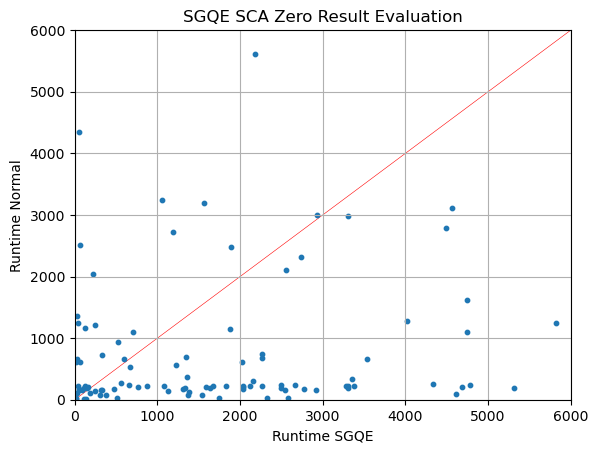

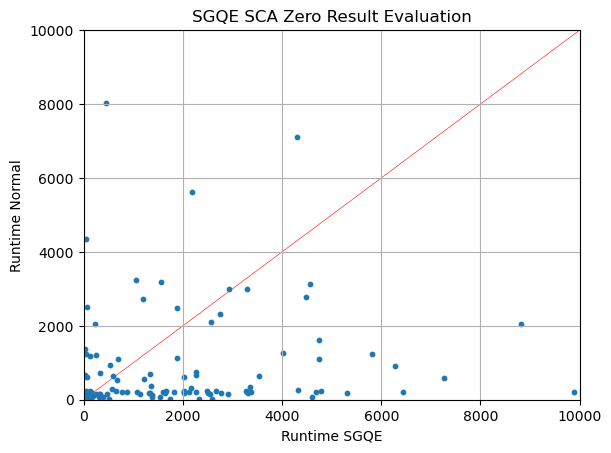

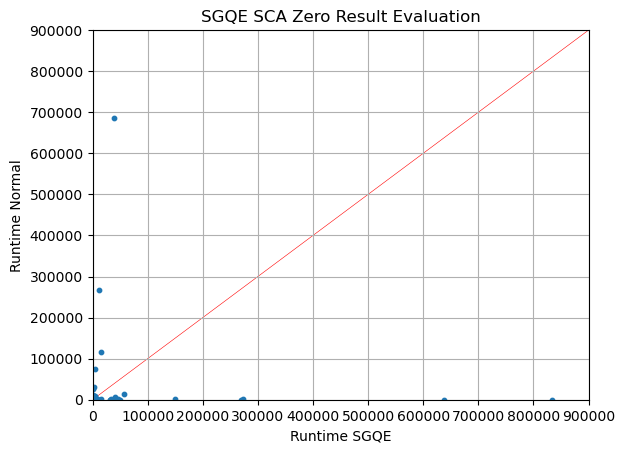

[-6.65000000e+00 -1.31550000e+02  5.98400000e+02 -1.02200000e+02
  7.59950000e+03  4.84000000e+01  1.33130000e+03  3.56000000e+01
  9.99925920e+09 -4.30000000e+02 -6.68460000e+03 -1.58310000e+03
 -2.88600000e+03  1.54000000e+03  6.28000000e+01 -1.72330000e+03
 -6.75000000e+01  7.73000000e+01  5.43300000e+02 -1.44700000e+03
  4.09300000e+02 -1.40380000e+03  8.02000000e+01 -4.07290000e+03
 -2.37800000e+03  1.19730000e+03  1.05700000e+02  2.49889000e+04
 -1.82680000e+03 -3.01780000e+03 -1.29270000e+03  6.41200000e+02
  1.79000000e+01 -3.13000000e+03 -1.59900000e+02  4.28480000e+03
 -3.10000000e+02 -1.89790000e+03 -1.34300000e+02 -1.85230000e+03
 -6.51400000e+02  1.83700000e+02  6.71000000e+01 -8.34221200e+05
  2.54500000e+05  7.00000000e+01 -1.44290000e+03 -6.43400000e+02
  1.02700000e+02  1.01800000e+05 -1.25890000e+03  1.63000000e+03
 -9.82100000e+02  1.05020000e+03 -3.12878000e+04 -5.36300000e+03
 -2.04190000e+03  9.65400000e+02 -1.14440000e+03  3.44000000e+03
 -1.71000000e+03 -8.59900

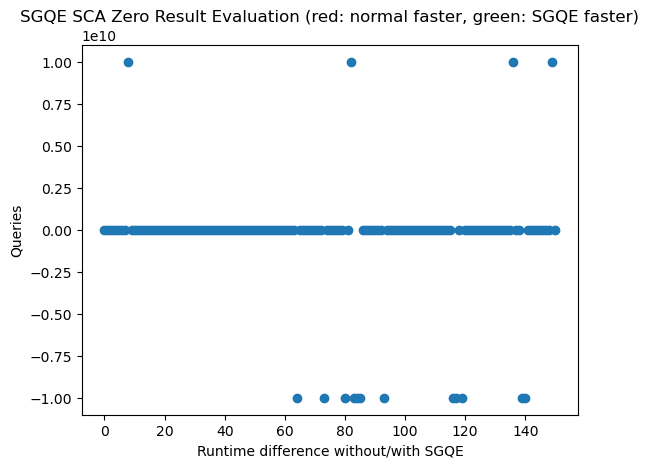

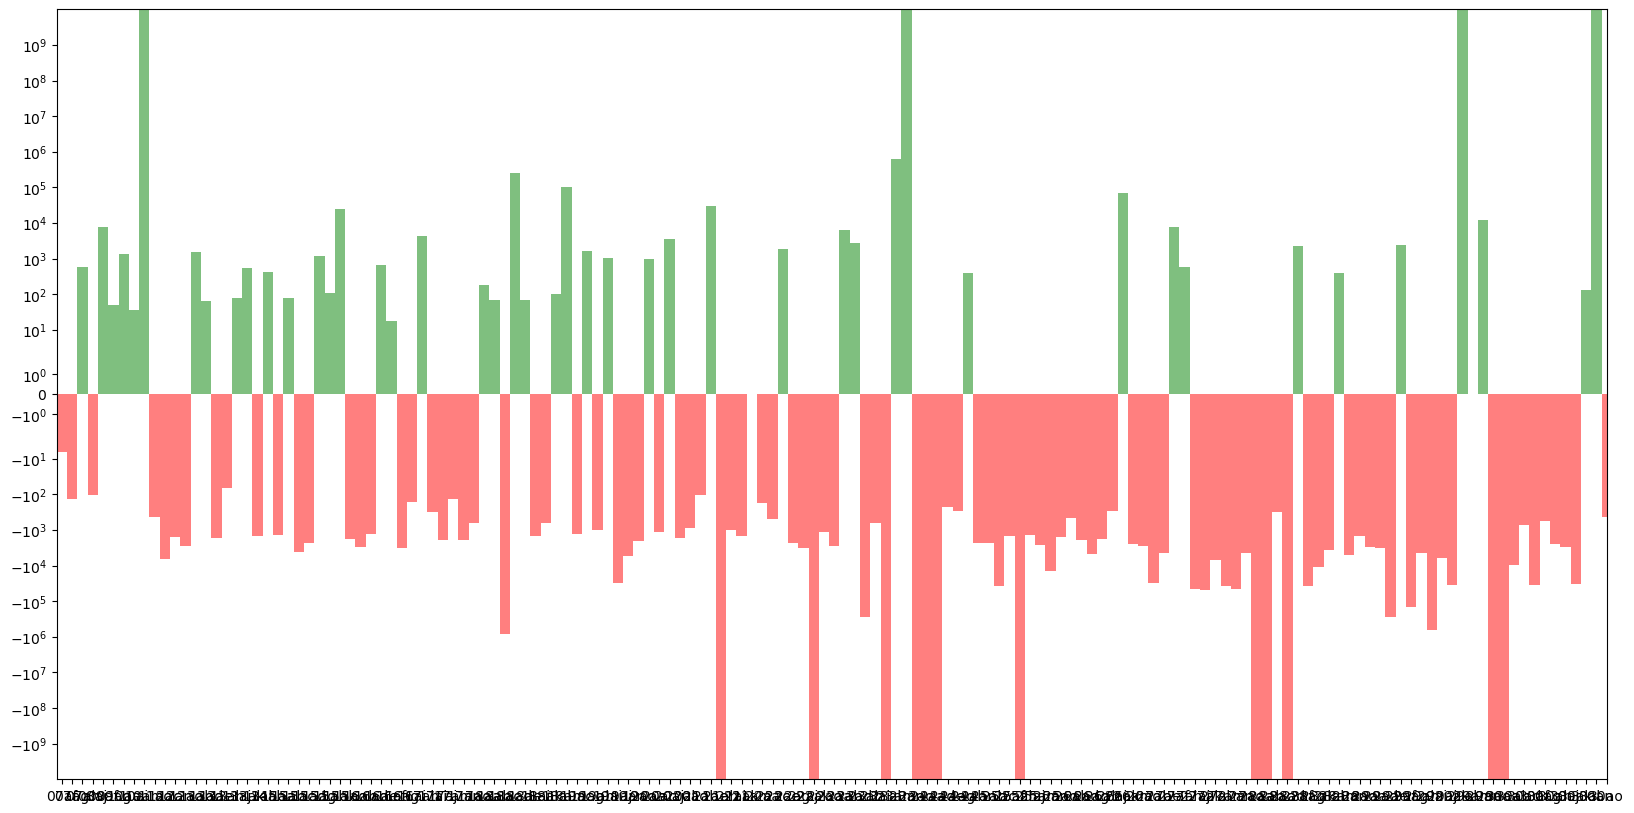

In [101]:
scatterplot2(val_a_zrq, val_b_zrq, "Runtime SGQE", "Runtime Normal", "SGQE SCA Zero Result Evaluation", "./SGQESCAZeroResEvalScatterPlot.png")
scatterplotWithLim(val_a_zrq, val_b_zrq, "Runtime SGQE", "Runtime Normal", "SGQE SCA Zero Result Evaluation", "./SGQESCAZeroRes10kEvalScatterPlot.png", 10000, 10000)
scatterplotWithLim(val_a_zrq, val_b_zrq, "Runtime SGQE", "Runtime Normal", "SGQE SCA Zero Result Evaluation", "./SGQESCAZeroRes900kEvalScatterPlot.png", 900000, 900000)

diffPlot2(val_a_zrq, val_b_zrq, "Runtime difference without/with SGQE", "Queries", "SGQE SCA Zero Result Evaluation (red: normal faster, green: SGQE faster)", "./SGQESCAZeroResEvalRTDiffPlot.png", zeroResQueries)


In [102]:
a = np.array(val_a_zrq)
b = np.array(val_b_zrq)

# remove not solved
a[a==9999999999.0]=0
b[b==9999999999.0]=0

# both solved --> does not fully describe the situation
ind = []
for j in range(len(a)):
    if a[j] == 0 or b[j] == 0:
        ind.append(j)
    j = j + 1

a = np.delete(a, ind)
b = np.delete(b, ind)


diffs = np.subtract(a, b)
min = np.min(diffs)
max = np.max(diffs)

avg = np.average(diffs)

print("Values in ms (when both versions solved the instance; zero result queries)")
print(f"minimal difference (with sign --> best for SGQE): {min}, maximal difference (with sign --> best for normal): {max}")
print(f"average difference (negative --> SGQE better, positive --> normal better): {avg}")
print(f"median difference (negative --> SGQE better, positive --> normal better): {np.median(diffs)}")

Values in ms (when both versions solved the instance; zero result queries)
minimal difference (with sign --> best for SGQE): -645500.0, maximal difference (with sign --> best for normal): 834221.2
average difference (negative --> SGQE better, positive --> normal better): 11749.41052631579
median difference (negative --> SGQE better, positive --> normal better): 1129.9


In [103]:
a_better_count, b_better_count = countRT(val_a_zrq, val_b_zrq) # excluding unsolved instances

# a_better: SGQE better
# b_better: Normal better
print(a_better_count, b_better_count )

# --> Normal better


41 92


In [104]:
a_better_count, b_better_count = count(maxmemlist1_zrq, maxmemlist2_zrq)

# a_better: SGQE better
# b_better: Normal better
print(a_better_count, b_better_count )

# --> Normal better

6 127


In [105]:
diffs = [float(0) if e[0] == float(0) or e[1] == float(0) else ((e[0]- e[1])/1000000) for e in zip(maxmemlist1_zrq, maxmemlist2_zrq)]
min = np.min(diffs)
max = np.max(diffs)

avg = np.average(diffs)

print("Values in MB")
print(f"minimal difference (with sign --> best for SGQE): {min}, maximal difference (with sign --> best for normal): {max}")
print(f"average difference (negative --> SGQE better, positive --> normal better): {avg}")
print(f"median difference (negative --> SGQE better, positive --> normal better): {np.median(diffs)}")


Values in MB
minimal difference (with sign --> best for SGQE): -769.821361, maximal difference (with sign --> best for normal): 17312.485585
average difference (negative --> SGQE better, positive --> normal better): 1855.4398599271524
median difference (negative --> SGQE better, positive --> normal better): 627.505083


In [106]:
# count unsolved
val_a_zrq_unsolved = countOccurrence(val_a_zrq, 9999999999.0)
val_b_zrq_unsolved = countOccurrence(val_b_zrq, 9999999999.0)

print(f"SGQE unsolved: {val_a_zrq_unsolved}, Normal unsolved: {val_b_zrq_unsolved}")
if val_a_zrq_unsolved < val_b_zrq_unsolved:
    print("SGQE better")
elif val_b_zrq_unsolved < val_a_zrq_unsolved:
    print("Normal better")

SGQE unsolved: 14, Normal unsolved: 6
Normal better


In [107]:
# unsolved by normal:
[zeroResQueries[i] for i in range(len(val_b_zrq)) if val_b_zrq[i] >= 9999999999 ]

['10am', '21am', '23an', '29al', '29am', '30an']

In [108]:
# unsolved by SGQE:
[zeroResQueries[i] for i in range(len(val_a_zrq)) if val_a_zrq[i] >= 9999999999 ]

['21ah',
 '21am',
 '22ak',
 '23al',
 '23ao',
 '24aa',
 '24ad',
 '25ah',
 '28aa',
 '28ab',
 '28ad',
 '29am',
 '29ao',
 '30aa']

Non-Zero Result Queries


In [109]:
nonZeroResQueries = ['02aa', '02ab', '02ac', '02ad', '02ae', '02af', '02ag', '02ah', '02ai', '02aj', '02ak', '02al', '02am', '02an', '02ao', '03aa', '03ab', '03ac', '03ad', '03ae', '03af', '03ag', '03ah', '03ai', '03aj', '03ak', '03al', '03am', '03an', '03ao', '04aa', '04ab', '04ac', '04ad', '04ae', '04af', '04ag', '04ah', '04ai', '04aj', '04ak', '04al', '04am', '04an', '04ao', '05aa', '05ab', '05ac', '05ad', '05ae', '05af', '05ag', '05ah', '05ai', '05aj', '05ak', '05al', '05am', '05an', '05ao', '06aa', '06ab', '06ac', '06ad', '06ae', '06af', '06ag', '06ah', '06ai', '06aj', '06ak', '06al', '06am', '06an', '06ao', '07aa', '07ab', '07ac', '07ad', '07ae', '07ai', '07aj', '07ak', '07al', '07am', '07an', '07ao', '08aa', '08ab', '08ac', '08ad', '08ae', '08af', '08ag', '08ah', '08ai', '08ak', '08al', '08am', '08an', '08ao', '09aa', '09ab', '09ac', '09ad', '09ae', '09ah', '09ai', '09aj', '09ak', '09al', '09am', '09an', '09ao', '10ab', '10ac', '10ad', '10ae', '10af', '10ag', '10ah', '10aj', '10ak', '10al', '10an', '10ao', '11aa', '11ab', '11ac', '11ad', '11ae', '11af', '11ag', '11ah', '11ai', '11aj', '11ak', '11al', '11am', '11an', '12aa', '12ab', '12ad', '12ae', '12af', '12ag', '12ah', '12ai', '12aj', '12ak', '12al', '12am', '13aa', '13ac', '13af', '13ag', '13ai', '13am', '13an', '13ao', '14aa', '14ab', '14ac', '14ad', '14ae', '14af', '14ag', '14ai', '14aj', '14ak', '14al', '14am', '14an', '14ao', '15ae', '15af', '15ai', '15aj', '15al', '15am', '15an', '16aa', '16ac', '16ah', '16aj', '16ak', '16al', '16am', '16an', '16ao', '17aa', '17ab', '17ac', '17ad', '17ae', '17af', '17ag', '17ak', '17al', '18af', '18ag', '18ah', '18aj', '18an', '18ao', '19aa', '19ab', '19ad', '19ae', '19af', '19ak', '19al', '19am', '20ab', '20ad', '20ae', '20af', '20ag', '20ah', '20ai', '20ak', '20am', '20an', '21aa', '21ac', '21ad', '21af', '21ag', '21aj', '21al', '21an', '21ao', '22ab', '22ad', '22af', '22ah', '22ai', '22al', '22am', '22an', '23ac', '23ae', '23af', '23ag', '23aj', '23ak', '24ab', '24ac', '24af', '24ai', '24aj', '24ak', '24al', '24am', '24ao', '25aa', '25ad', '25ae', '25ag', '25ai', '25ak', '25al', '26aa', '26ac', '26ae', '26af', '26ai', '26al', '26an', '27aa', '27ac', '27ad', '27ag', '27ai', '28ae', '28ah', '28ai', '28aj', '29ab', '29ac', '30ac', '30ae', '30ai', '30am']

In [110]:
nonZeroResQueries

['02aa',
 '02ab',
 '02ac',
 '02ad',
 '02ae',
 '02af',
 '02ag',
 '02ah',
 '02ai',
 '02aj',
 '02ak',
 '02al',
 '02am',
 '02an',
 '02ao',
 '03aa',
 '03ab',
 '03ac',
 '03ad',
 '03ae',
 '03af',
 '03ag',
 '03ah',
 '03ai',
 '03aj',
 '03ak',
 '03al',
 '03am',
 '03an',
 '03ao',
 '04aa',
 '04ab',
 '04ac',
 '04ad',
 '04ae',
 '04af',
 '04ag',
 '04ah',
 '04ai',
 '04aj',
 '04ak',
 '04al',
 '04am',
 '04an',
 '04ao',
 '05aa',
 '05ab',
 '05ac',
 '05ad',
 '05ae',
 '05af',
 '05ag',
 '05ah',
 '05ai',
 '05aj',
 '05ak',
 '05al',
 '05am',
 '05an',
 '05ao',
 '06aa',
 '06ab',
 '06ac',
 '06ad',
 '06ae',
 '06af',
 '06ag',
 '06ah',
 '06ai',
 '06aj',
 '06ak',
 '06al',
 '06am',
 '06an',
 '06ao',
 '07aa',
 '07ab',
 '07ac',
 '07ad',
 '07ae',
 '07ai',
 '07aj',
 '07ak',
 '07al',
 '07am',
 '07an',
 '07ao',
 '08aa',
 '08ab',
 '08ac',
 '08ad',
 '08ae',
 '08af',
 '08ag',
 '08ah',
 '08ai',
 '08ak',
 '08al',
 '08am',
 '08an',
 '08ao',
 '09aa',
 '09ab',
 '09ac',
 '09ad',
 '09ae',
 '09ah',
 '09ai',
 '09aj',
 '09ak',
 '09al',
 

In [111]:
_, val_a_nzrq, maxmemlist1_nzrq = getMatchingQueries(queries, val_a, maxmemlist1, nonZeroResQueries)
_, val_b_nzrq, maxmemlist2_nzrq = getMatchingQueries(queries, val_b, maxmemlist2, nonZeroResQueries)

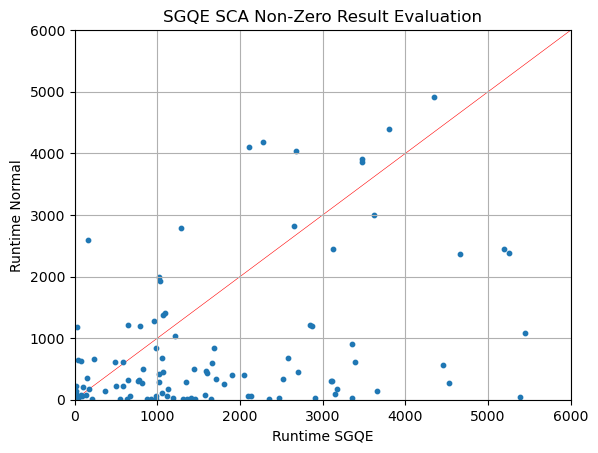

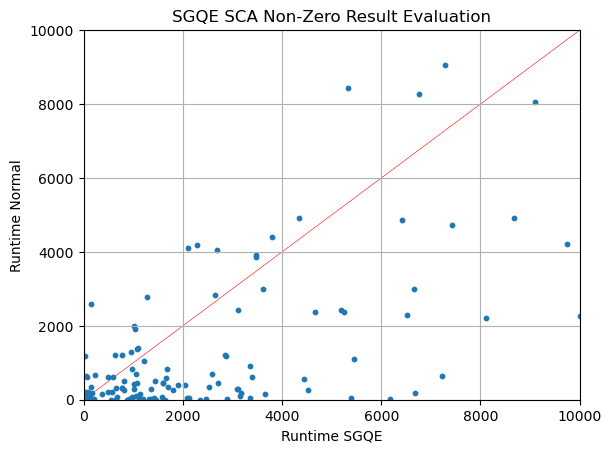

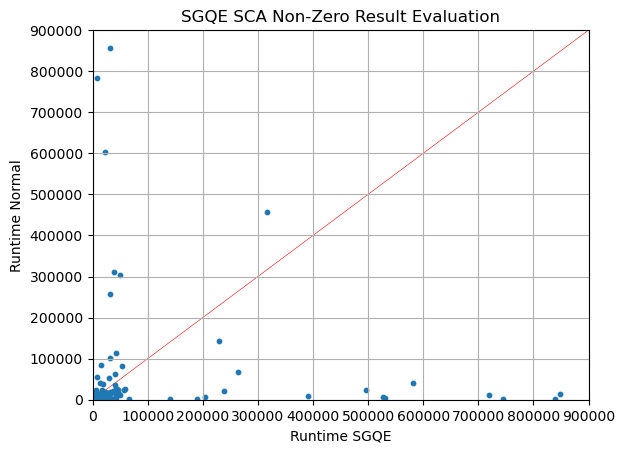

[-1.12610000e+03 -9.78090000e+02 -5.47690000e+02 -3.00955800e+04
 -1.31965100e+04 -2.34605000e+03 -1.40506000e+03 -6.22660000e+02
 -1.44566000e+03 -8.63950000e+02 -1.57300000e+01 -6.44000000e+01
 -1.30965500e+04 -3.32500000e+01 -1.13957600e+04 -1.64417000e+03
  1.21700000e+02 -1.68000000e+03 -6.16130000e+03  8.90000000e+02
  3.40000000e+00  3.58000000e+01 -2.08000000e+01 -1.29850000e+03
 -9.14220000e+02  8.75000000e+01 -9.19800000e+02 -2.12124000e+04
 -1.99240000e+02  1.51000000e+03 -1.36950000e+05  1.31400000e+02
 -5.42000000e+02  1.90000000e+03 -3.31470000e+03  1.14820000e+03
 -5.53000000e+03  2.01600000e+02  3.20000000e+02 -1.48590000e+03
  1.99000000e+03  3.22300000e+02 -5.34960000e+03 -3.31400000e+02
  1.14000000e+01 -9.39700000e+02 -2.17600000e+02 -2.18370000e+04
  1.10200000e+02 -6.10000000e+02 -3.00130000e+03 -3.67000000e+03
 -1.06180000e+03  1.99700000e+02 -1.16930000e+03  5.55400000e+02
 -1.37580000e+03 -2.17870000e+03 -1.35349000e+03 -8.47100000e+02
  4.16800000e+02  6.01500

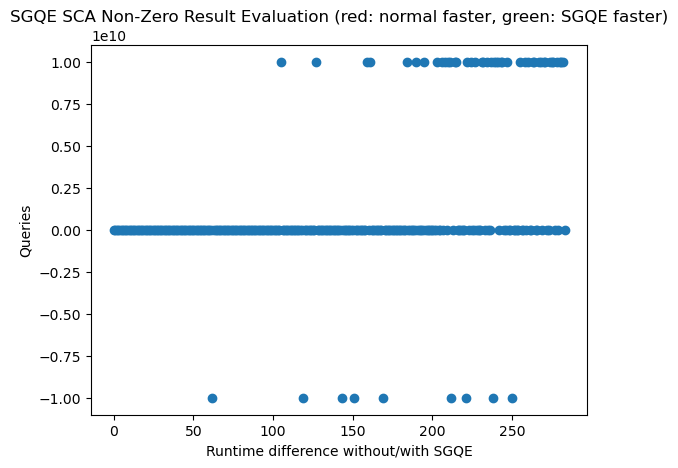

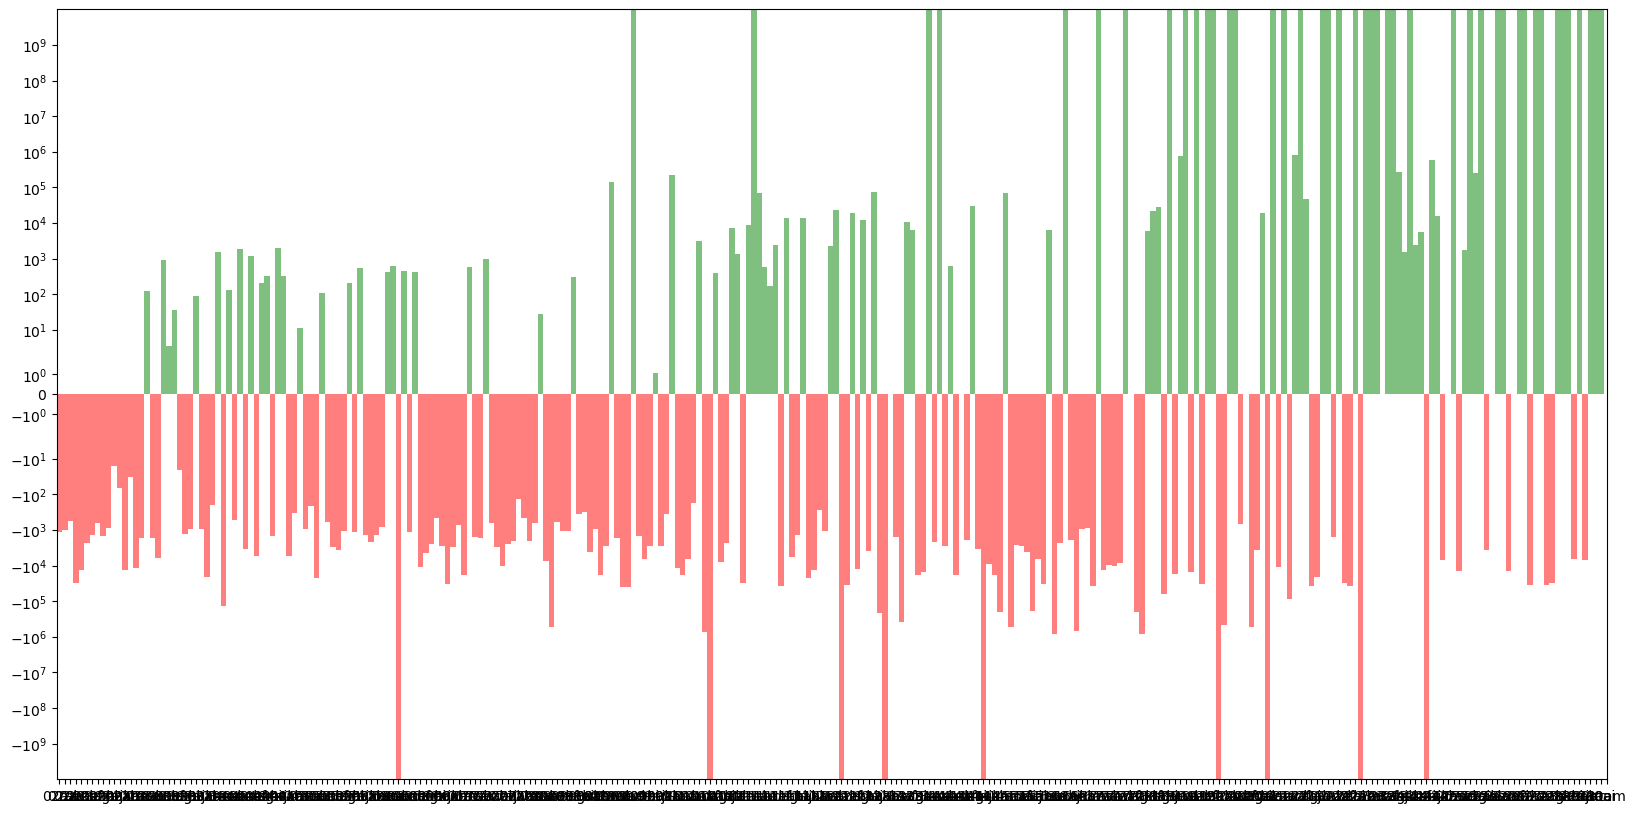

In [112]:
scatterplot2(val_a_nzrq, val_b_nzrq, "Runtime SGQE", "Runtime Normal", "SGQE SCA Non-Zero Result Evaluation", "./SGQESCANonZeroResEvalScatterPlot.png")
scatterplotWithLim(val_a_nzrq, val_b_nzrq, "Runtime SGQE", "Runtime Normal", "SGQE SCA Non-Zero Result Evaluation", "./SGQESCANonZeroRes10kEvalScatterPlot.png", 10000, 10000)
scatterplotWithLim(val_a_nzrq, val_b_nzrq, "Runtime SGQE", "Runtime Normal", "SGQE SCA Non-Zero Result Evaluation", "./SGQESCANonZeroRes900kEvalScatterPlot.png", 900000, 900000)

diffPlot2(val_a_nzrq, val_b_nzrq, "Runtime difference without/with SGQE", "Queries", "SGQE SCA Non-Zero Result Evaluation (red: normal faster, green: SGQE faster)", "./SGQESCANonZeroResEvalRTDiffPlot.png", nonZeroResQueries)

In [113]:
a = np.array(val_a_nzrq)
b = np.array(val_b_nzrq)

# remove not solved
a[a==9999999999.0]=0
b[b==9999999999.0]=0

# both solved --> does not fully describe the situation
ind = []
for j in range(len(a)):
    if a[j] == 0 or b[j] == 0:
        ind.append(j)
    j = j + 1

a = np.delete(a, ind)
b = np.delete(b, ind)


diffs = np.subtract(a, b)
min = np.min(diffs)
max = np.max(diffs)

avg = np.average(diffs)

print("Values in ms (when both versions solved the instance; non-zero result queries)")
print(f"minimal difference (with sign --> best for SGQE): {min}, maximal difference (with sign --> best for normal): {max}")
print(f"average difference (negative --> SGQE better, positive --> normal better): {avg}")
print(f"median difference (negative --> SGQE better, positive --> normal better): {np.median(diffs)}")

Values in ms (when both versions solved the instance; non-zero result queries)
minimal difference (with sign --> best for SGQE): -823500.0, maximal difference (with sign --> best for normal): 836640.0
average difference (negative --> SGQE better, positive --> normal better): 18944.853839285708
median difference (negative --> SGQE better, positive --> normal better): 1465.7800000000002


In [114]:
a_better_count, b_better_count = countRT(val_a_nzrq, val_b_nzrq) # excluding unsolved instances

# a_better: SGQE better
# b_better: Normal better
print(a_better_count, b_better_count )

# --> Normal better

65 158


In [115]:
a_better_count, b_better_count = count(maxmemlist1_nzrq, maxmemlist2_nzrq)

# a_better: SGQE better
# b_better: Normal better
print(a_better_count, b_better_count )

# --> Normal better

7 217


In [116]:
diffs = [float(0) if e[0] == float(0) or e[1] == float(0) else ((e[0]- e[1])/1000000) for e in zip(maxmemlist1_nzrq, maxmemlist2_nzrq)]
min = np.min(diffs)
max = np.max(diffs)

avg = np.average(diffs)

print("Values in MB")
print(f"minimal difference (with sign --> best for SGQE): {min}, maximal difference (with sign --> best for normal): {max}")
print(f"average difference (negative --> SGQE better, positive --> normal better): {avg}")
print(f"median difference (negative --> SGQE better, positive --> normal better): {np.median(diffs)}")

Values in MB
minimal difference (with sign --> best for SGQE): -31698.433103, maximal difference (with sign --> best for normal): 26488.783203
average difference (negative --> SGQE better, positive --> normal better): 2536.0090829788733
median difference (negative --> SGQE better, positive --> normal better): 476.625952


In [117]:
# count unsolved
val_a_nzrq_unsolved = countOccurrence(val_a_nzrq, 9999999999.0)
val_b_nzrq_unsolved = countOccurrence(val_b_nzrq, 9999999999.0)

print(f"SGQE unsolved: {val_a_nzrq_unsolved}, Normal unsolved: {val_b_nzrq_unsolved}")
if val_a_nzrq_unsolved < val_b_nzrq_unsolved:
    print("SGQE better")
elif val_a_nzrq_unsolved < val_b_nzrq_unsolved:
    print("Normal better")

SGQE unsolved: 17, Normal unsolved: 51
SGQE better


In [118]:
# unsolved by normal:
[nonZeroResQueries[i] for i in range(len(val_b_nzrq)) if val_b_nzrq[i] >= 9999999999 ]

['09ae',
 '11ab',
 '13aa',
 '13ao',
 '14ab',
 '14af',
 '16aj',
 '17aa',
 '17af',
 '17ag',
 '18an',
 '19ab',
 '19ae',
 '19ak',
 '19al',
 '20ad',
 '20ae',
 '20ag',
 '20an',
 '21ac',
 '21ag',
 '21ao',
 '22ab',
 '22af',
 '22al',
 '22an',
 '23ac',
 '23ae',
 '23af',
 '23ag',
 '23aj',
 '24ac',
 '24ao',
 '25aa',
 '25ag',
 '25ak',
 '26aa',
 '26ac',
 '26ae',
 '26al',
 '26an',
 '27ac',
 '27ad',
 '28ae',
 '28ah',
 '28ai',
 '29ab',
 '30ac',
 '30ae',
 '30ai',
 '30am']

In [119]:
# unsolved by SGQE:
[nonZeroResQueries[i] for i in range(len(val_a_nzrq)) if val_a_nzrq[i] >= 9999999999 ]

['06ac',
 '10ag',
 '12ae',
 '12am',
 '13aa',
 '14af',
 '14ak',
 '17ag',
 '19am',
 '20ag',
 '20am',
 '22am',
 '23af',
 '24aj',
 '24ao',
 '26aa',
 '30am']

Highest result counts (from fullenum)

In [120]:
highestCounts_keys = ['08ad', '09ae', '10ag', '10al', '10ao', '11aa', '11ae', '11aj', '11ak', '12ab', '12ad', '13ag', '15an', '18ag', '20ak', '20am', '21ag', '21al', '26ae', '26an']

In [121]:
_, val_a_hrc, maxmemlist1_hrc = getMatchingQueries(queries, val_a, maxmemlist1, highestCounts_keys)
_, val_b_hrc, maxmemlist2_hrc = getMatchingQueries(queries, val_b, maxmemlist2, highestCounts_keys)

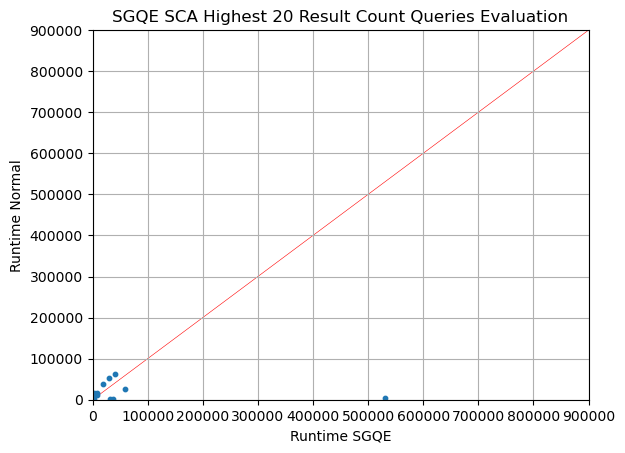

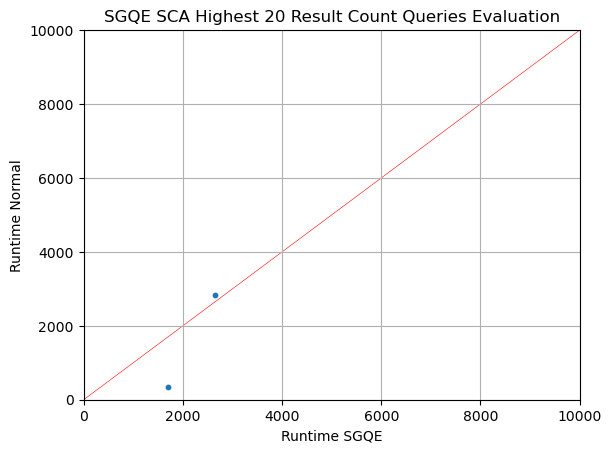

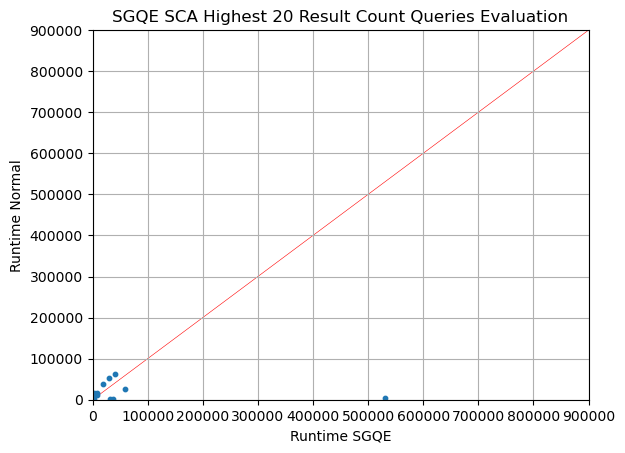

[-5.27110000e+05  9.99916160e+09 -9.99998400e+09  7.45000000e+03
 -3.14617000e+04  8.88000000e+03  1.70000000e+02 -1.37240000e+03
  1.42200000e+04  2.29000000e+03  2.34000000e+04  1.05600000e+04
 -3.36000000e+04  2.13000000e+04  1.90000000e+04 -9.99999348e+09
  9.99998830e+09 -3.67261000e+04  9.99994790e+09  9.99996150e+09]
-9999993479.0


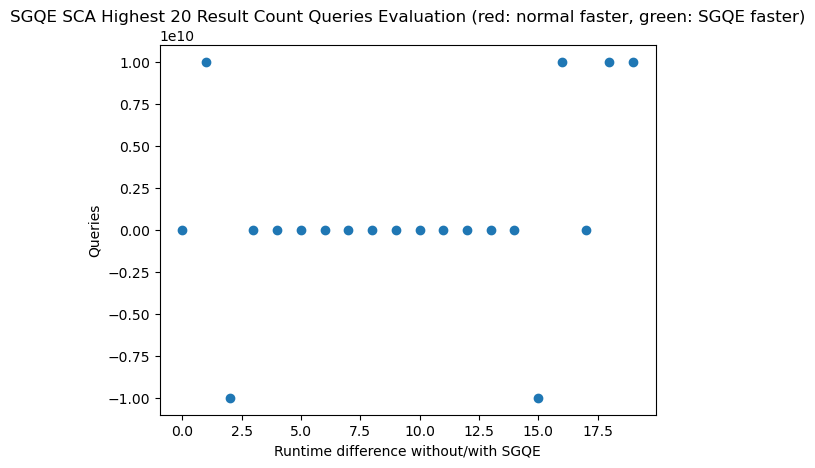

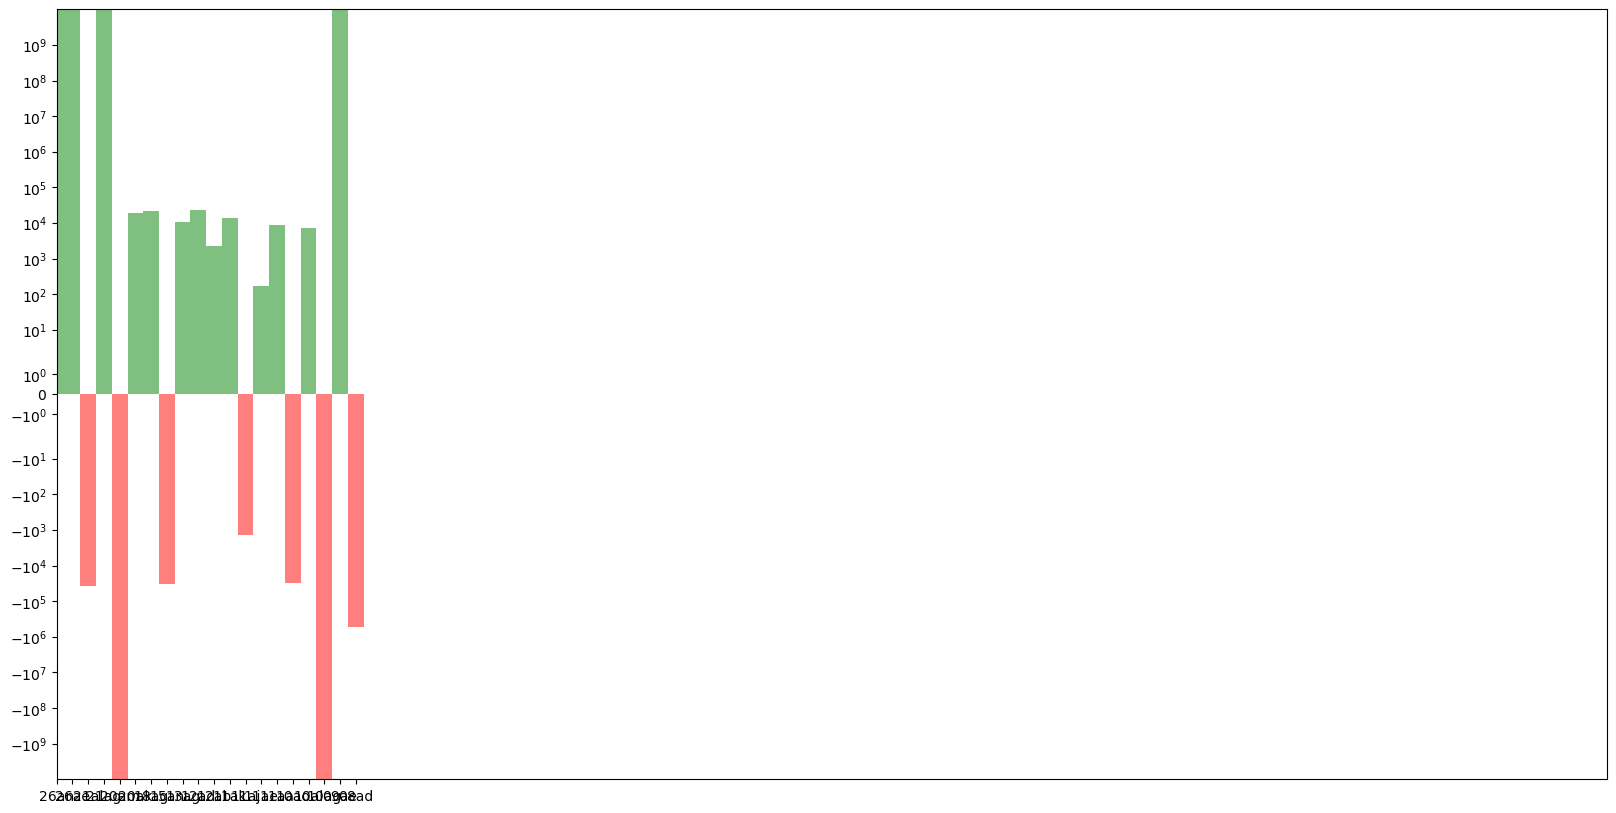

In [122]:
scatterplot3(val_a_hrc, val_b_hrc, "Runtime SGQE", "Runtime Normal", "SGQE SCA Highest 20 Result Count Queries Evaluation", "./SGQESCAHighestResEvalScatterPlot.png")
scatterplotWithLim(val_a_hrc, val_b_hrc, "Runtime SGQE", "Runtime Normal", "SGQE SCA Highest 20 Result Count Queries Evaluation", "./SGQESCAHighestRes10kEvalScatterPlot.png", 10000, 10000)
scatterplotWithLim(val_a_hrc, val_b_hrc, "Runtime SGQE", "Runtime Normal", "SGQE SCA Highest 20 Result Count Queries Evaluation", "./SGQESCAHighestRes900kEvalScatterPlot.png", 900000, 900000)

diffPlot2(val_a_hrc, val_b_hrc, "Runtime difference without/with SGQE", "Queries", "SGQE SCA Highest 20 Result Count Queries Evaluation (red: normal faster, green: SGQE faster)", "./SGQESCAHighestResEvalRTDiffPlot.png", highestCounts_keys)


In [123]:
a = np.array(val_a_hrc)
b = np.array(val_b_hrc)

# remove not solved
a[a==9999999999.0]=0
b[b==9999999999.0]=0

# both solved --> does not fully describe the situation
ind = []
for j in range(len(a)):
    if a[j] == 0 or b[j] == 0:
        ind.append(j)
    j = j + 1

a = np.delete(a, ind)
b = np.delete(b, ind)


diffs = np.subtract(a, b)
min = np.min(diffs)
max = np.max(diffs)

avg = np.average(diffs)

print("Values in ms (when both versions solved the instance)")
print(f"minimal difference (with sign --> best for SGQE): {min}, maximal difference (with sign --> best for normal): {max}")
print(f"average difference (negative --> SGQE better, positive --> normal better): {avg}")
print(f"median difference (negative --> SGQE better, positive --> normal better): {np.median(diffs)}")

Values in ms (when both versions solved the instance)
minimal difference (with sign --> best for SGQE): -23400.0, maximal difference (with sign --> best for normal): 527110.0
average difference (negative --> SGQE better, positive --> normal better): 37357.15714285714
median difference (negative --> SGQE better, positive --> normal better): -4870.0


In [124]:
a_better_count, b_better_count = countRT(val_a_hrc, val_b_hrc) # excluding unsolved instances

# a_better: SGQE better
# b_better: Normal better
print(a_better_count, b_better_count )

# --> SGQE better

9 5


In [125]:
a_better_count, b_better_count = count(maxmemlist1_hrc, maxmemlist2_hrc)

# a_better: SGQE better
# b_better: Normal better
print(a_better_count, b_better_count )

# --> Normal better

1 13


In [126]:
diffs = [float(0) if e[0] == float(0) or e[1] == float(0) else ((e[0]- e[1])/1000000) for e in zip(maxmemlist1_hrc, maxmemlist2_hrc)]
min = np.min(diffs)
max = np.max(diffs)

avg = np.average(diffs)

print("Values in MB")
print(f"minimal difference (with sign --> best for SGQE): {min}, maximal difference (with sign --> best for normal): {max}")
print(f"average difference (negative --> SGQE better, positive --> normal better): {avg}")
print(f"median difference (negative --> SGQE better, positive --> normal better): {np.median(diffs)}")

Values in MB
minimal difference (with sign --> best for SGQE): -2651.732826, maximal difference (with sign --> best for normal): 17269.786213
average difference (negative --> SGQE better, positive --> normal better): 2743.4018912
median difference (negative --> SGQE better, positive --> normal better): 644.866076


In [127]:
# count unsolved
val_a_hrc_unsolved = countOccurrence(val_a_hrc, 9999999999.0)
val_b_hrc_unsolved = countOccurrence(val_b_hrc, 9999999999.0)

print(f"SGQE unsolved: {val_a_hrc_unsolved}, Normal unsolved: {val_b_hrc_unsolved}")
if val_a_hrc_unsolved < val_b_hrc_unsolved:
    print("SGQE better")
elif val_a_hrc_unsolved < val_b_hrc_unsolved:
    print("Normal better")

SGQE unsolved: 2, Normal unsolved: 4
SGQE better


In [128]:
# unsolved by normal:
[highestCounts_keys[i] for i in range(len(val_b_hrc)) if val_b_hrc[i] >= 9999999999 ]

['09ae', '21ag', '26ae', '26an']

In [129]:
# unsolved by SGQE:
[highestCounts_keys[i] for i in range(len(val_a_hrc)) if val_a_hrc[i] >= 9999999999 ]

['10ag', '20am']

Lowest result counts (from fullenum)

In [130]:
lowestCounts_keys = ['12ao', '13ab', '13ad', '13ae', '13ah', '13aj', '13ak', '13al', '14ah', '15aa', '15ab', '15ac', '15ad', '15ag', '15ah', '15ak', '24an', '25ab', '25ac', '30ab']

In [131]:
_, val_a_lrc, maxmemlist1_lrc = getMatchingQueries(queries, val_a, maxmemlist1, lowestCounts_keys)
_, val_b_lrc, maxmemlist2_lrc = getMatchingQueries(queries, val_b, maxmemlist2, lowestCounts_keys)

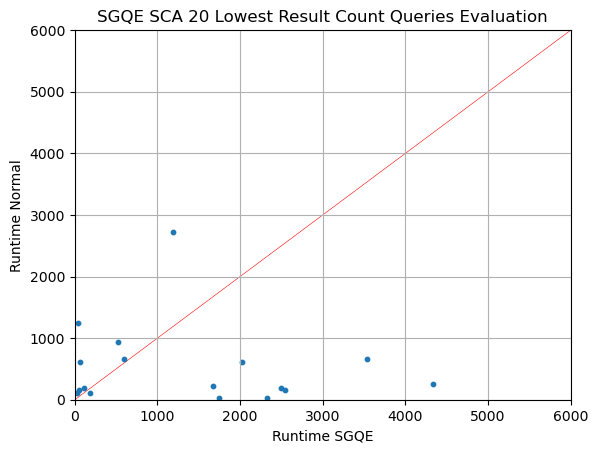

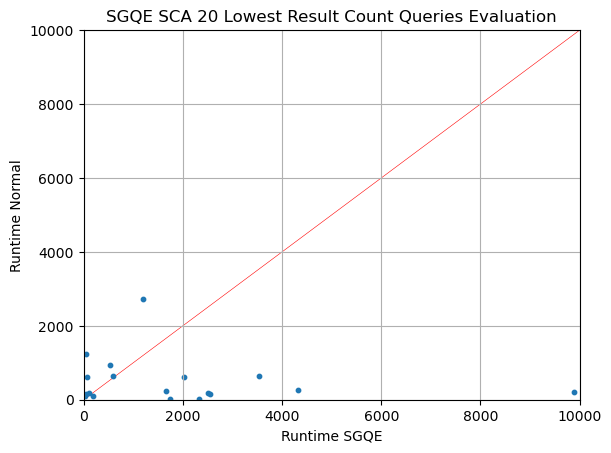

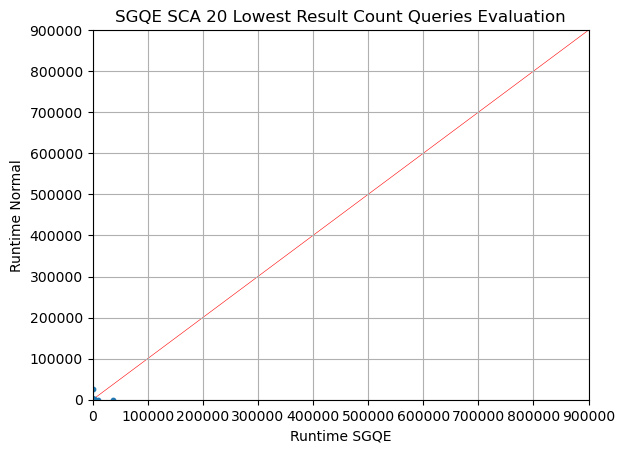

[ -2886.    1540.      62.8  -1723.3    -67.5     77.3    543.3  -1447.
    409.3  -1403.8     80.2  -4072.9  -2378.    1197.3    105.7  24988.9
  -2296.6  -2317.7 -37479.9  -9686.7]
-37479.9


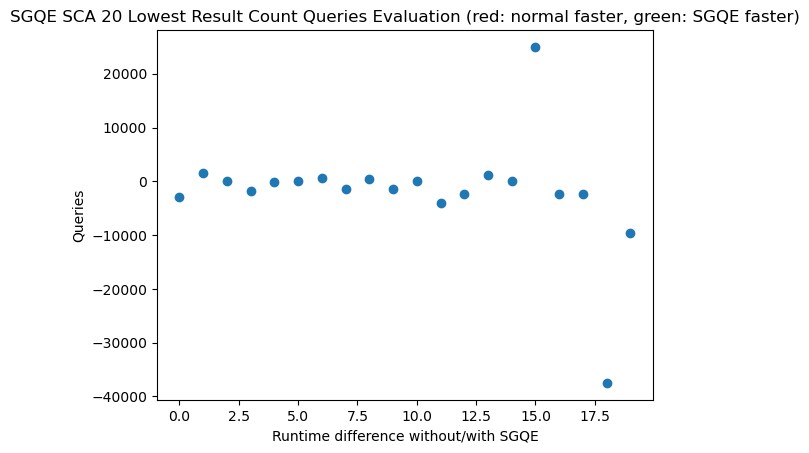

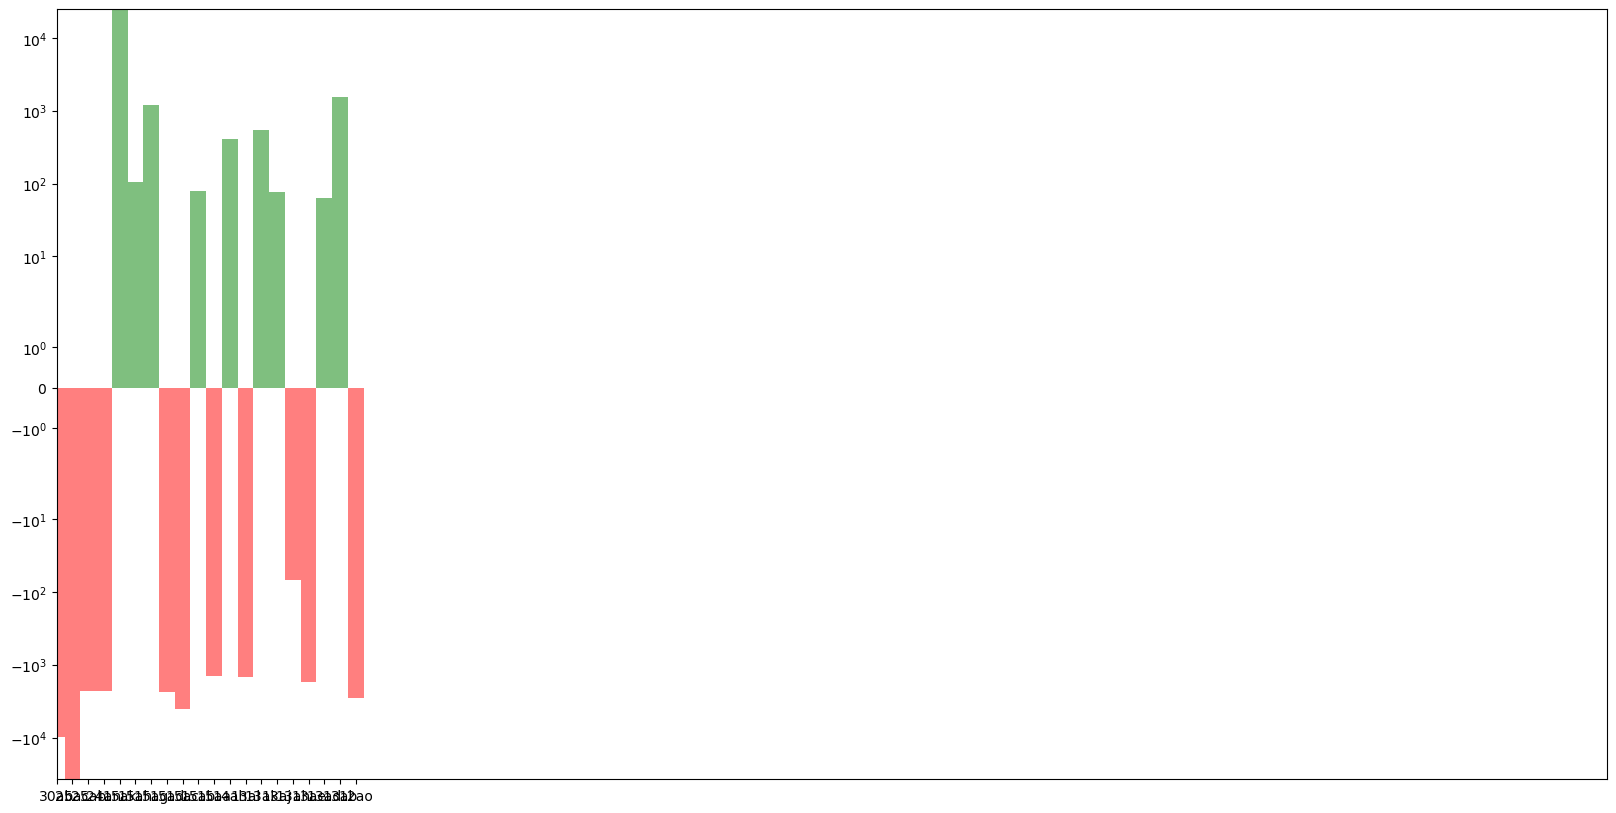

In [132]:
scatterplot2(val_a_lrc, val_b_lrc, "Runtime SGQE", "Runtime Normal", "SGQE SCA 20 Lowest Result Count Queries Evaluation", "./SGQESCALRCResEvalScatterPlot.png")
scatterplotWithLim(val_a_lrc, val_b_lrc, "Runtime SGQE", "Runtime Normal", "SGQE SCA 20 Lowest Result Count Queries Evaluation", "./SGQESCALRCRes10kEvalScatterPlot.png", 10000, 10000)
scatterplotWithLim(val_a_lrc, val_b_lrc, "Runtime SGQE", "Runtime Normal", "SGQE SCA 20 Lowest Result Count Queries Evaluation", "./SGQESCALRCRes900kEvalScatterPlot.png", 900000, 900000)

diffPlot2(val_a_lrc, val_b_lrc, "Runtime difference without/with SGQE", "Queries", "SGQE SCA 20 Lowest Result Count Queries Evaluation (red: normal faster, green: SGQE faster)", "./SGQESCALRCResEvalRTDiffPlot.png", lowestCounts_keys)


In [133]:
a = np.array(val_a_lrc)
b = np.array(val_b_lrc)

# remove not solved
a[a==9999999999.0]=0
b[b==9999999999.0]=0

# both solved --> does not fully describe the situation
ind = []
for j in range(len(a)):
    if a[j] == 0 or b[j] == 0:
        ind.append(j)
    j = j + 1

a = np.delete(a, ind)
b = np.delete(b, ind)


diffs = np.subtract(a, b)
min = np.min(diffs)
max = np.max(diffs)

avg = np.average(diffs)

print("Values in ms (when both versions solved the instance)")
print(f"minimal difference (with sign --> best for SGQE): {min}, maximal difference (with sign --> best for normal): {max}")
print(f"average difference (negative --> SGQE better, positive --> normal better): {avg}")
print(f"median difference (negative --> SGQE better, positive --> normal better): {np.median(diffs)}")

Values in ms (when both versions solved the instance)
minimal difference (with sign --> best for SGQE): -24988.9, maximal difference (with sign --> best for normal): 37479.9
average difference (negative --> SGQE better, positive --> normal better): 1837.7300000000002
median difference (negative --> SGQE better, positive --> normal better): 735.65


In [134]:
a_better_count, b_better_count = countRT(val_a_lrc, val_b_lrc) # excluding unsolved instances

# a_better: SGQE better
# b_better: Normal better
print(a_better_count, b_better_count )

# --> Normal better

9 11


In [135]:
a_better_count, b_better_count = count(maxmemlist1_lrc, maxmemlist2_lrc)

# a_better: SGQE better
# b_better: Normal better
print(a_better_count, b_better_count )

# --> Normal better

1 19


In [136]:
diffs = [float(0) if e[0] == float(0) or e[1] == float(0) else ((e[0]- e[1])/1000000) for e in zip(maxmemlist1_lrc, maxmemlist2_lrc)]
min = np.min(diffs)
max = np.max(diffs)

avg = np.average(diffs)

print("Values in MB")
print(f"minimal difference (with sign --> best for SGQE): {min}, maximal difference (with sign --> best for normal): {max}")
print(f"average difference (negative --> SGQE better, positive --> normal better): {avg}")
print(f"median difference (negative --> SGQE better, positive --> normal better): {np.median(diffs)}")

Values in MB
minimal difference (with sign --> best for SGQE): -124.400633, maximal difference (with sign --> best for normal): 3982.594883
average difference (negative --> SGQE better, positive --> normal better): 711.0238916999999
median difference (negative --> SGQE better, positive --> normal better): 305.743003


In [137]:
# count unsolved
val_a_lrc_unsolved = countOccurrence(val_a_lrc, 9999999999.0)
val_b_lrc_unsolved = countOccurrence(val_b_lrc, 9999999999.0)

print(f"SGQE unsolved: {val_a_lrc_unsolved}, Normal unsolved: {val_b_lrc_unsolved}")
if val_a_lrc_unsolved < val_b_lrc_unsolved:
    print("SGQE better")
elif val_a_lrc_unsolved < val_b_lrc_unsolved:
    print("Normal better")

SGQE unsolved: 0, Normal unsolved: 0


In [138]:
# unsolved by normal:
[lowestCounts_keys[i] for i in range(len(val_b_lrc)) if val_b_lrc[i] >= 9999999999 ]

[]

In [139]:
# unsolved by SGQE:
[lowestCounts_keys[i] for i in range(len(val_a_lrc)) if val_a_lrc[i] >= 9999999999 ]

[]